# Use differences as additional output

This file is for using the difference as addaitional output. We use the input voltage to predict the electrical power as well as the difference in power. We can predict the curretn difference but we need to take multiple inputs into account for a RNN to work properly.

## Preliminaries

### Import Libraries

In [1]:
# import own libraries
import Global_Functions as gf
import Neuronal_Networks as nn

# import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
timestr = time.strftime("%Y-%m-%d_%H-%M_")

# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
np.random.seed(123)

### Open files

In [3]:
OPEN_FOLDER = '../Data/Preped_Data/'

In [4]:
ex_1 = gf.open_CSV_file('experiment_1_short.csv', OPEN_FOLDER)
ex_4 = gf.open_CSV_file('experiment_4_short.csv', OPEN_FOLDER)
ex_9 = gf.open_CSV_file('experiment_9_short.csv', OPEN_FOLDER)
ex_20 = gf.open_CSV_file('experiment_20_short.csv', OPEN_FOLDER)
ex_21 = gf.open_CSV_file('experiment_21_short.csv', OPEN_FOLDER)
ex_22 = gf.open_CSV_file('experiment_22_short.csv', OPEN_FOLDER)
ex_23 = gf.open_CSV_file('experiment_23_short.csv', OPEN_FOLDER)
ex_24 = gf.open_CSV_file('experiment_24_short.csv', OPEN_FOLDER)

In [5]:
experiments = [ex_1, ex_4, ex_9, ex_20, ex_21, ex_22, ex_23, ex_24]
names = ['1', '4', '9', '20', '21','22', '23', '24']

In [6]:
OPEN_SYNTHETIC = 'C:/Users/FlorianLeiser/Documents/Masterarbeit/Data/Synthetic_Data/Without_Noise/Sample_Ratio_1/quadratic_12_34_linear_1'

In [7]:
experiments = gf.load_synthetic(OPEN_SYNTHETIC, length = 50)
names = [str(x+1) for x in range(len(experiments)-1)]
names.append("hand")

### Specify parameters

In [8]:
NEUR = 128
EPOCH = 500
LAG = 60
DIFFERENCE = "predict"
BATCH_SIZE = 512

In [9]:
train = "15"
val = "3"

train_exs = experiments[:15]
ex_train = gf.use_multiple_experiments(train_exs)
ex_val = gf.use_multiple_experiments(experiments[15:18])
ex_test = gf.use_multiple_experiments(experiments[18:20])
# ex_train = ex_20
# ex_val = ex_21

In [10]:
image_path = "../Images/Synthetic/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}/" 
image_folder = image_path + specs.format(train, val, NEUR, EPOCH, LAG)
gf.check_folder(image_folder)

Creation of directory ../Images/Synthetic/1/Difference/predict/2021-05-18_12-23_training_15 val_3 128_neurons__500_epochs__lag_60/ successful.


In [11]:
# saving folder for images
model_path = "../Models/Synthetic/1/Difference/" + str(DIFFERENCE) + "/" + timestr
specs = "training_{0} val_{1} {2}_neurons__{3}_epochs__lag_{4}/" 
model_folder = model_path + specs.format(train, val, NEUR, EPOCH, LAG)

gf.check_folder(model_folder)

Creation of directory ../Models/Synthetic/1/Difference/predict/2021-05-18_12-23_training_15 val_3 128_neurons__500_epochs__lag_60/ successful.


## Training the model

In [12]:
model, history, scaler_train, X_train, y_train, _, X_val, y_val = nn.train_model(ex_train, ex_val, save_folder = model_folder,
                                                                                 batch_size = BATCH_SIZE,
                                                                                 difference_chosen = DIFFERENCE, lag_chosen = LAG,
                                                                                 nmb_epochs = EPOCH, neurons_chosen = NEUR)

Folder already exists.


C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs
C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


Epoch 10 of 500 is done.
Epoch 20 of 500 is done.
Epoch 30 of 500 is done.
Epoch 40 of 500 is done.
Epoch 50 of 500 is done.
Epoch 60 of 500 is done.
Epoch 70 of 500 is done.
Epoch 80 of 500 is done.
Epoch 90 of 500 is done.
Epoch 100 of 500 is done.
Epoch 110 of 500 is done.
Epoch 120 of 500 is done.
Epoch 130 of 500 is done.
Epoch 140 of 500 is done.
Epoch 150 of 500 is done.
Epoch 160 of 500 is done.
Epoch 170 of 500 is done.
Epoch 180 of 500 is done.
Epoch 190 of 500 is done.
Epoch 200 of 500 is done.
Epoch 210 of 500 is done.
Epoch 220 of 500 is done.
Epoch 230 of 500 is done.
Epoch 240 of 500 is done.
Epoch 250 of 500 is done.
Epoch 260 of 500 is done.
Epoch 270 of 500 is done.
Epoch 280 of 500 is done.
Epoch 290 of 500 is done.
Epoch 300 of 500 is done.
Epoch 310 of 500 is done.
Epoch 320 of 500 is done.
Epoch 330 of 500 is done.
Epoch 340 of 500 is done.
Epoch 350 of 500 is done.
Epoch 360 of 500 is done.
Epoch 370 of 500 is done.
Epoch 380 of 500 is done.
Epoch 390 of 500 is d

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


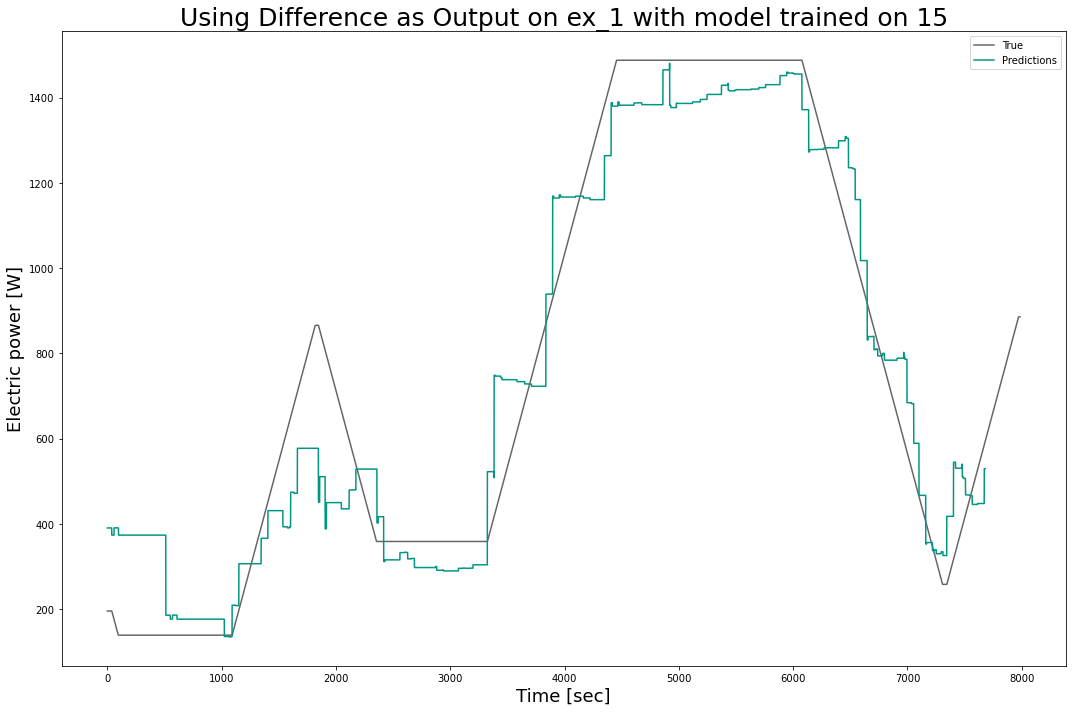

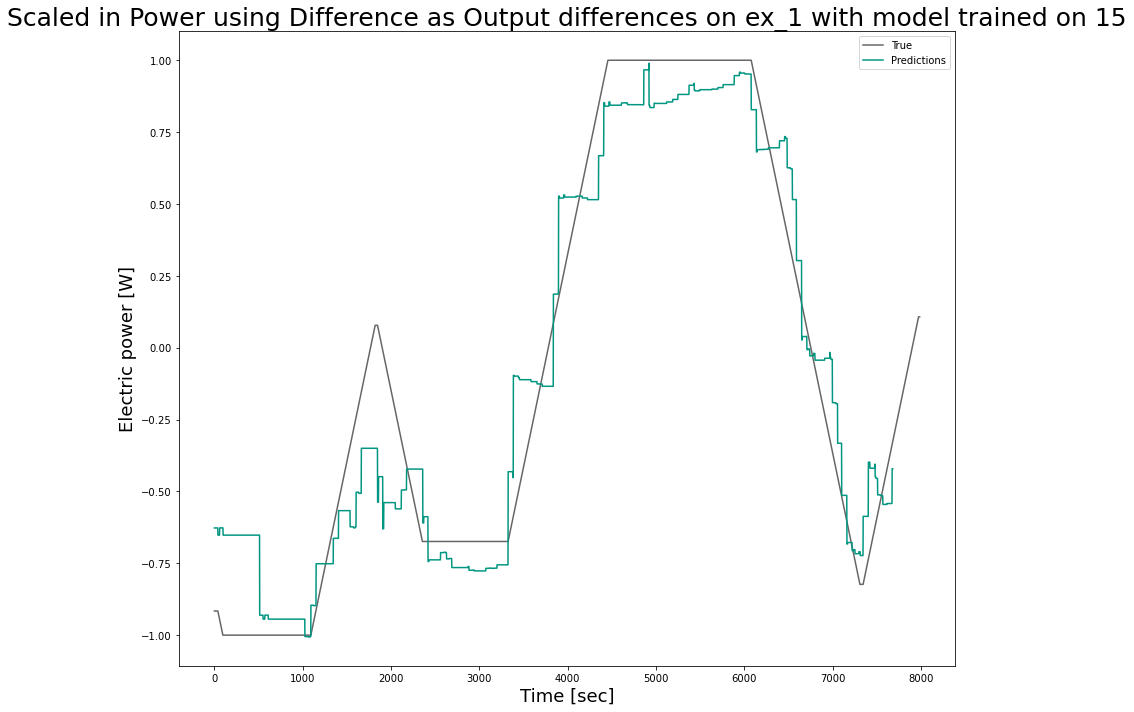

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


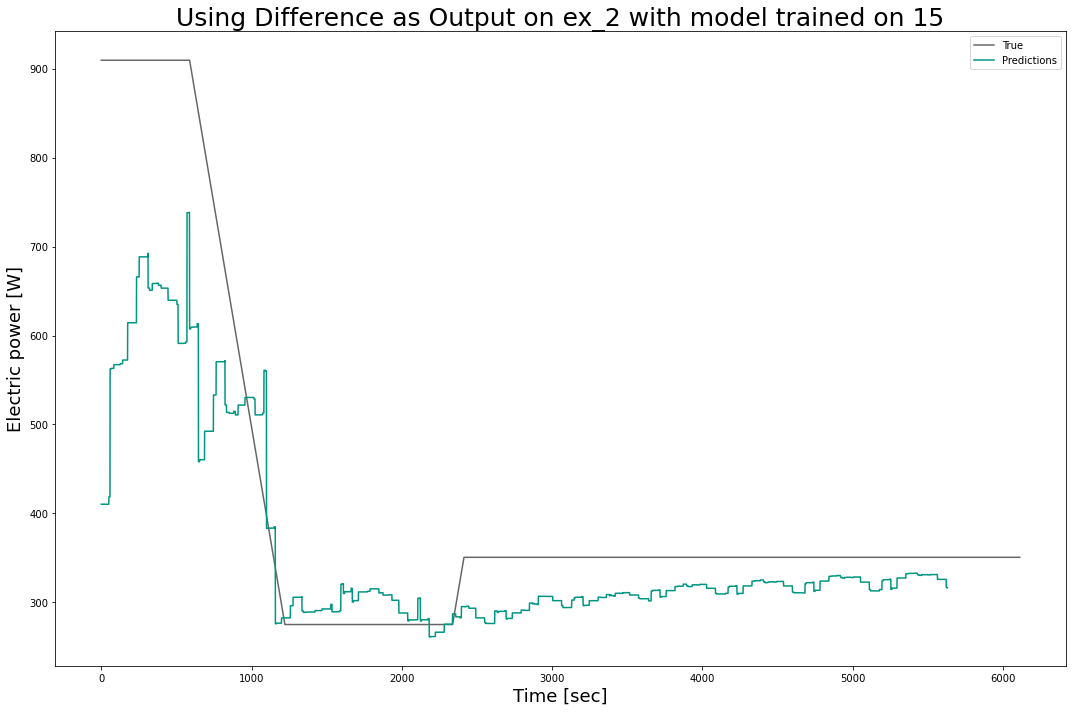

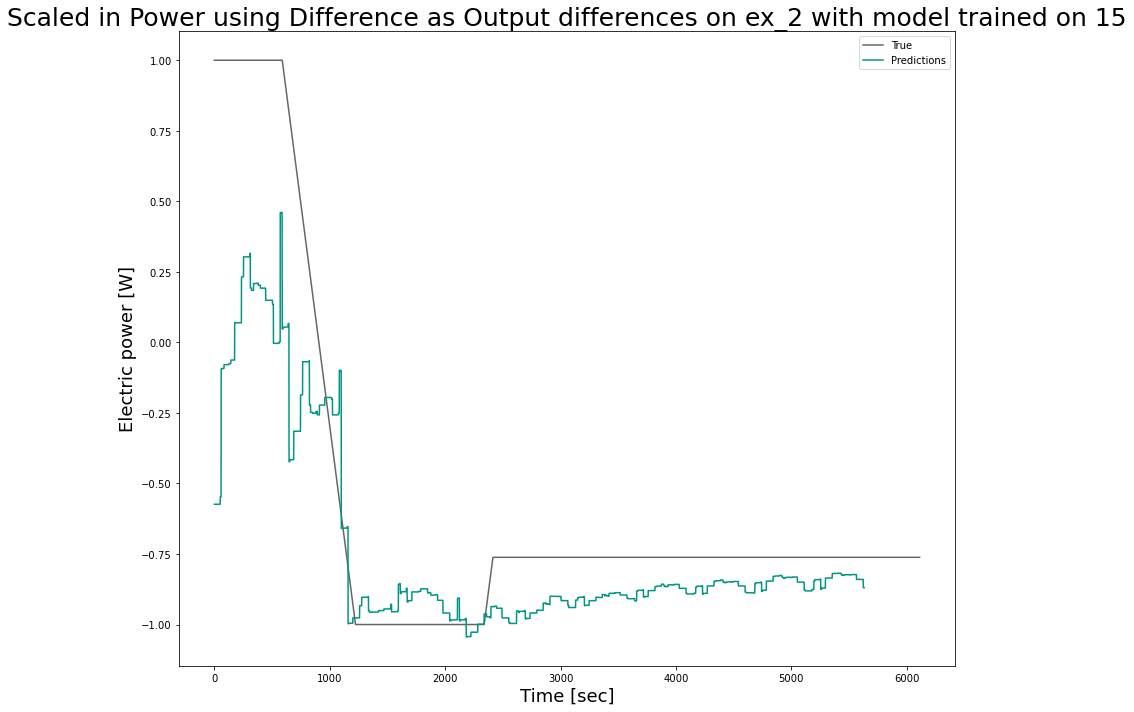

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


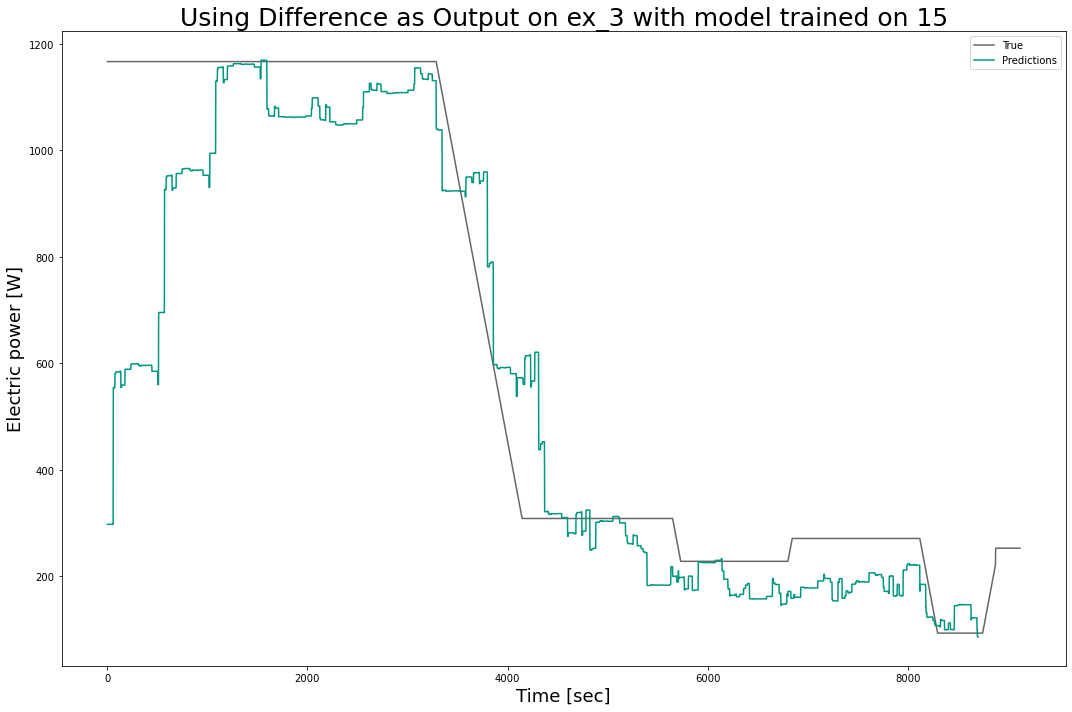

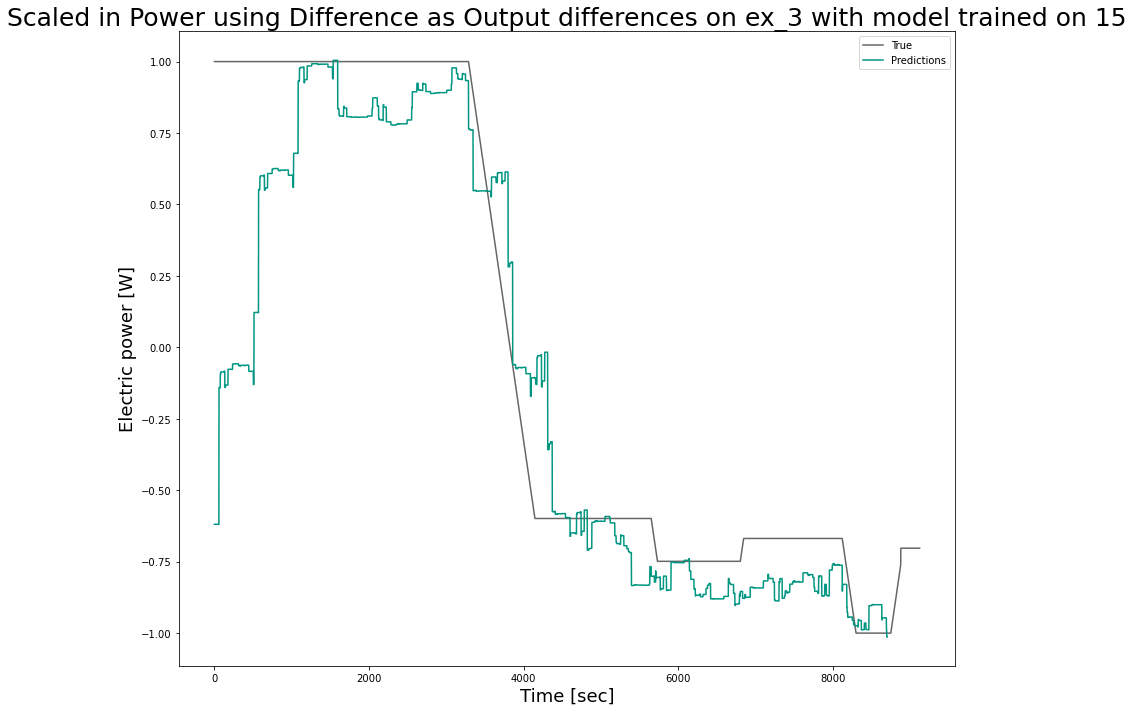

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


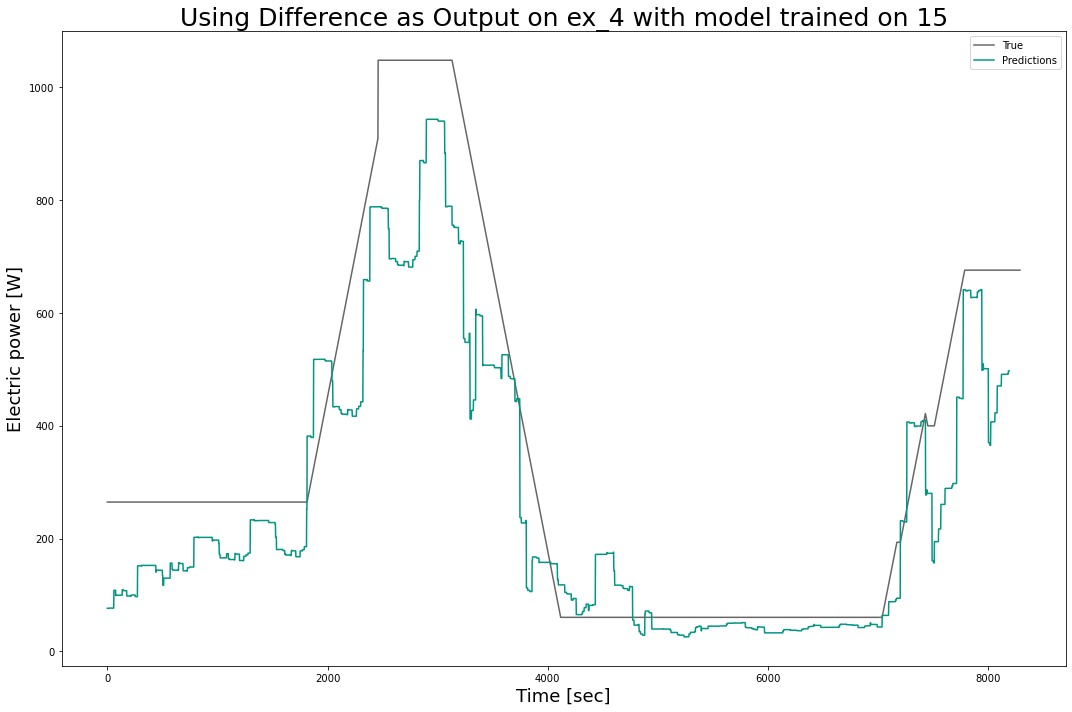

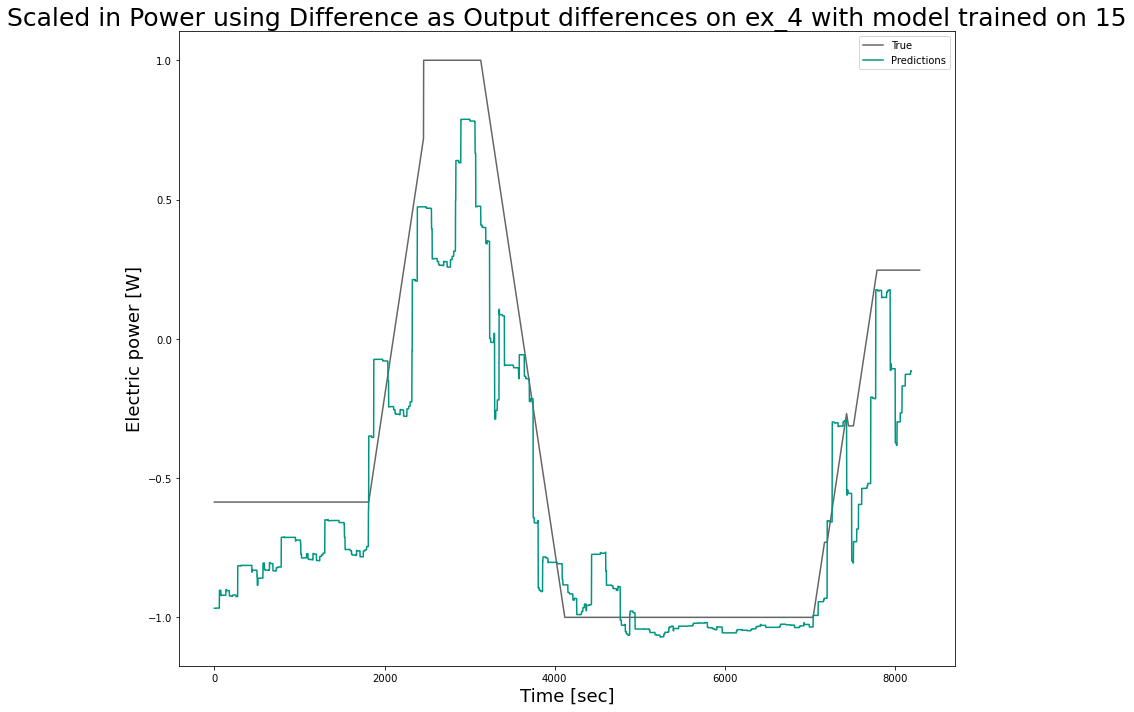

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


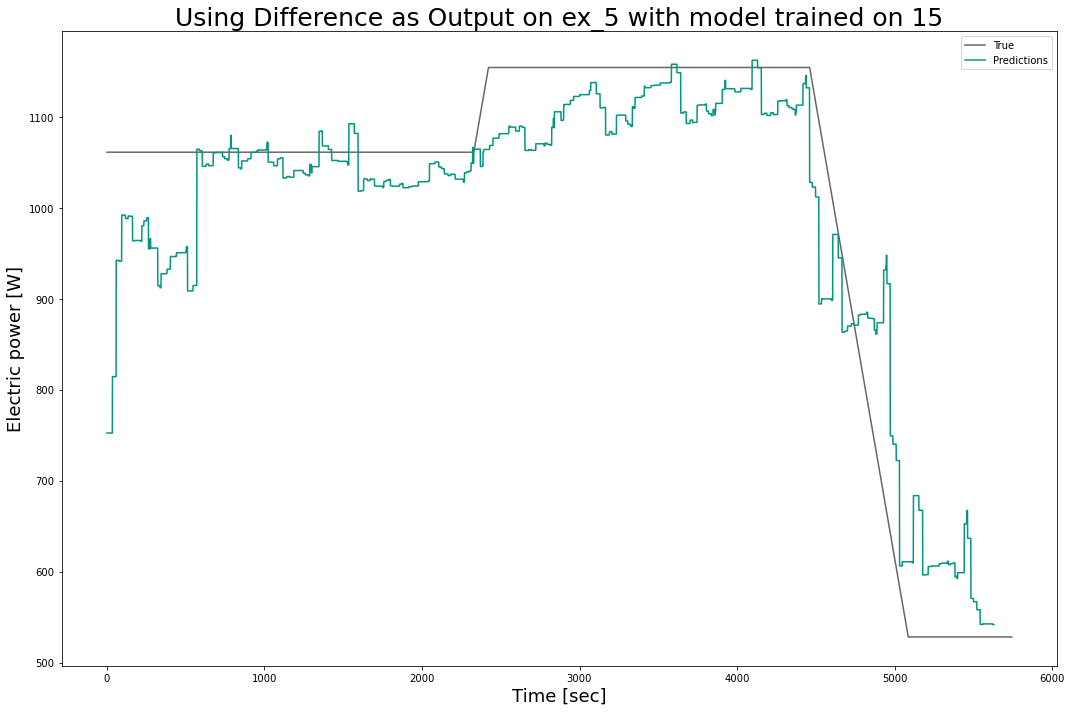

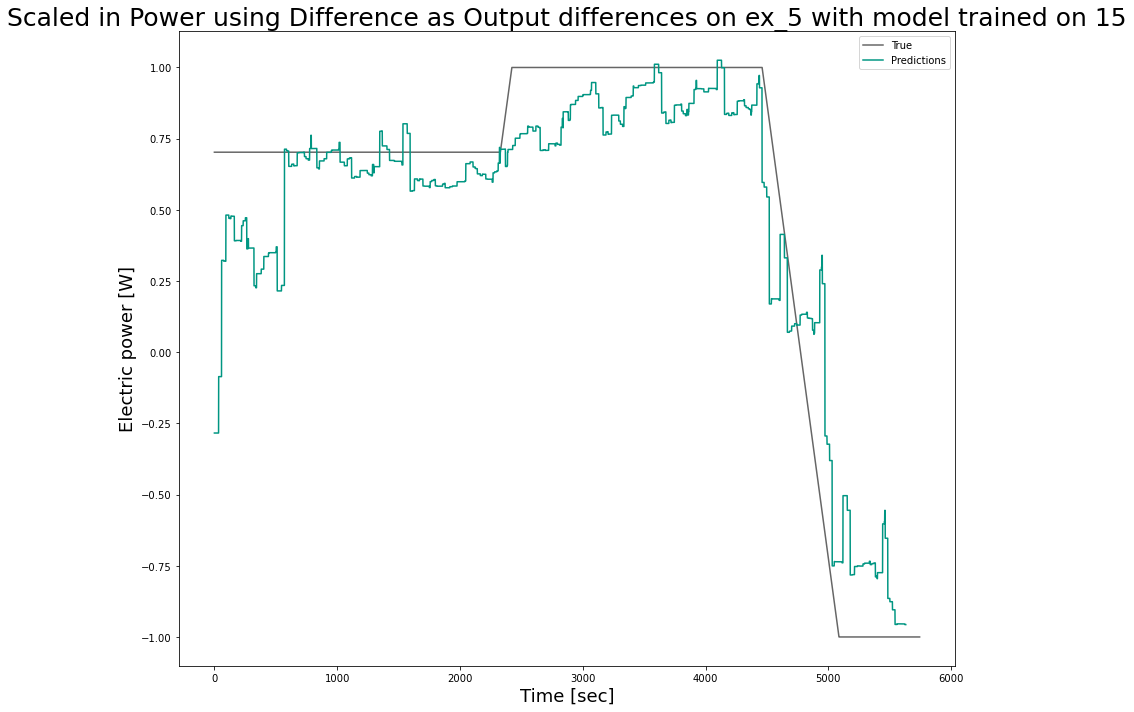

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


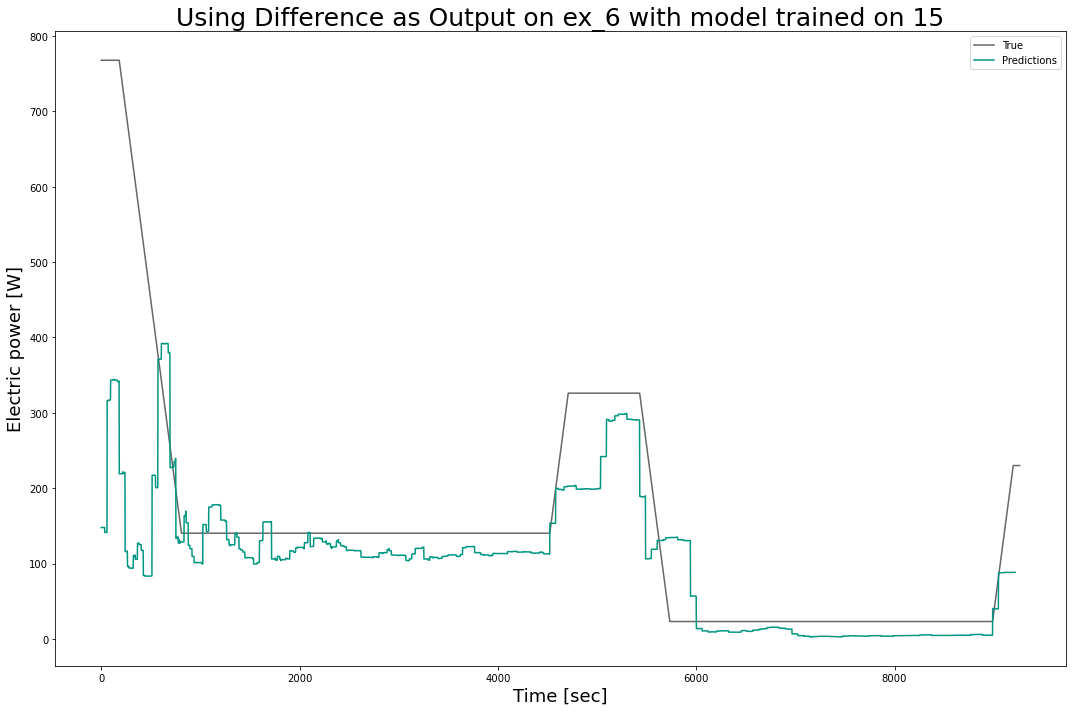

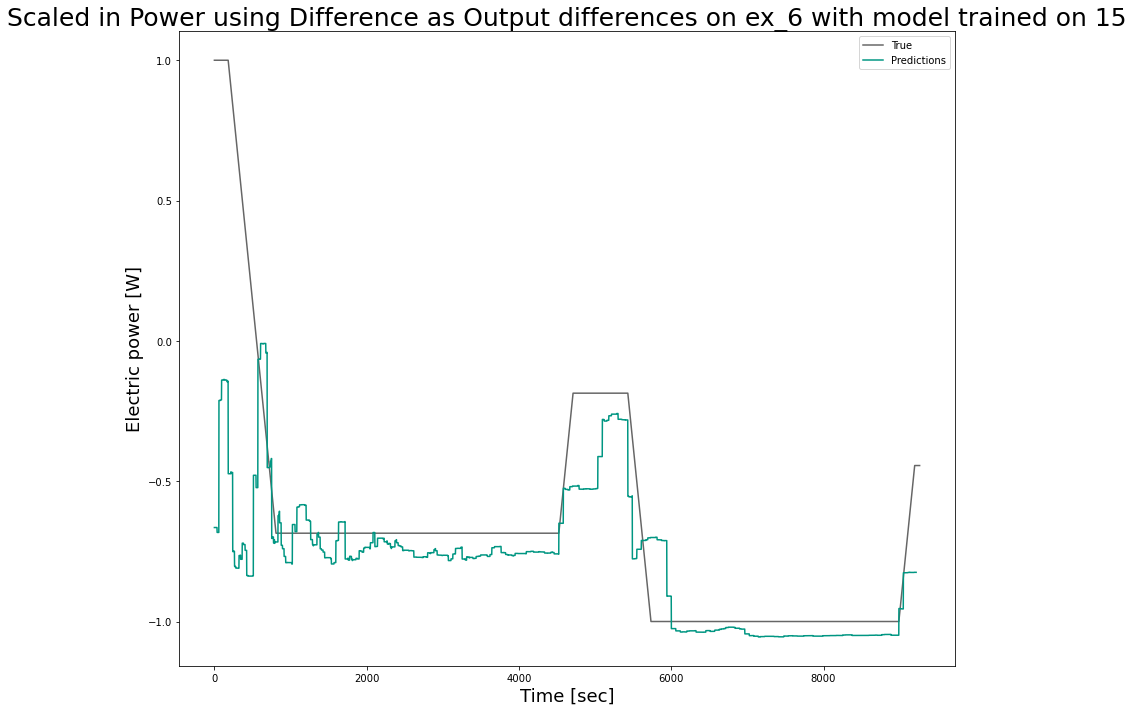

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


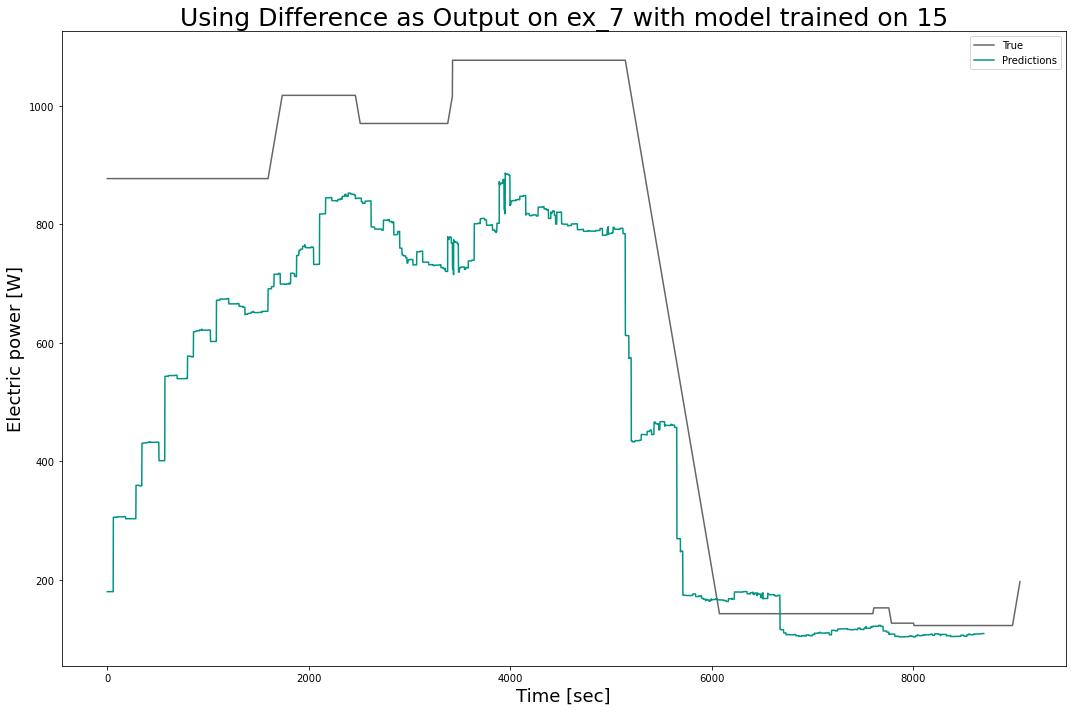

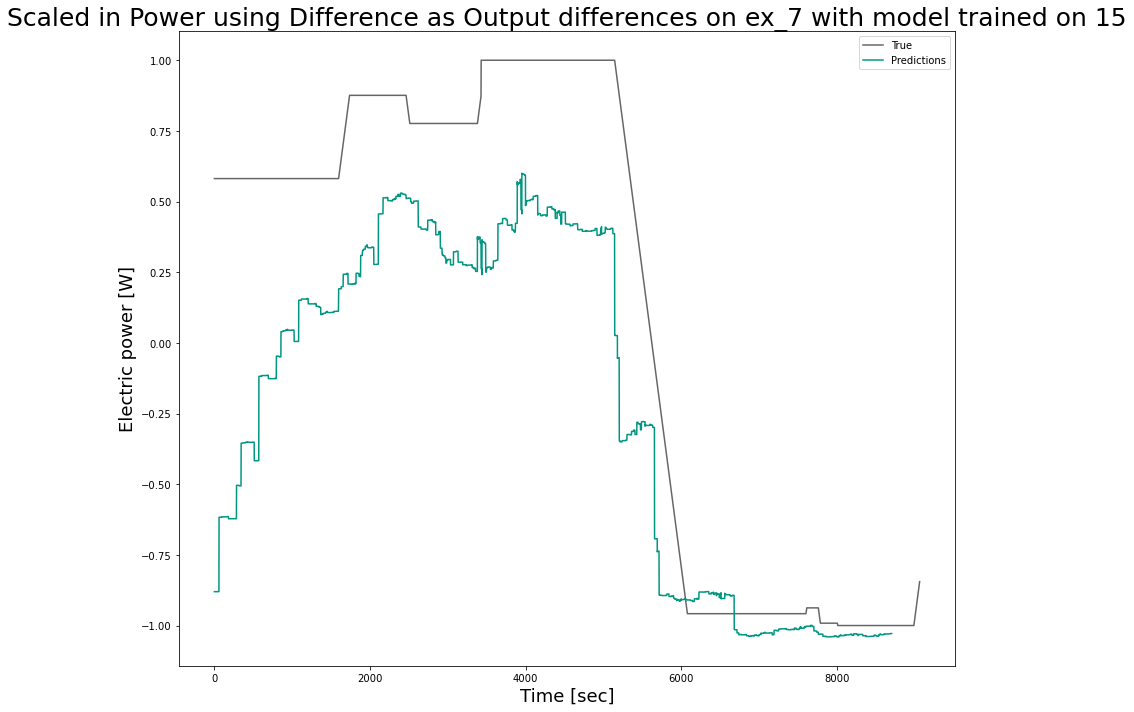

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


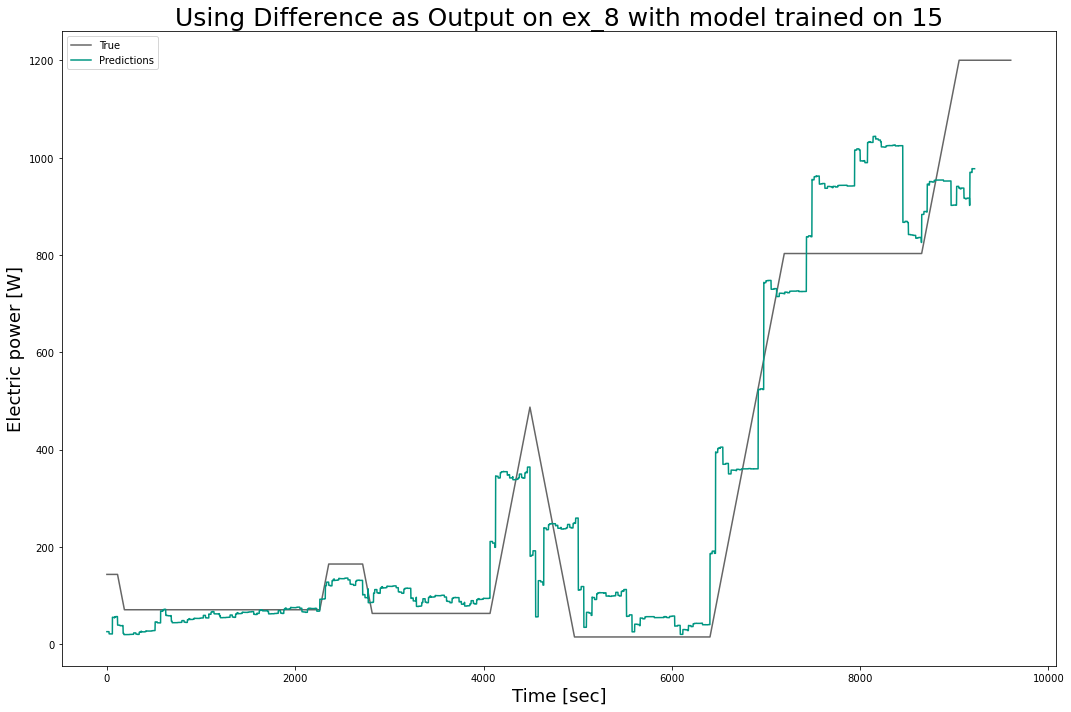

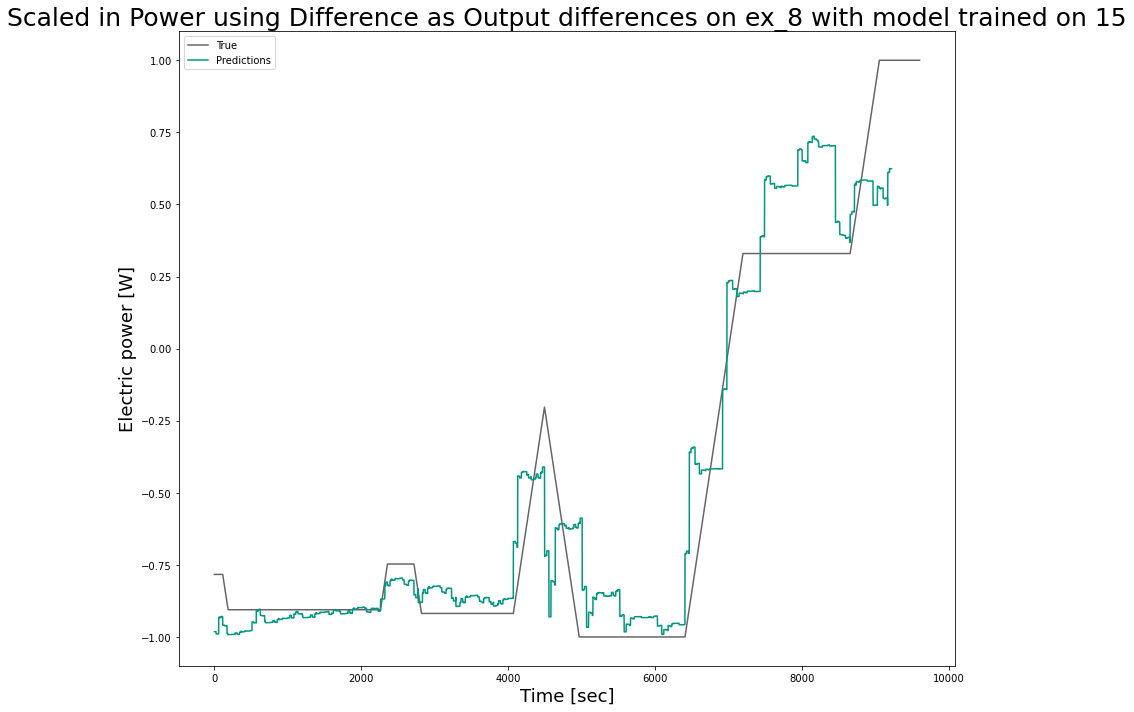

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


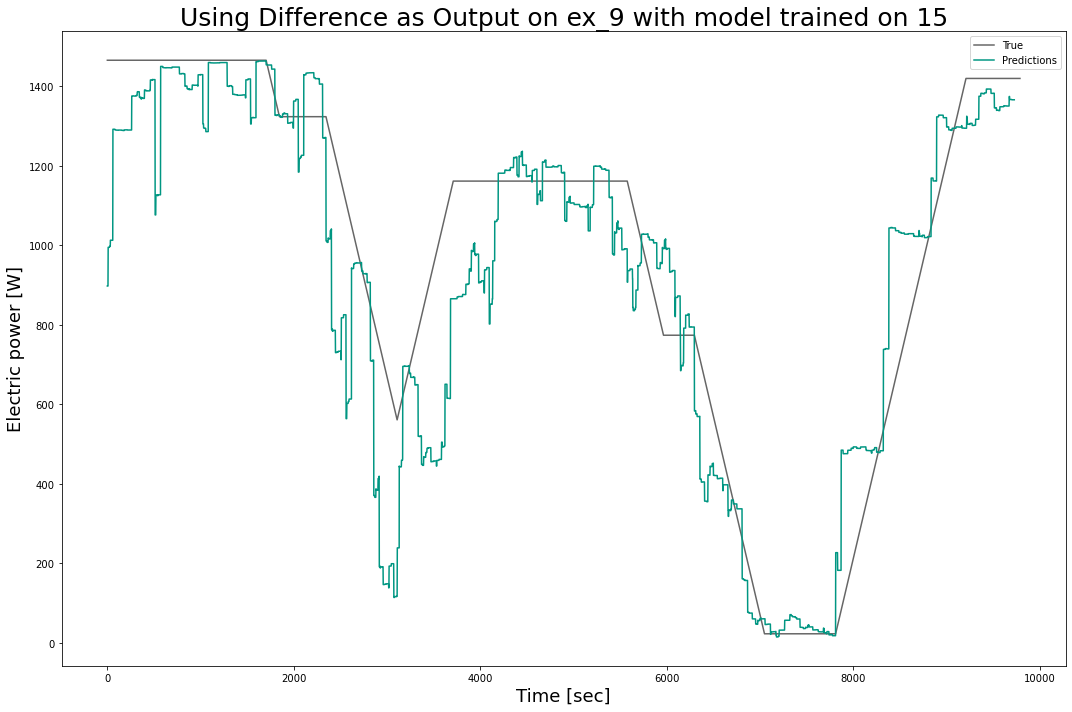

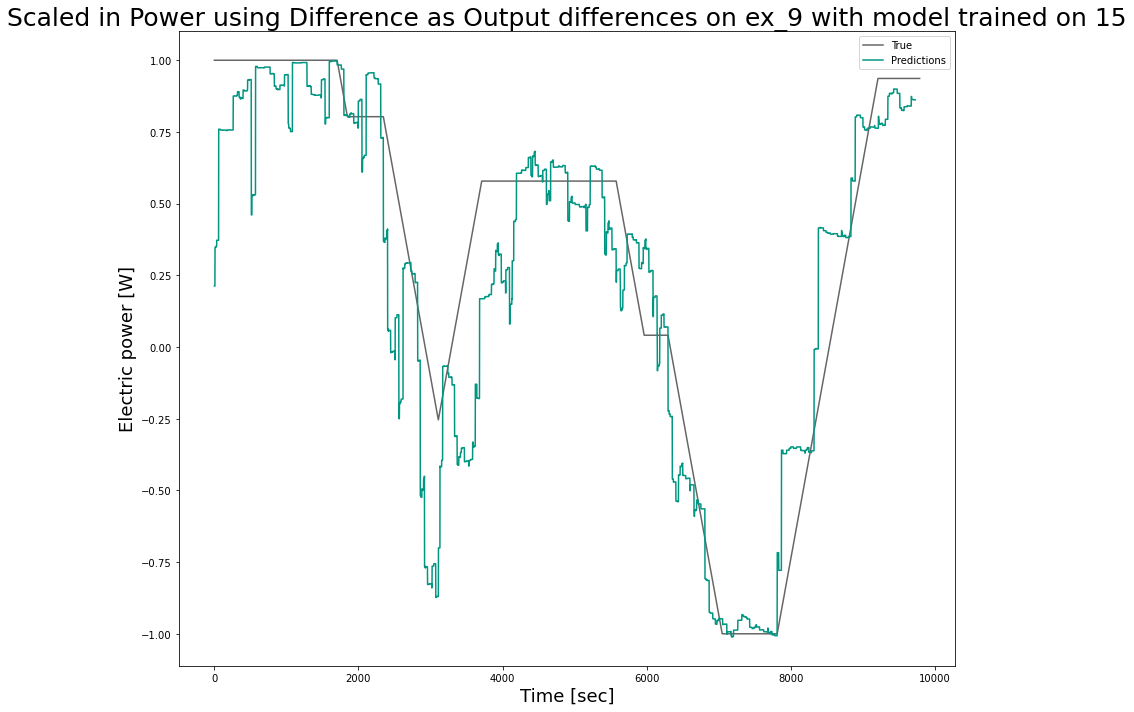

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


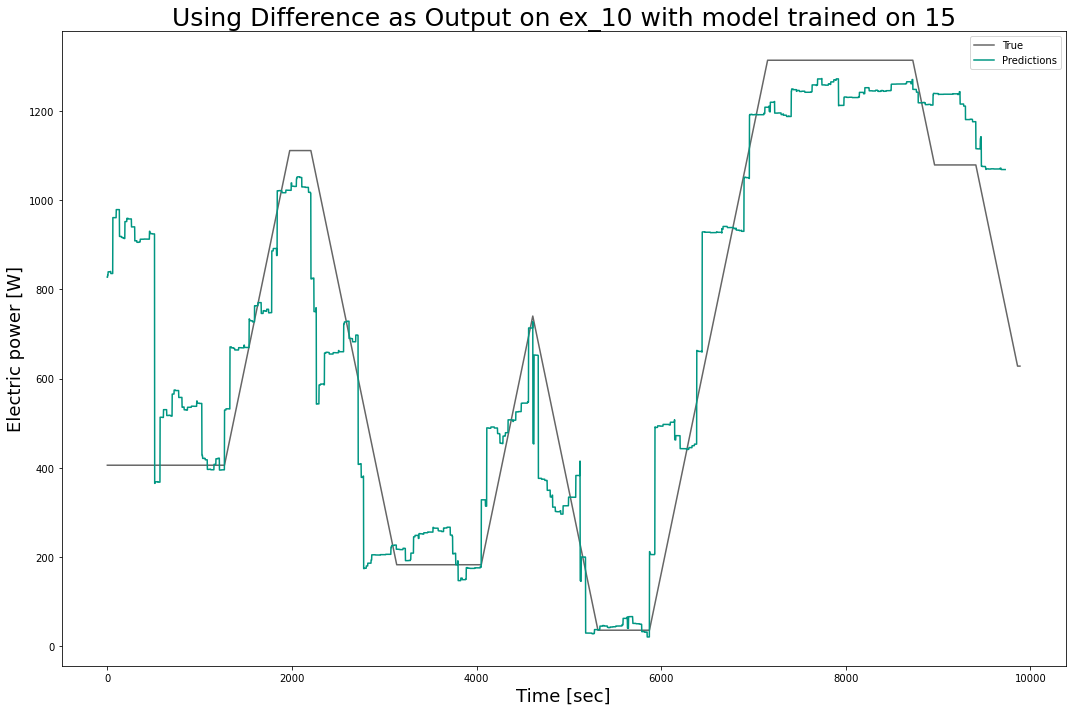

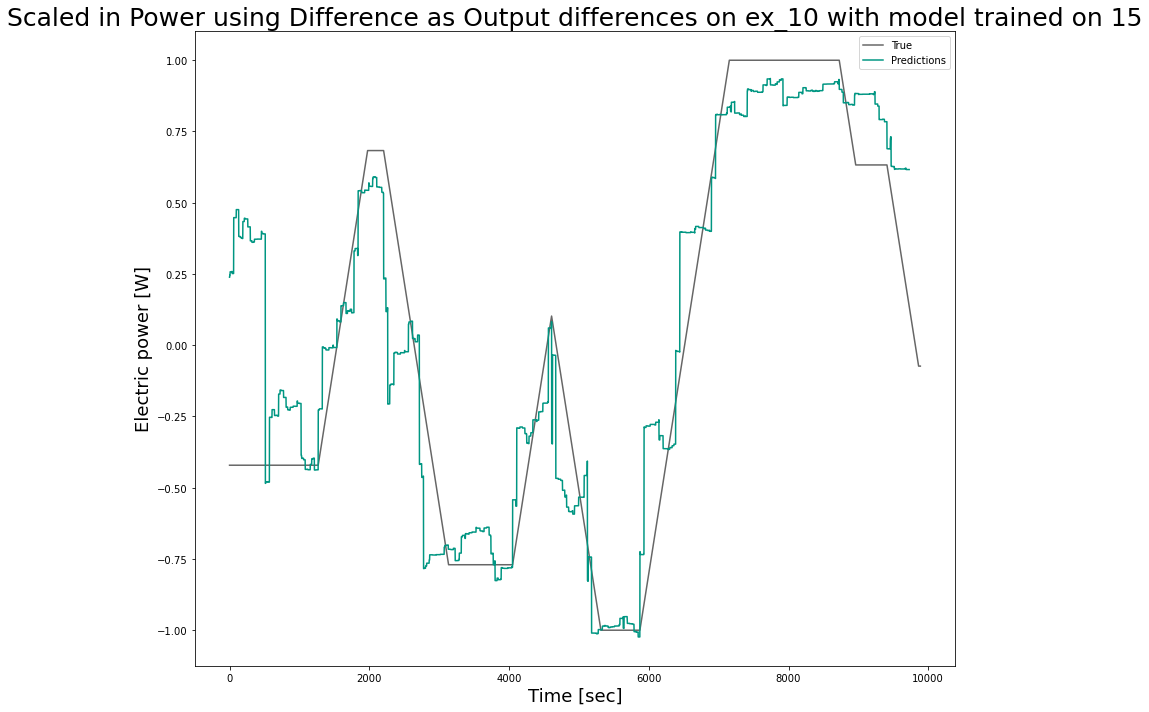

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


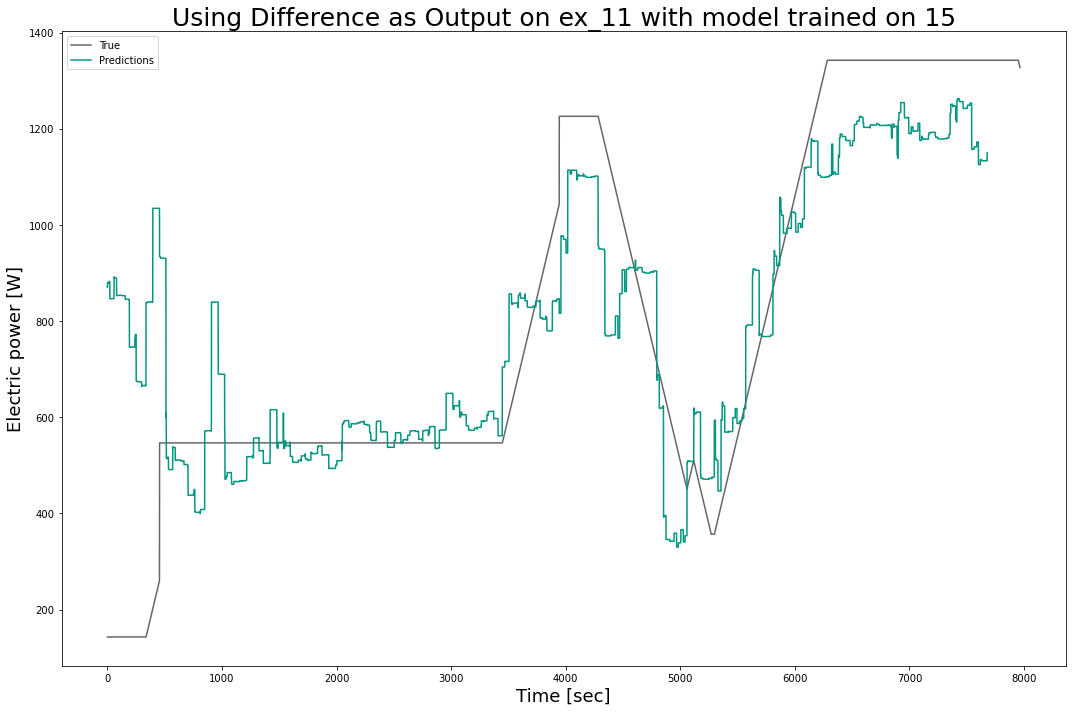

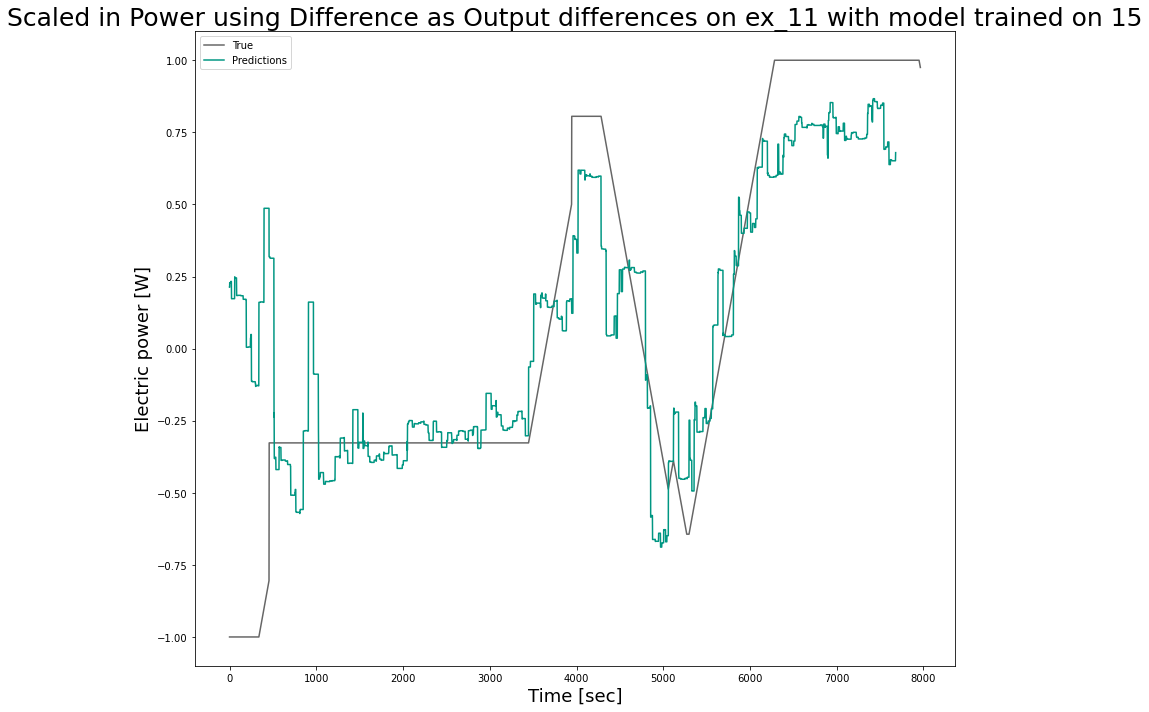

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


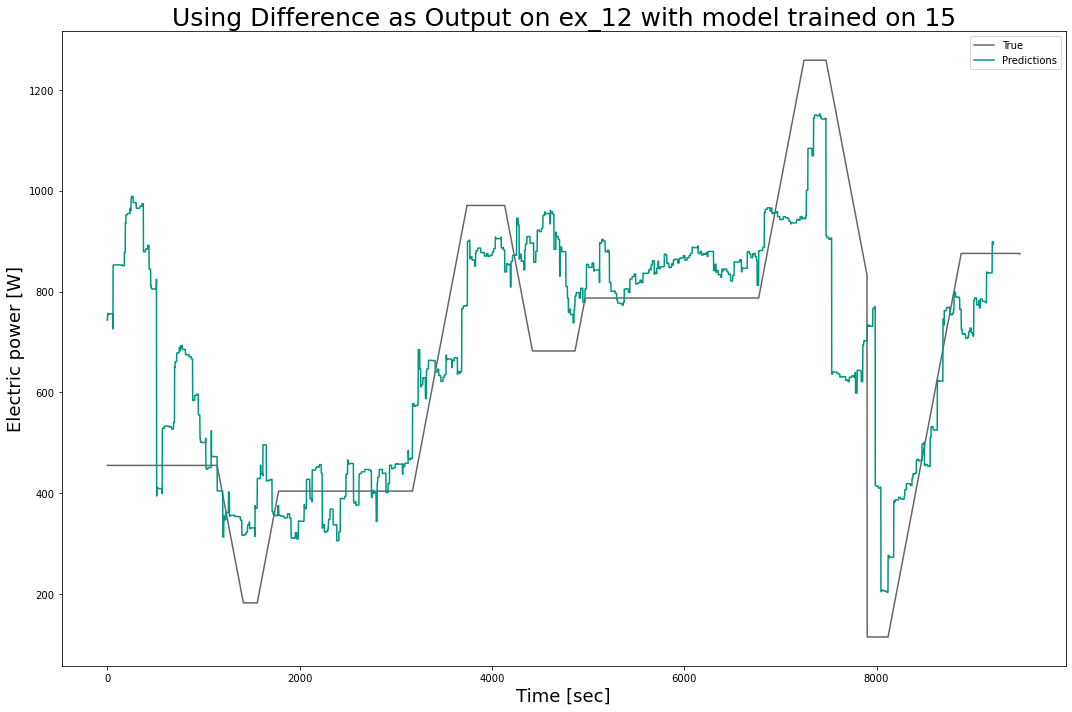

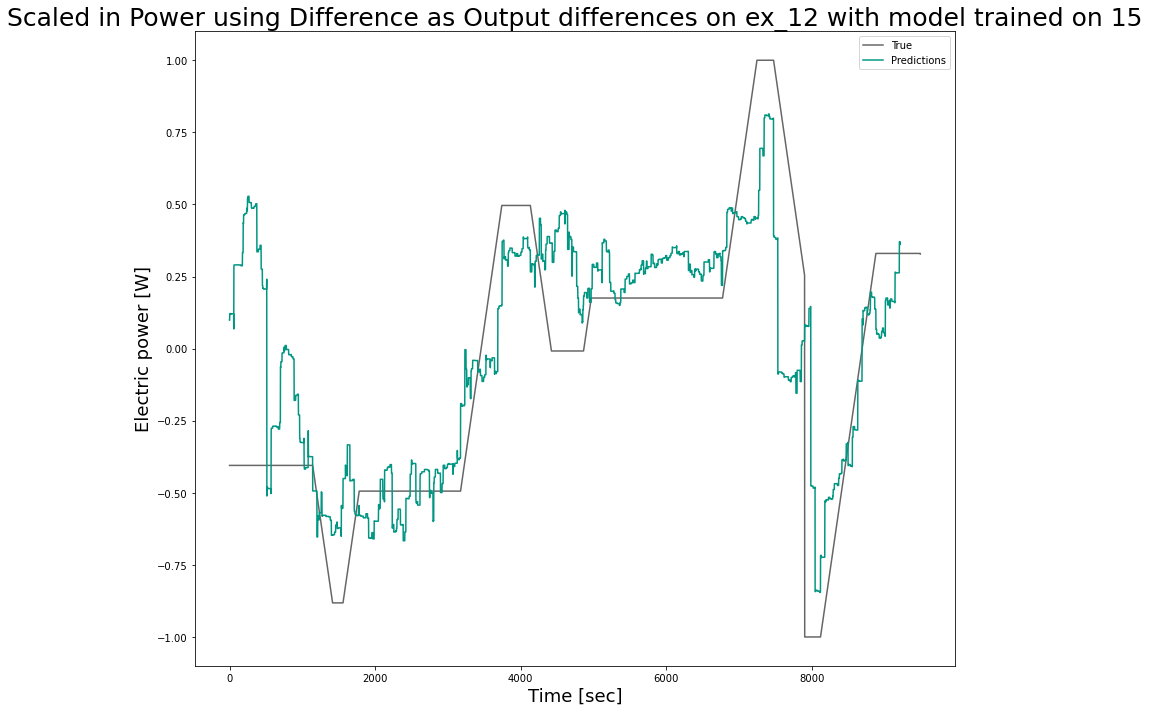

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


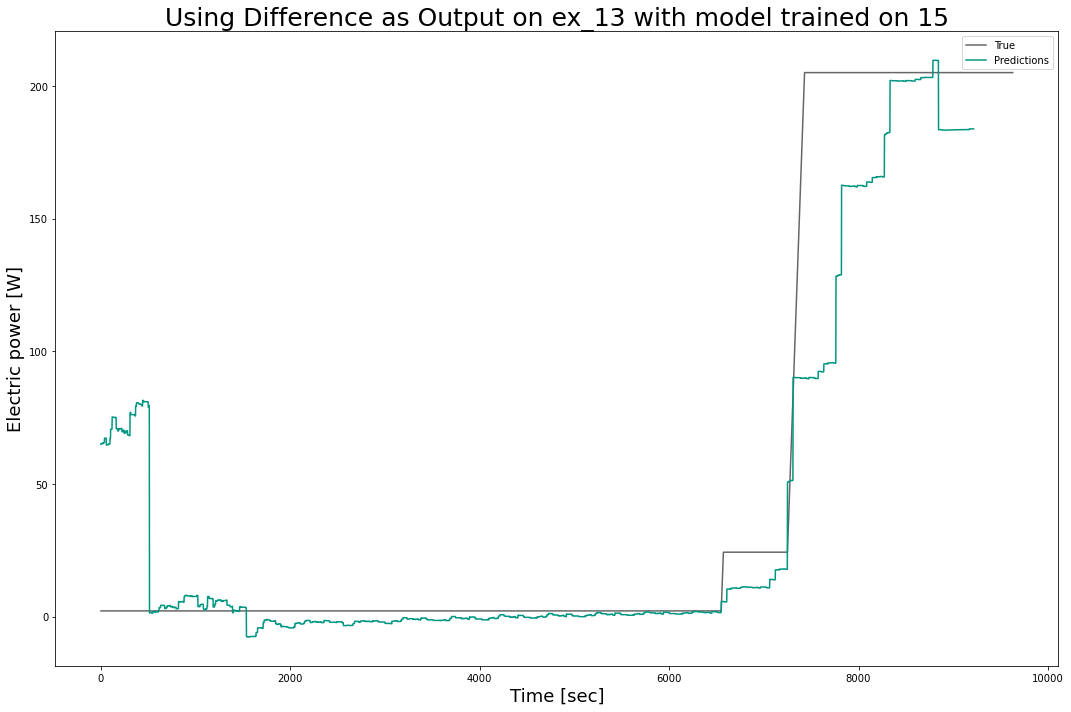

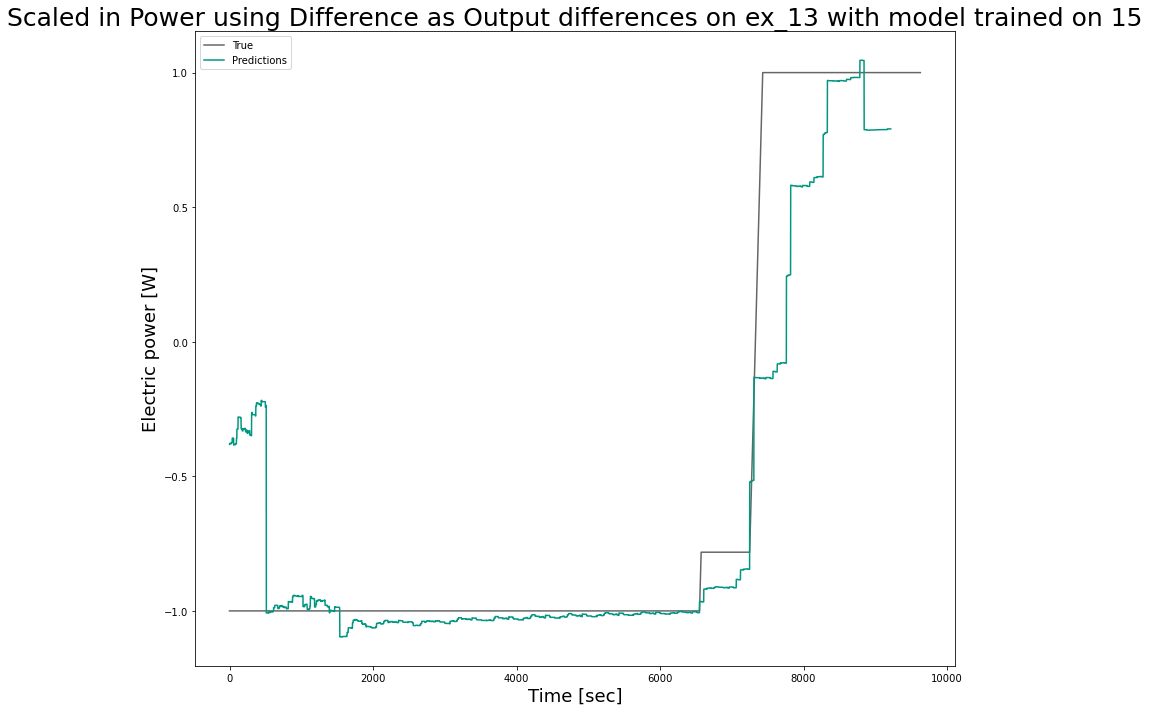

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


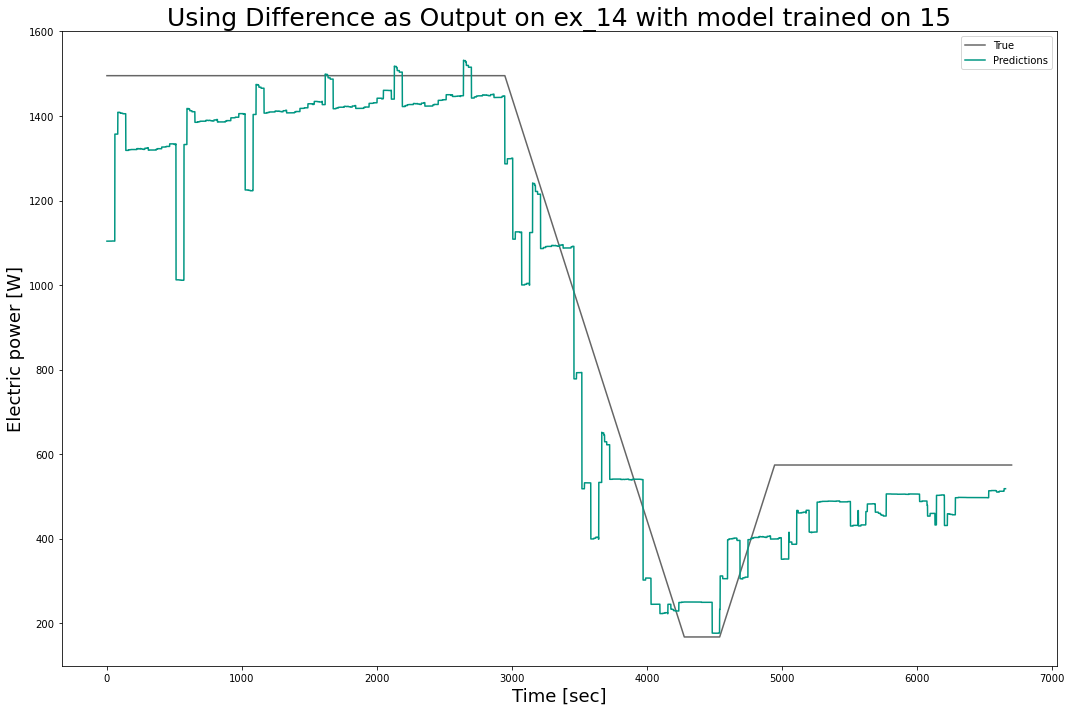

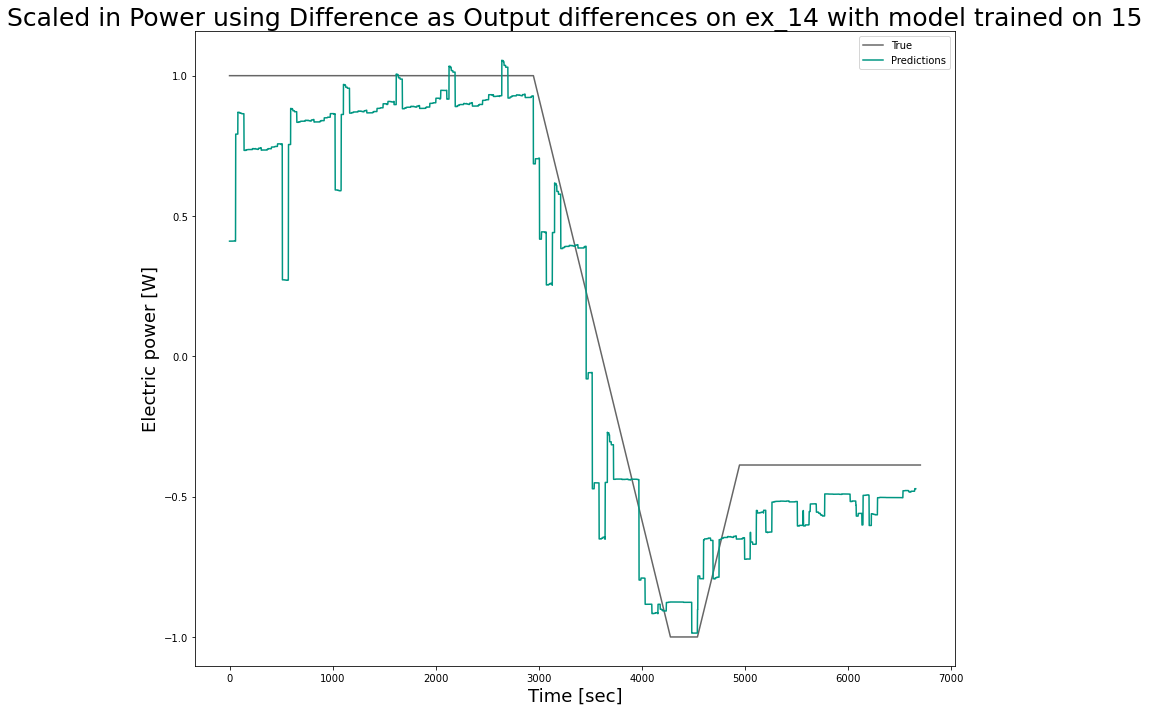

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


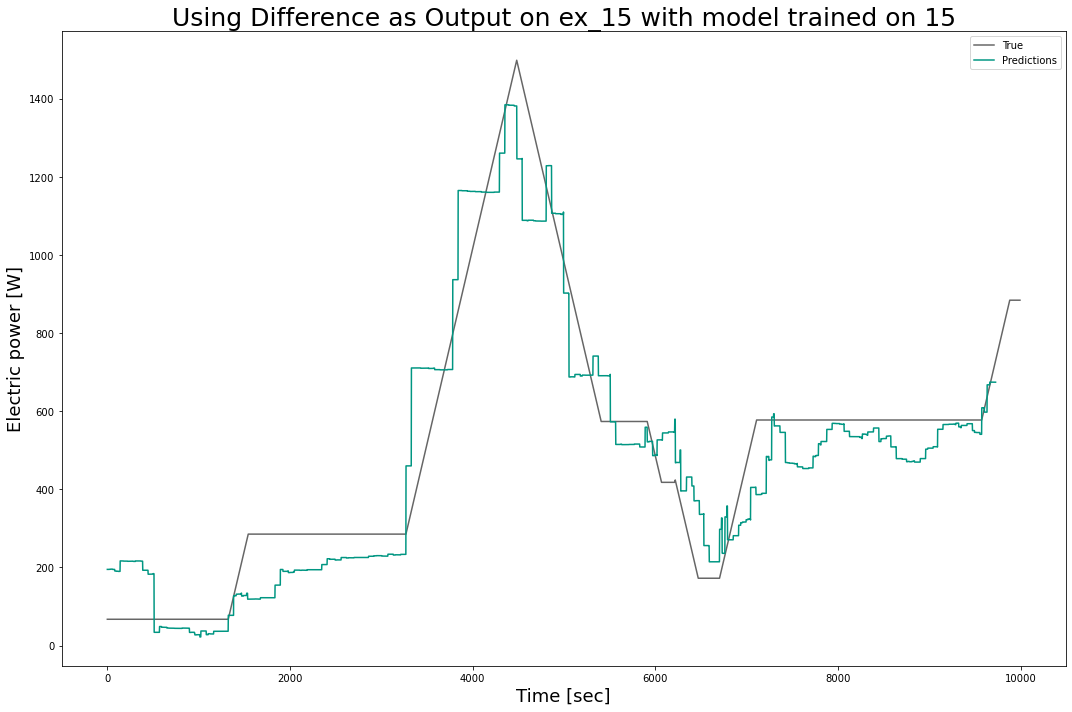

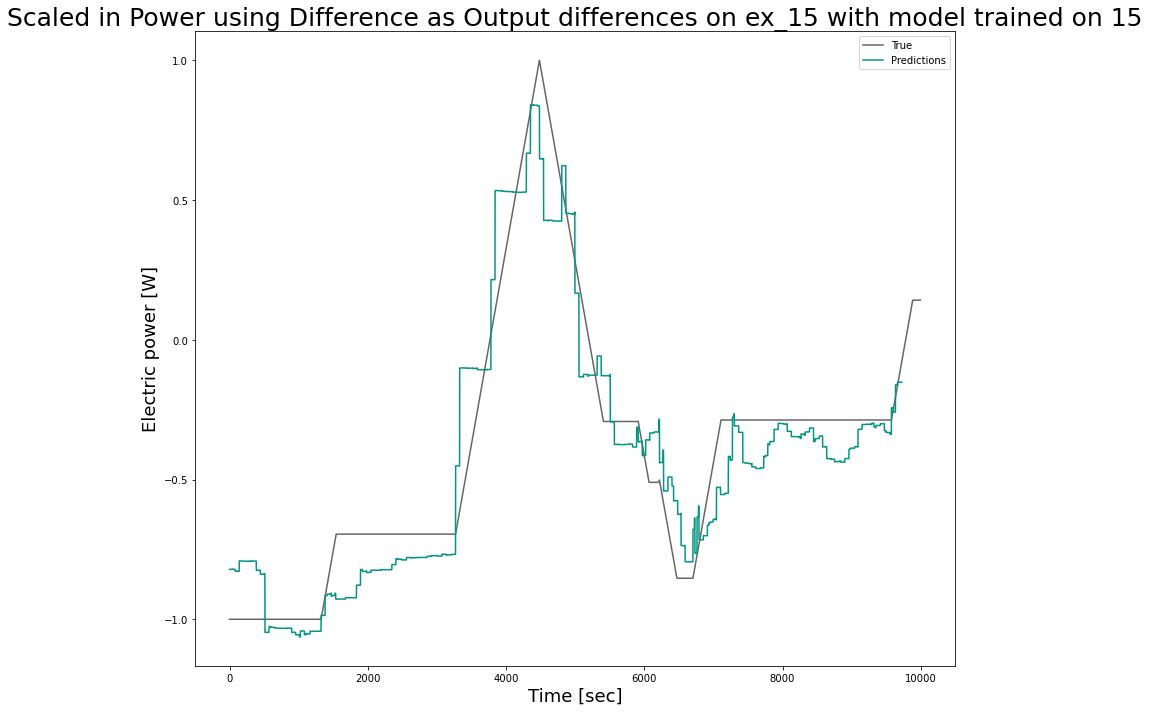

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


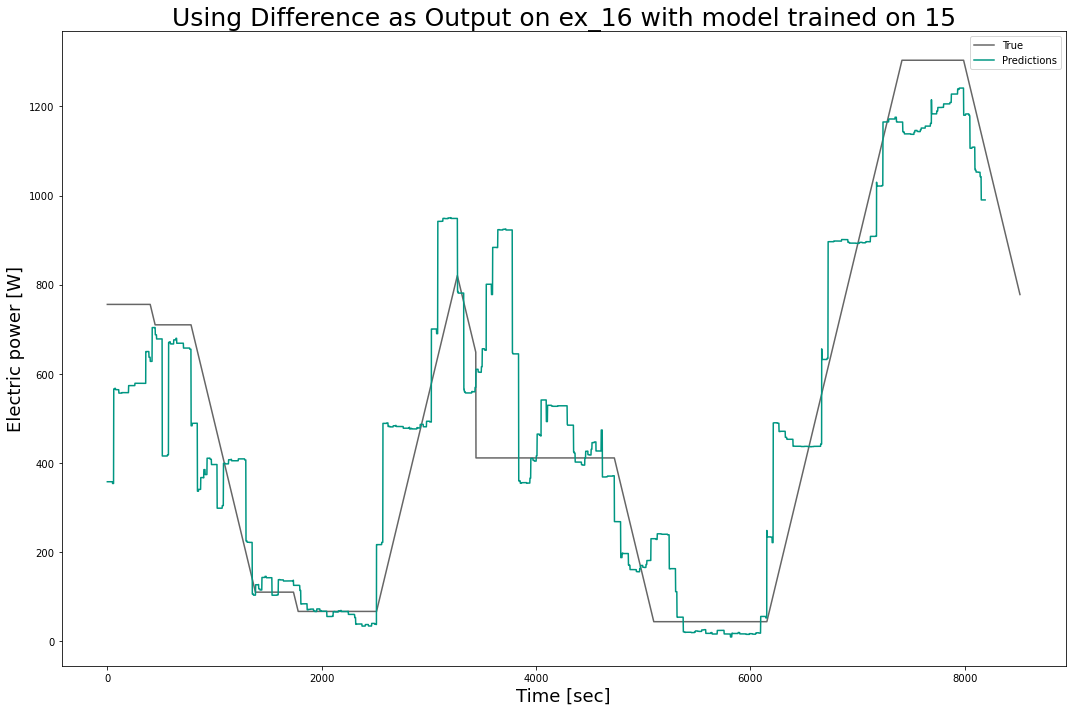

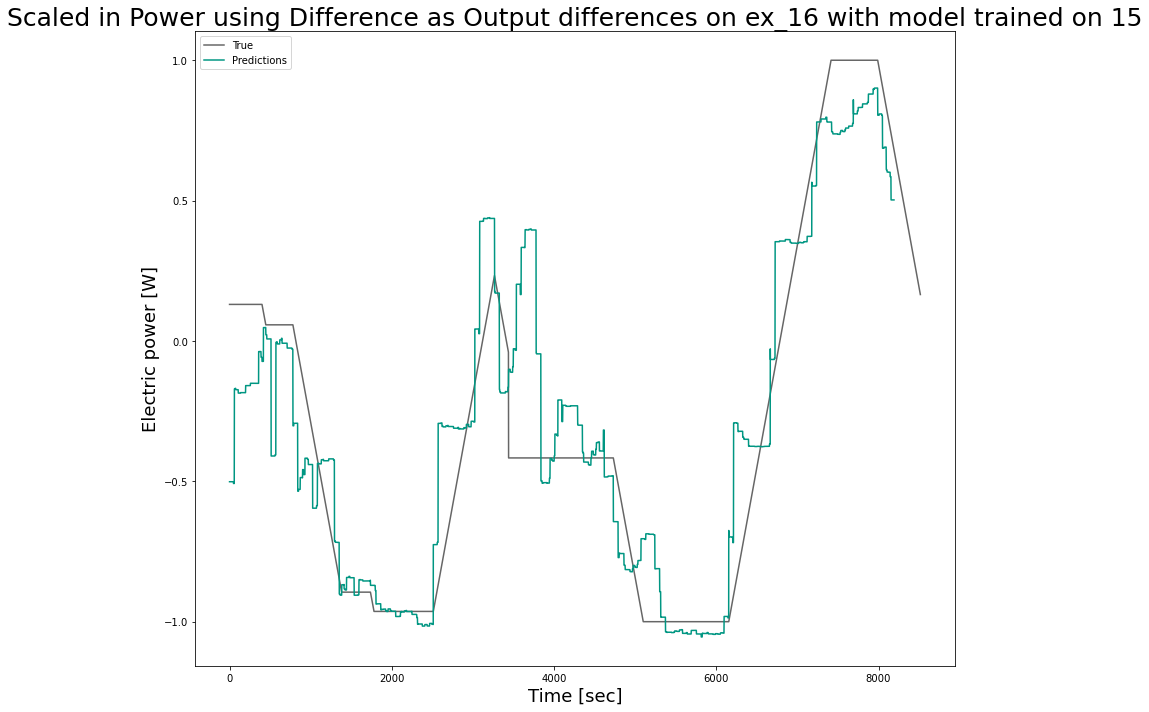

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


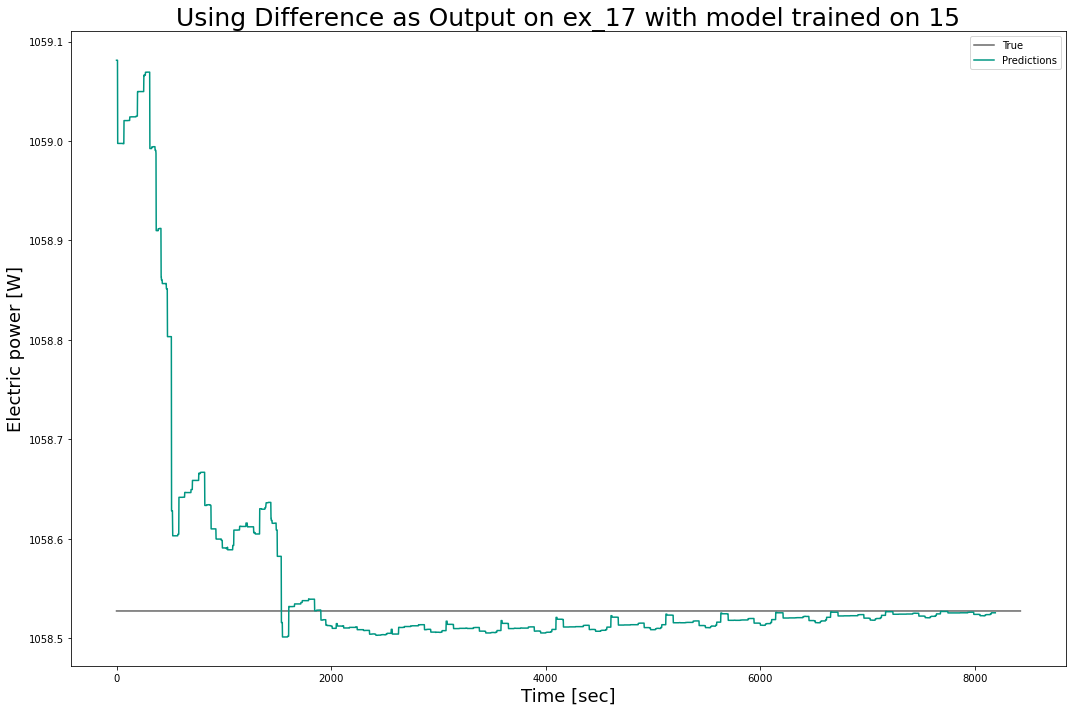

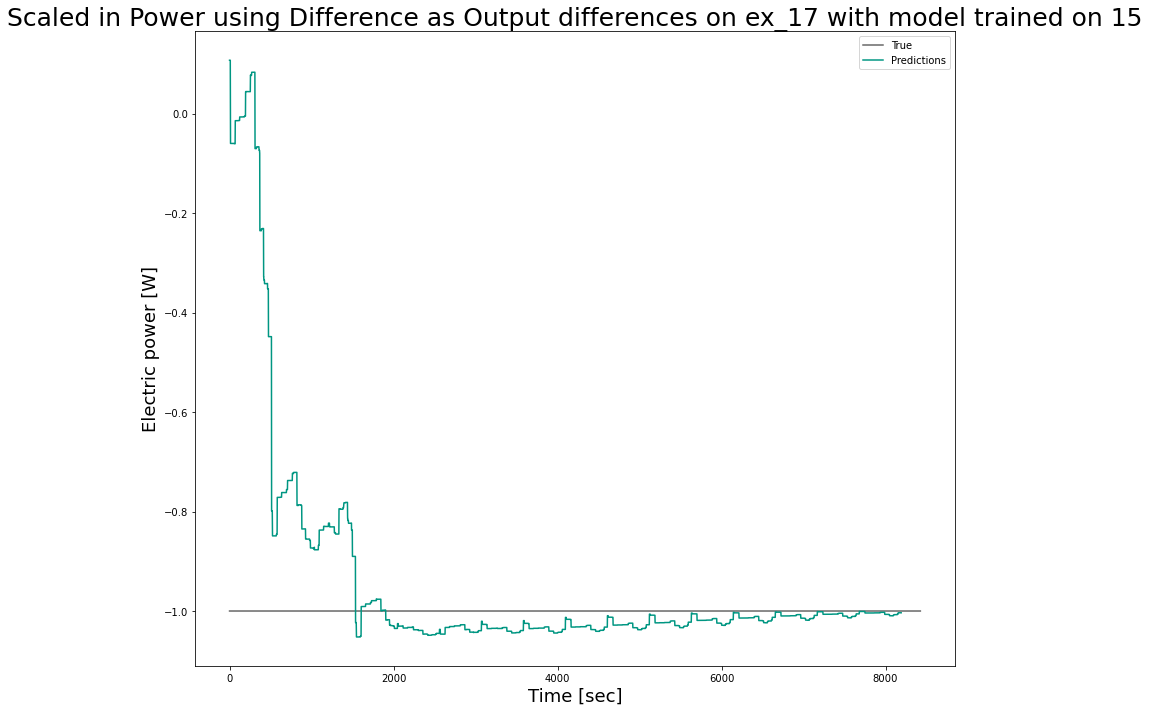

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


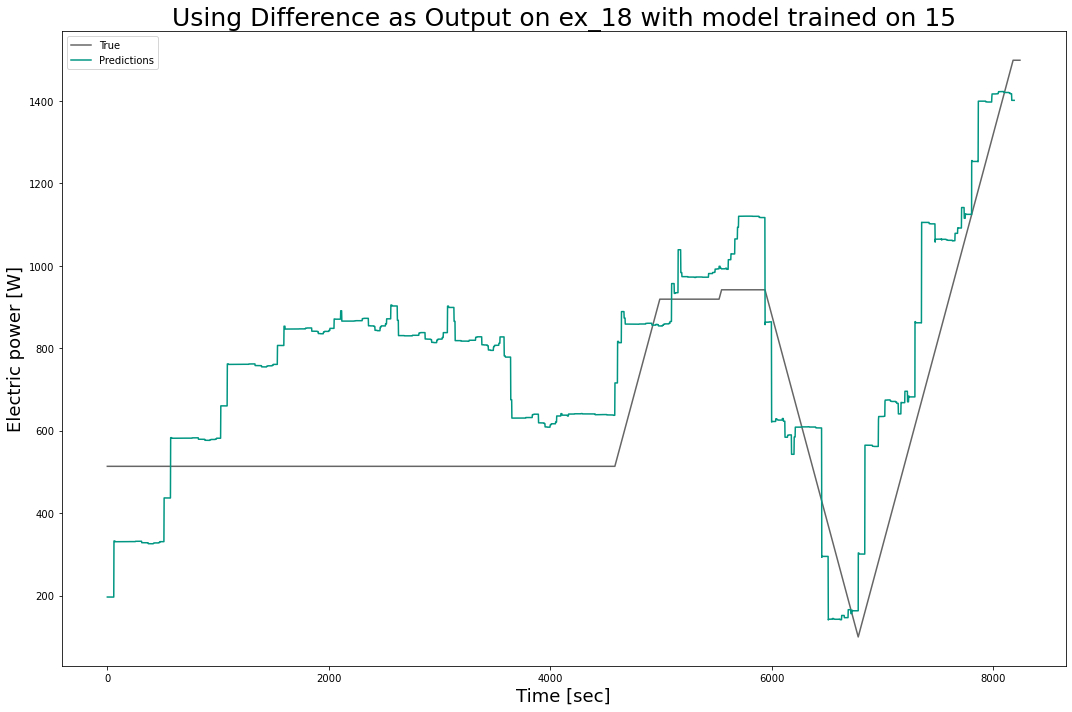

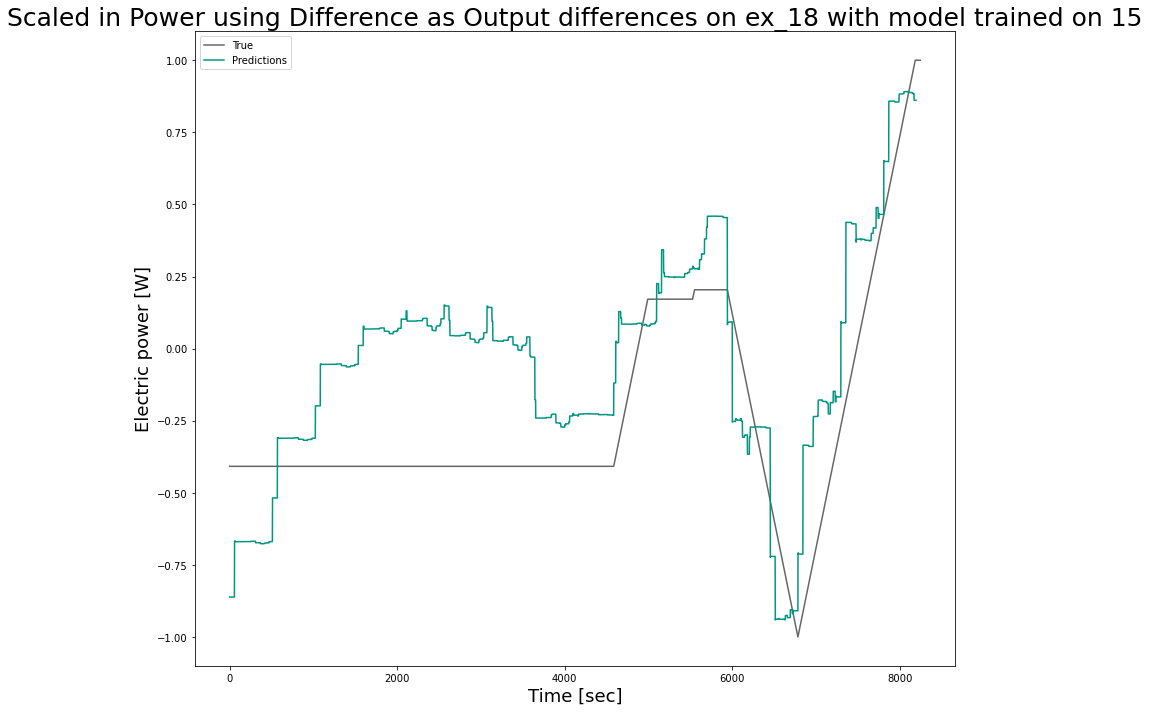

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


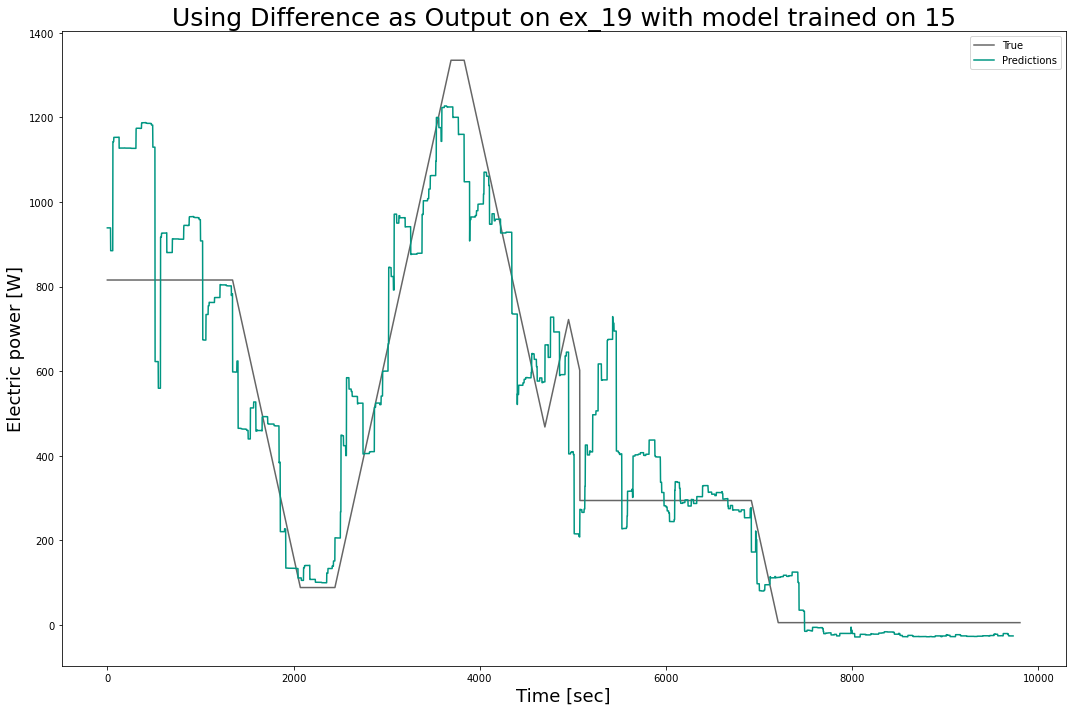

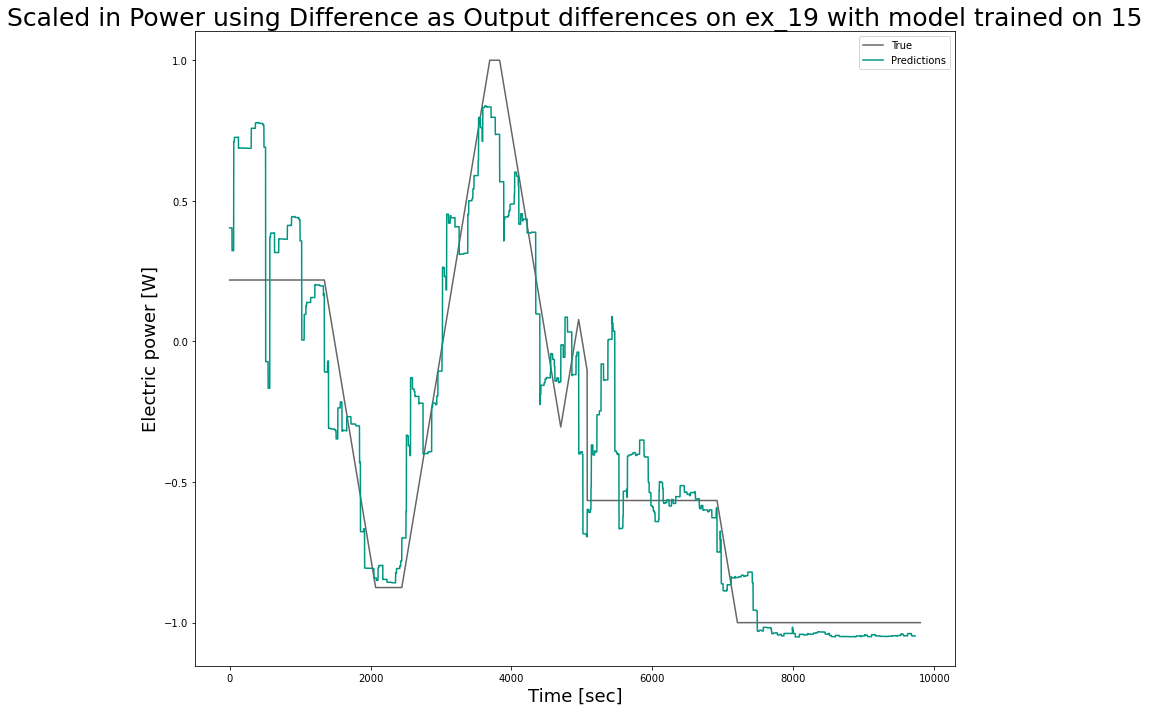

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


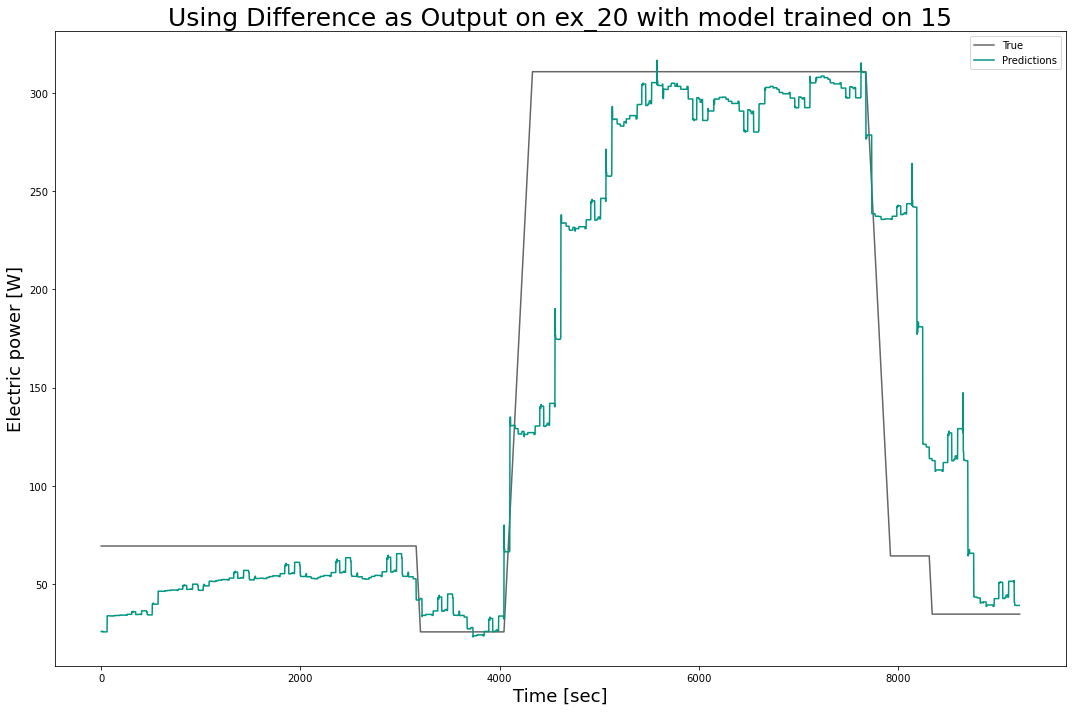

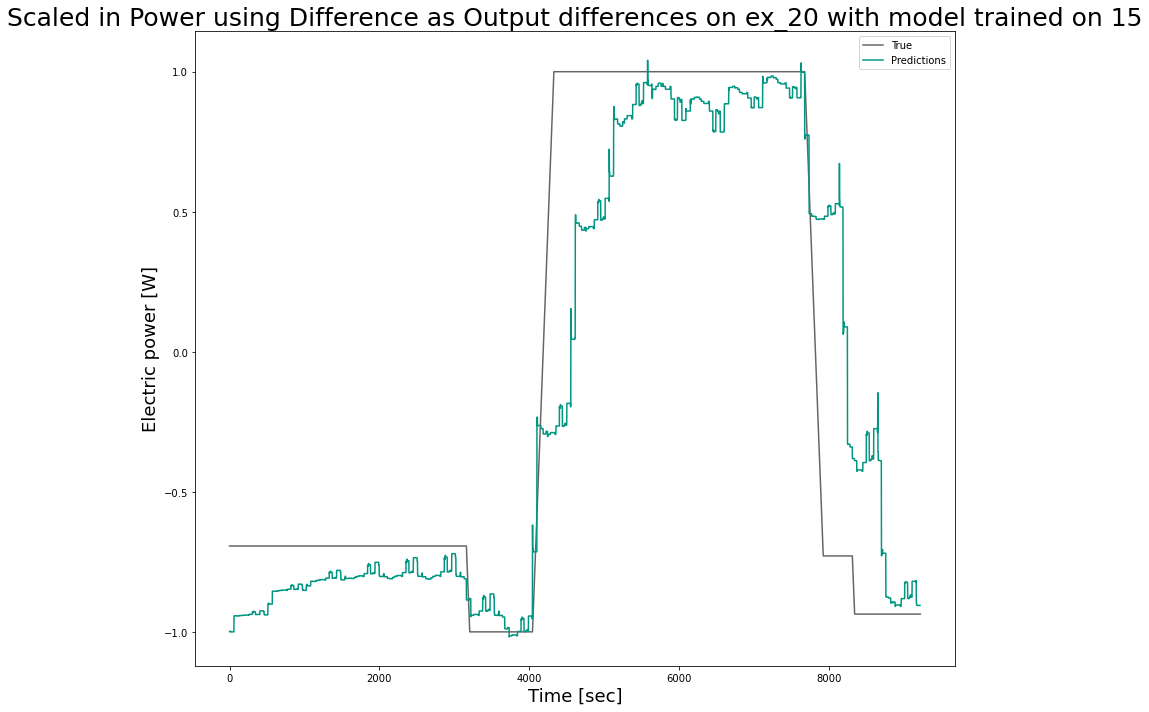

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


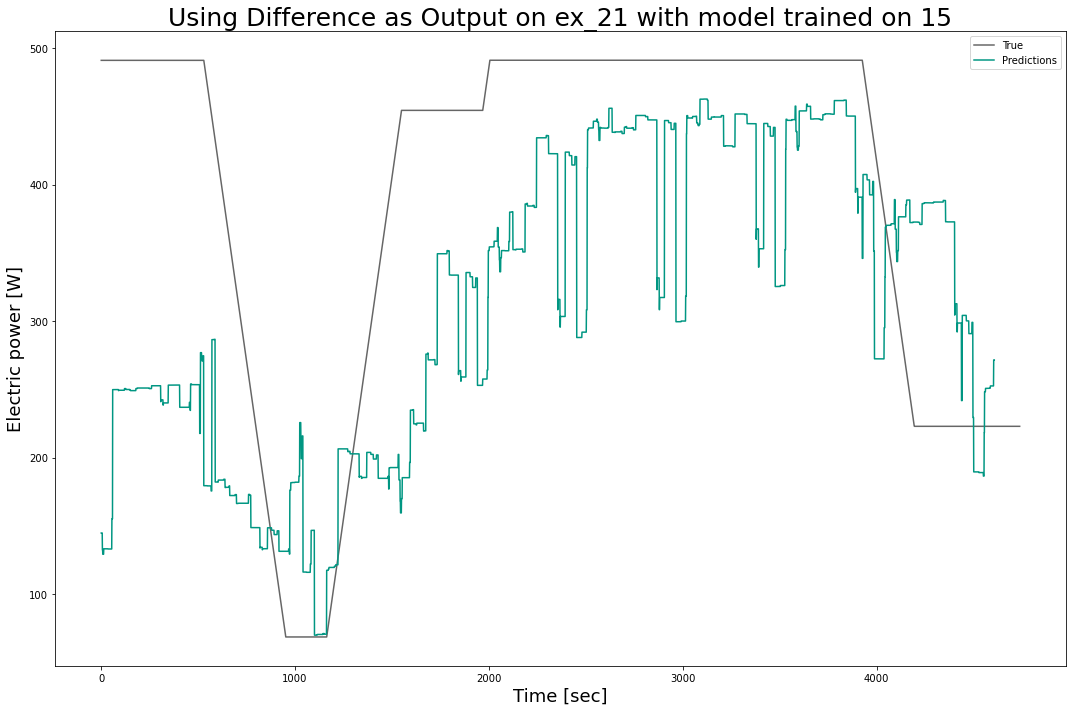

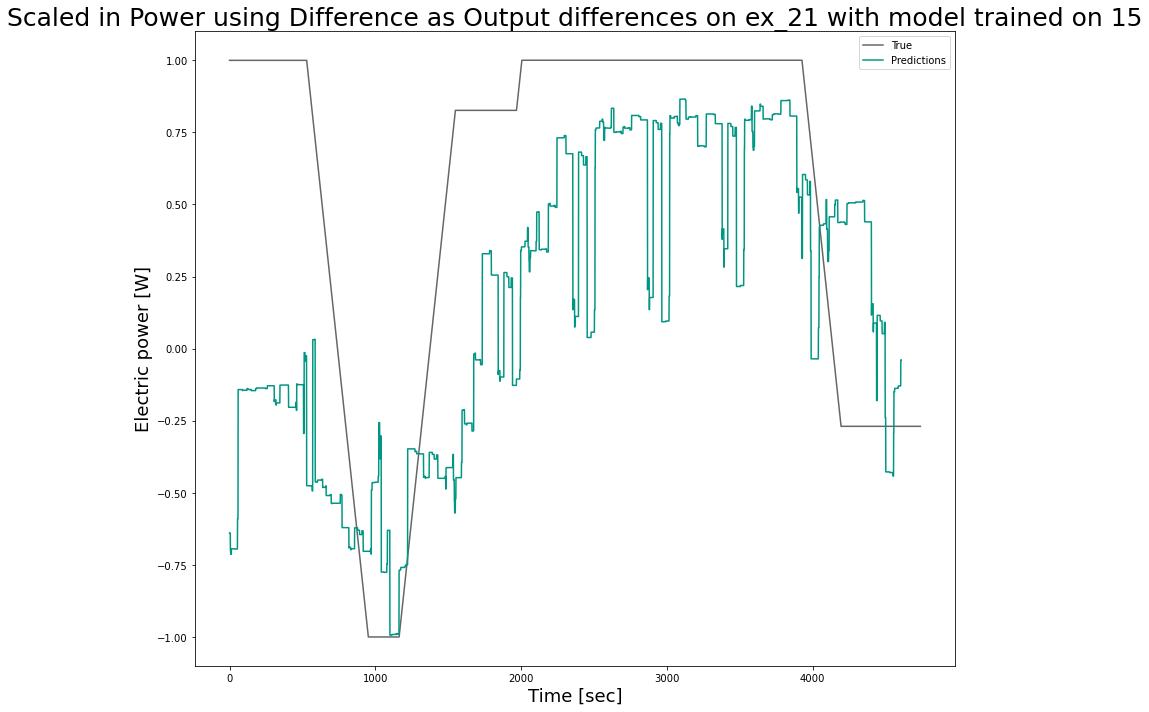

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


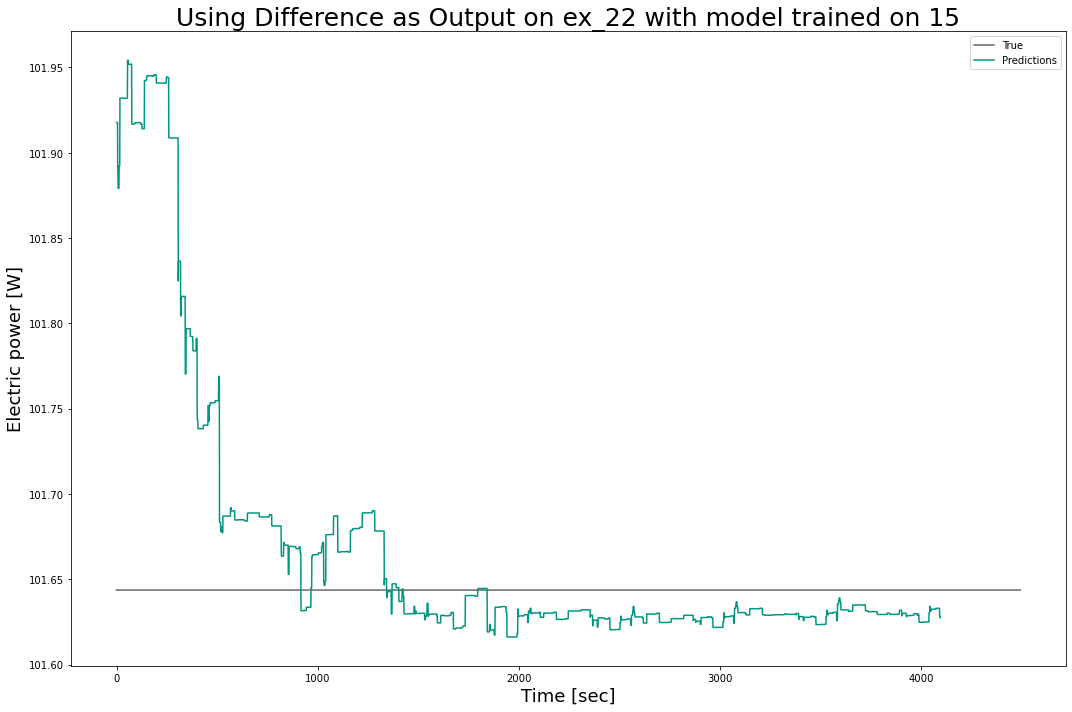

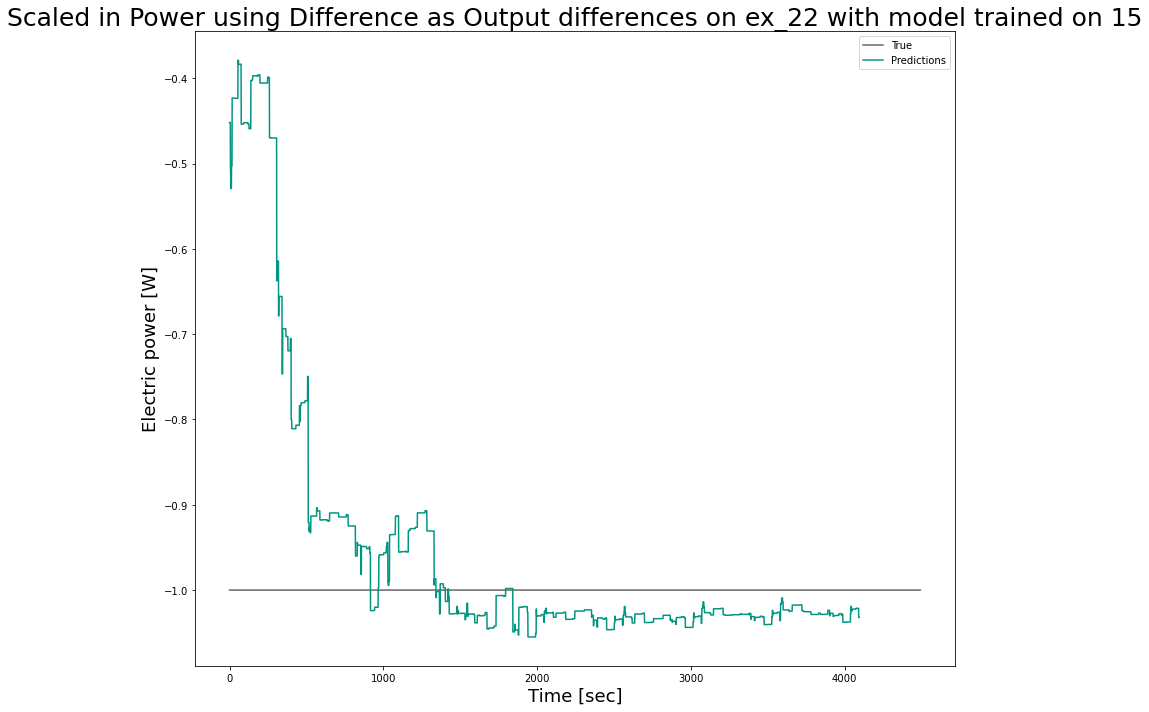

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


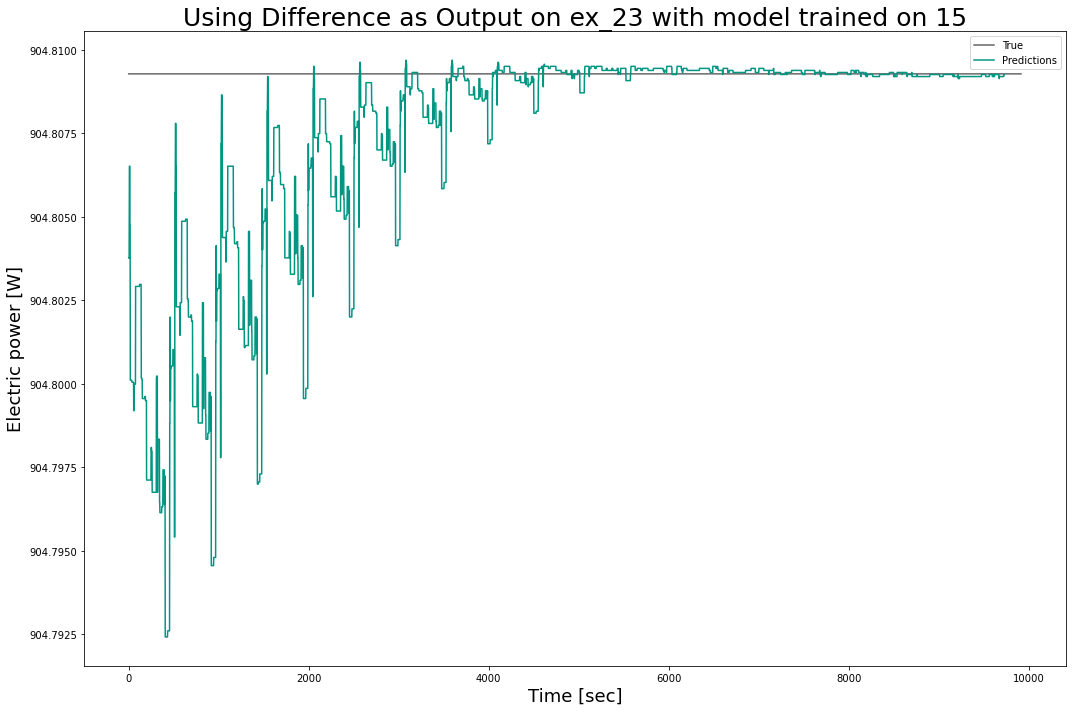

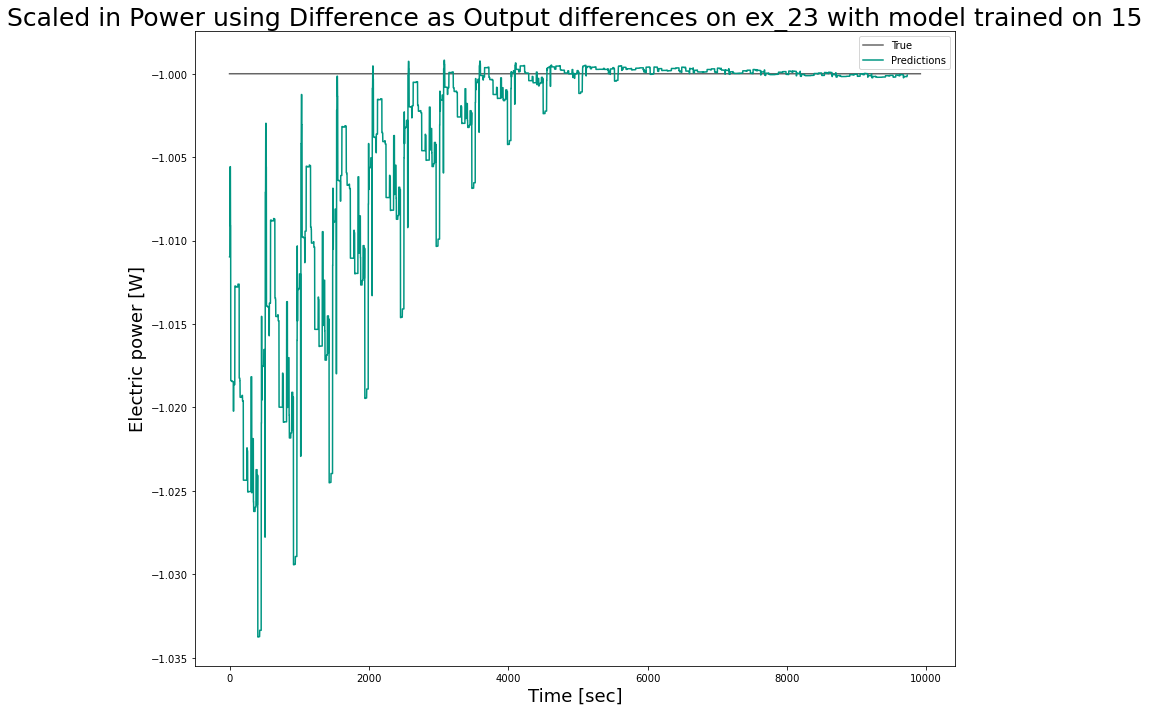

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


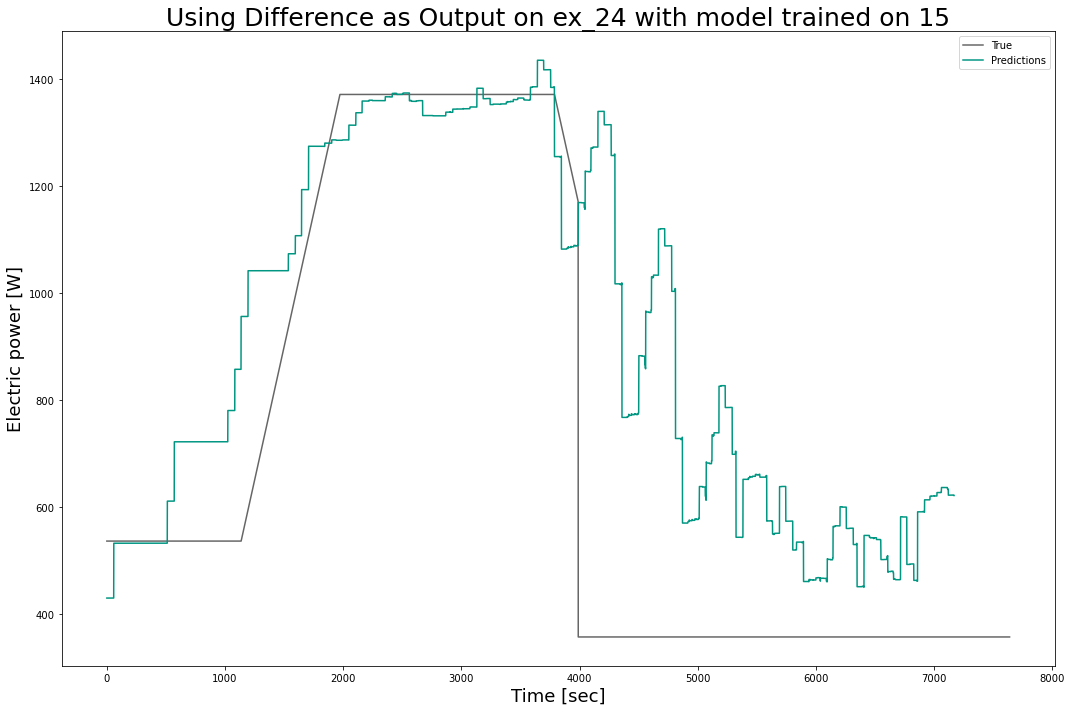

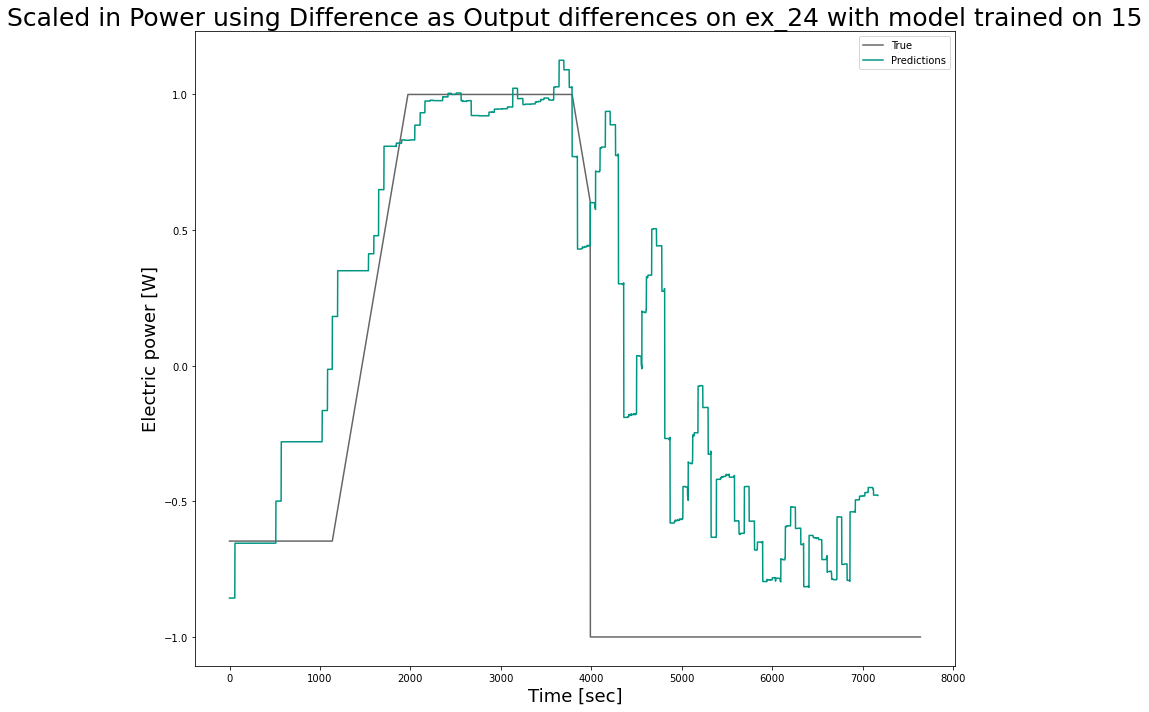

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


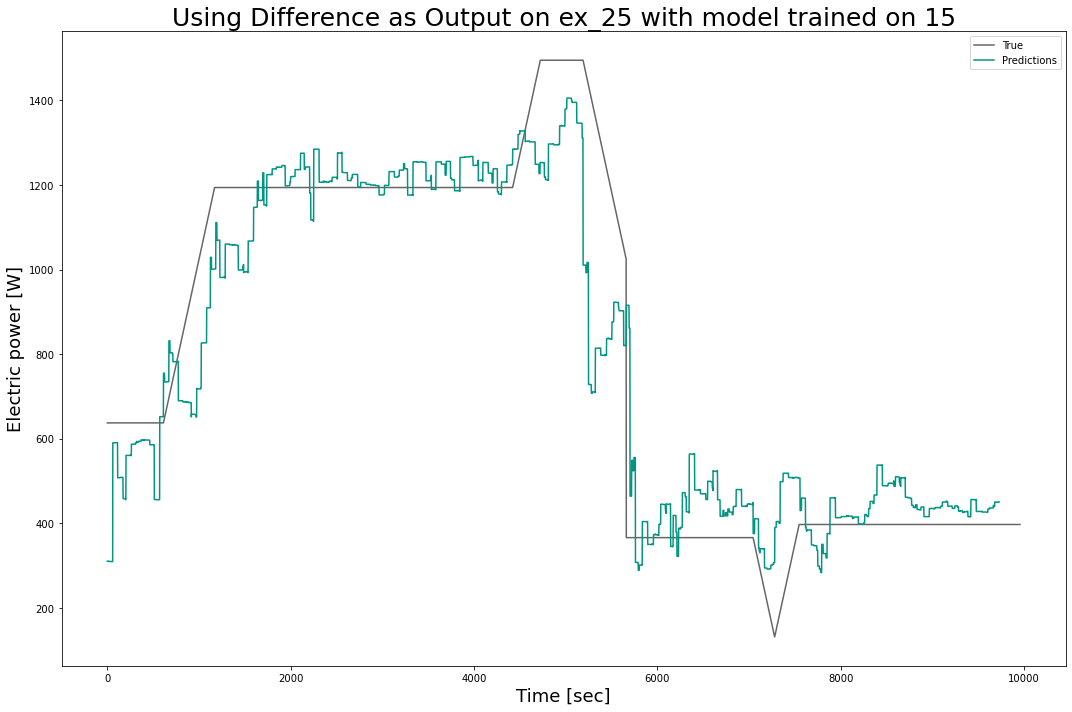

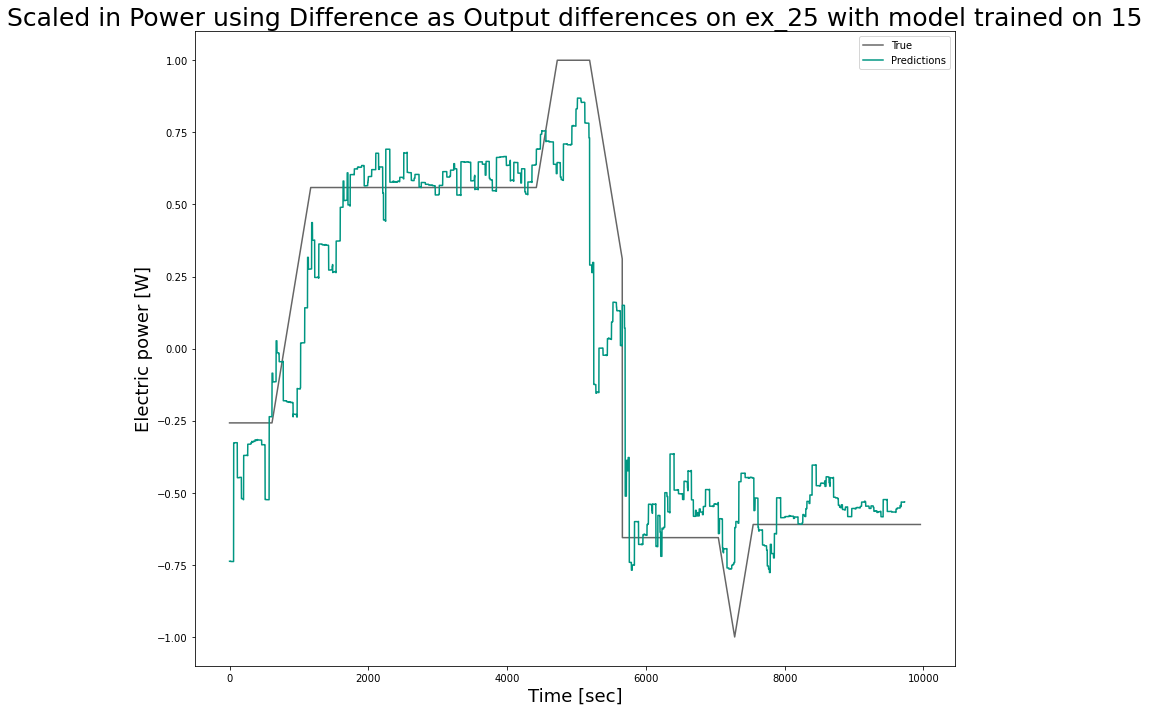

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


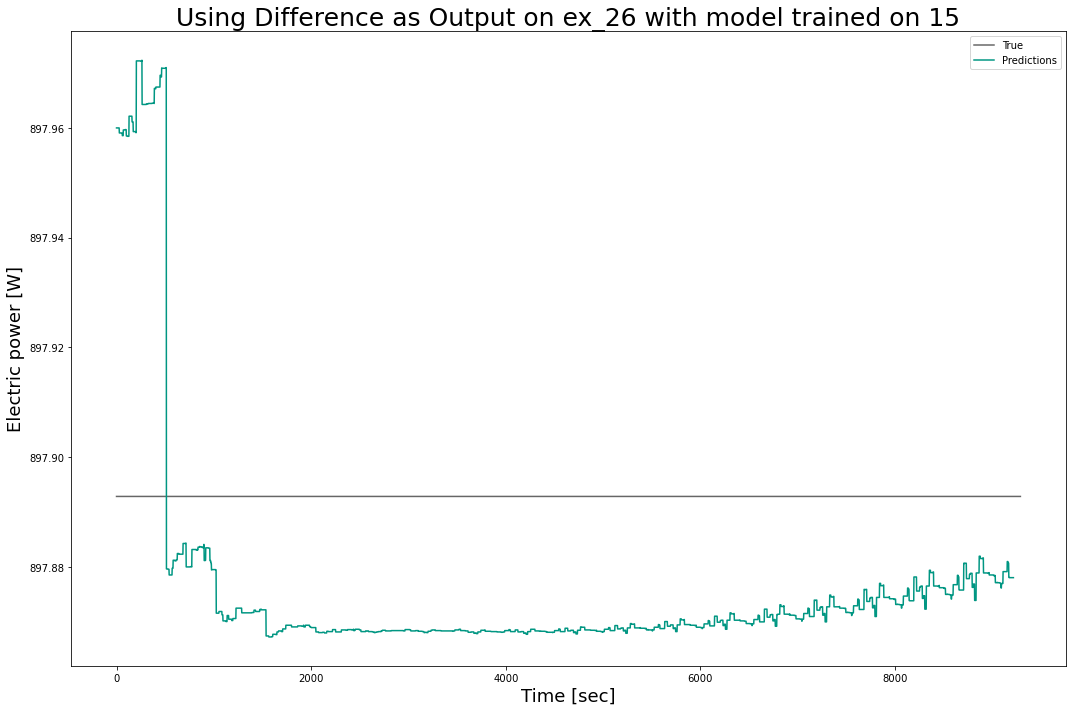

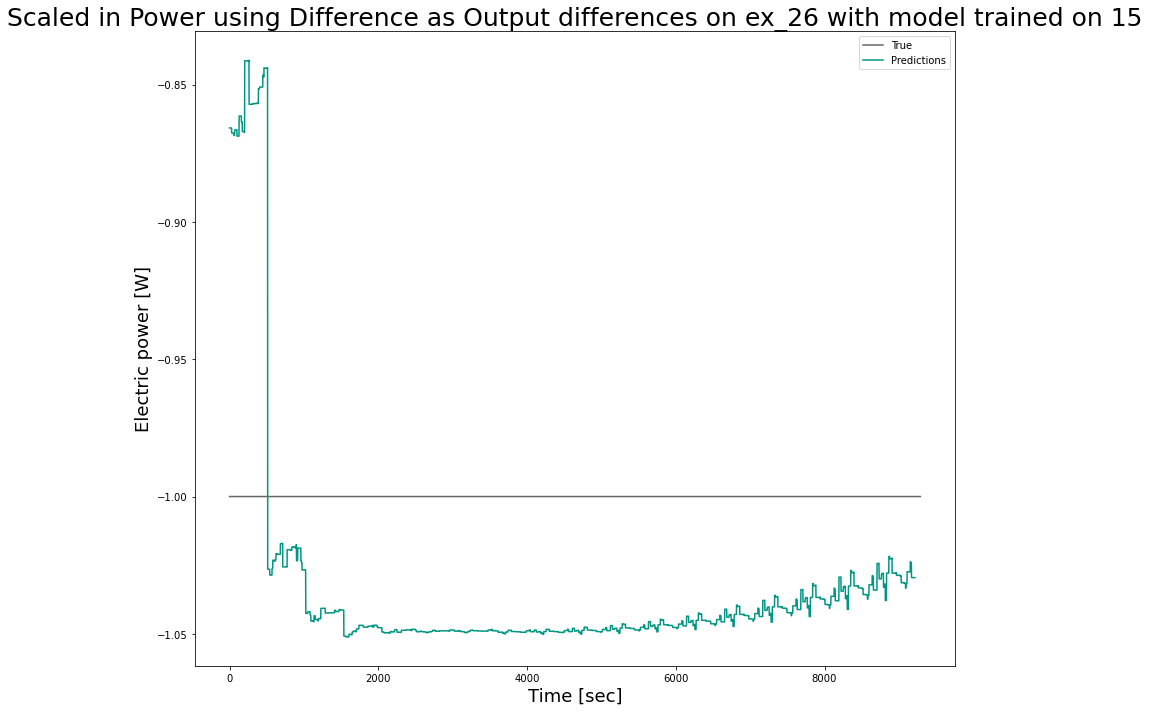

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


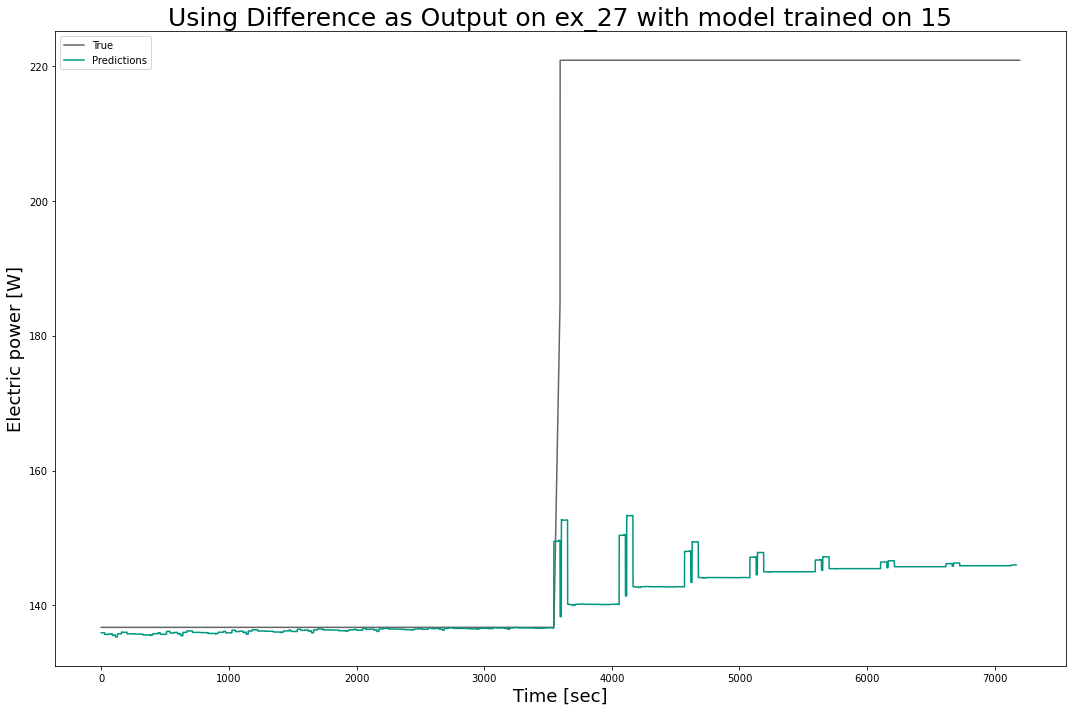

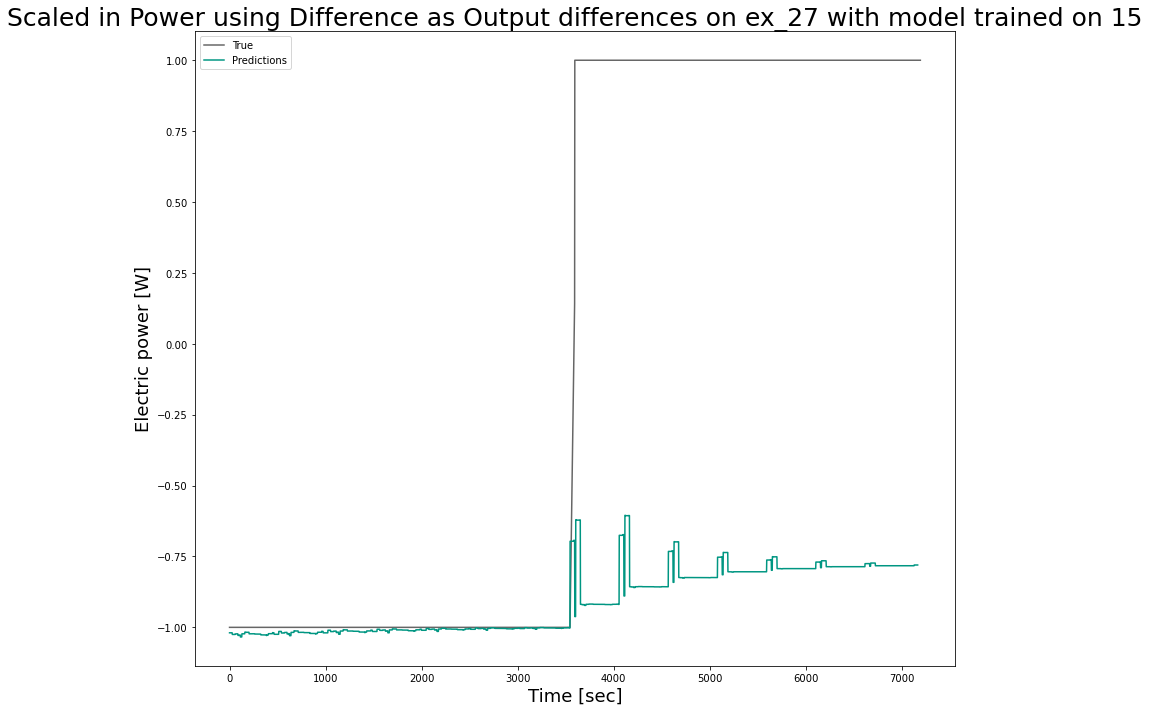

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


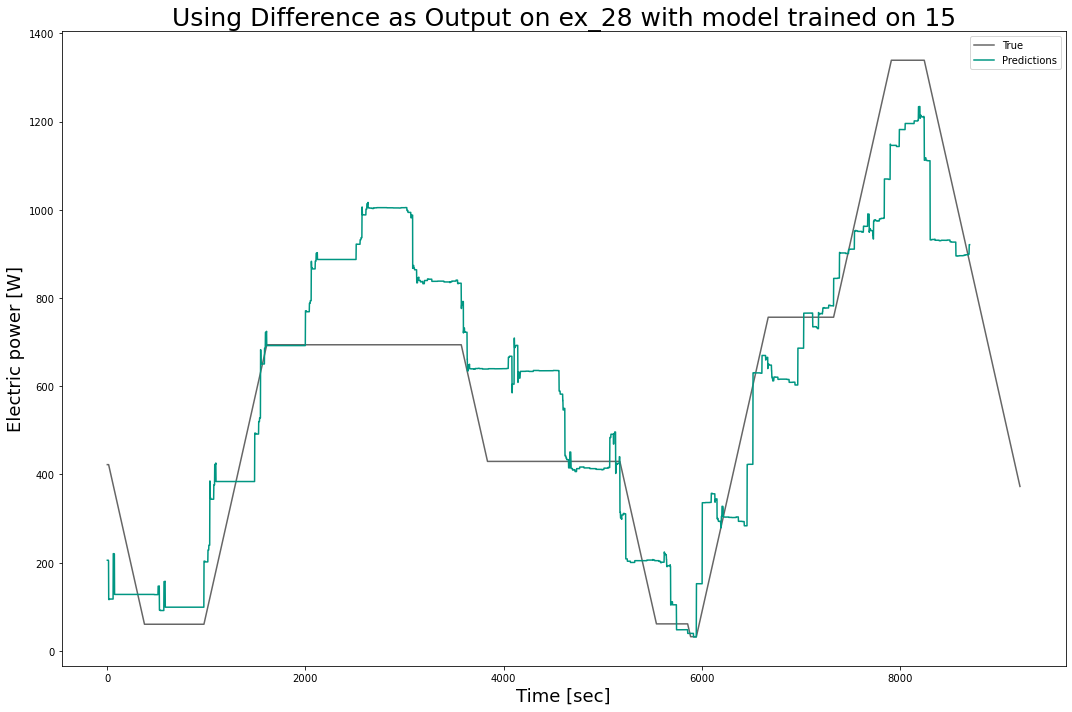

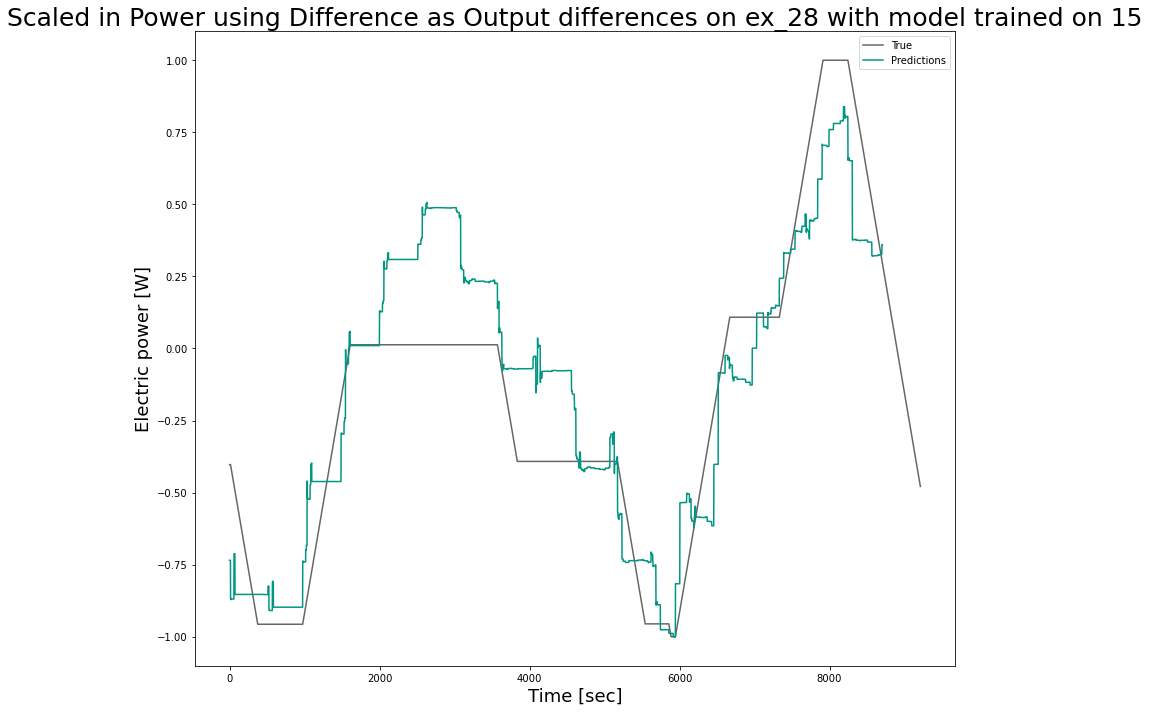

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


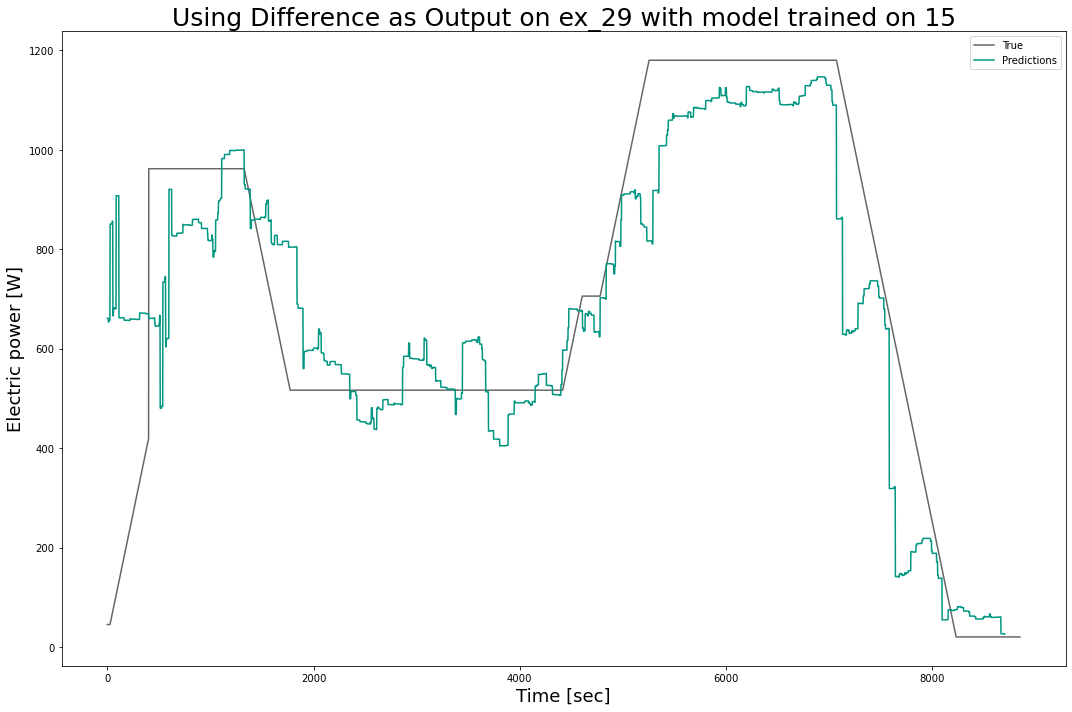

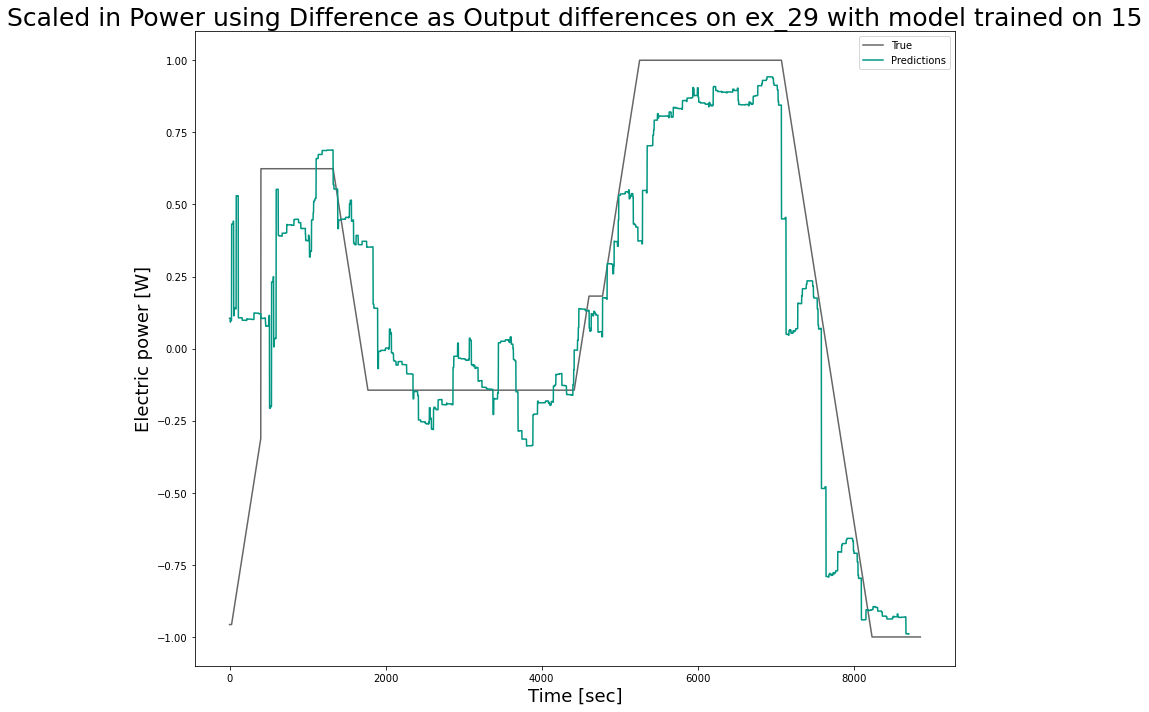

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


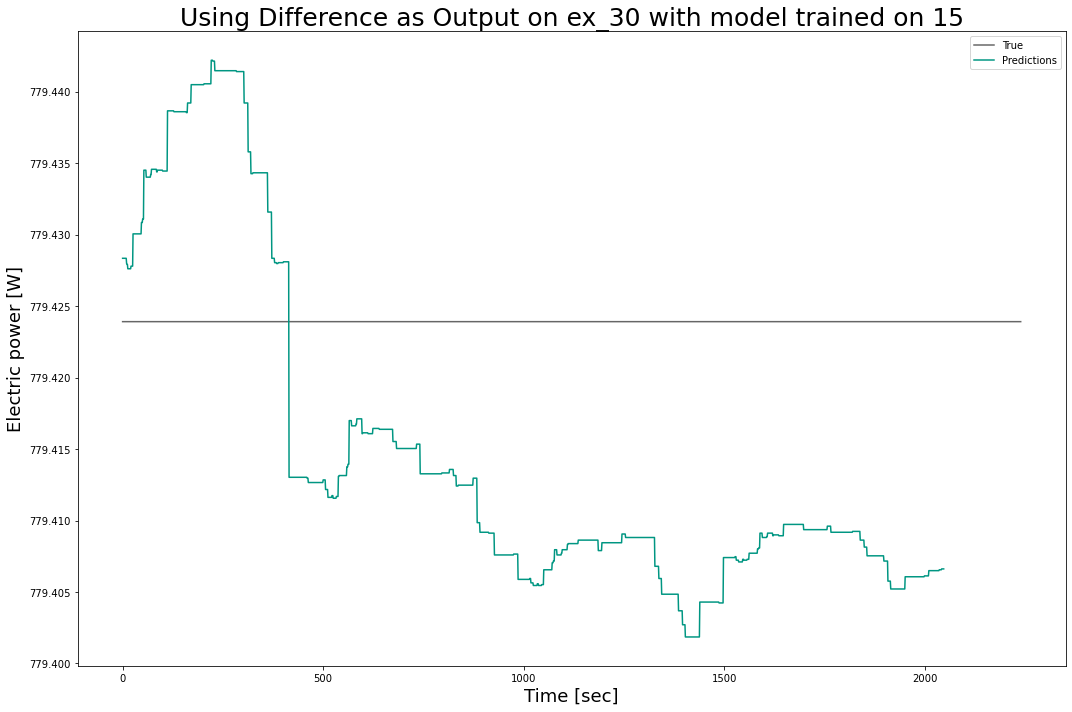

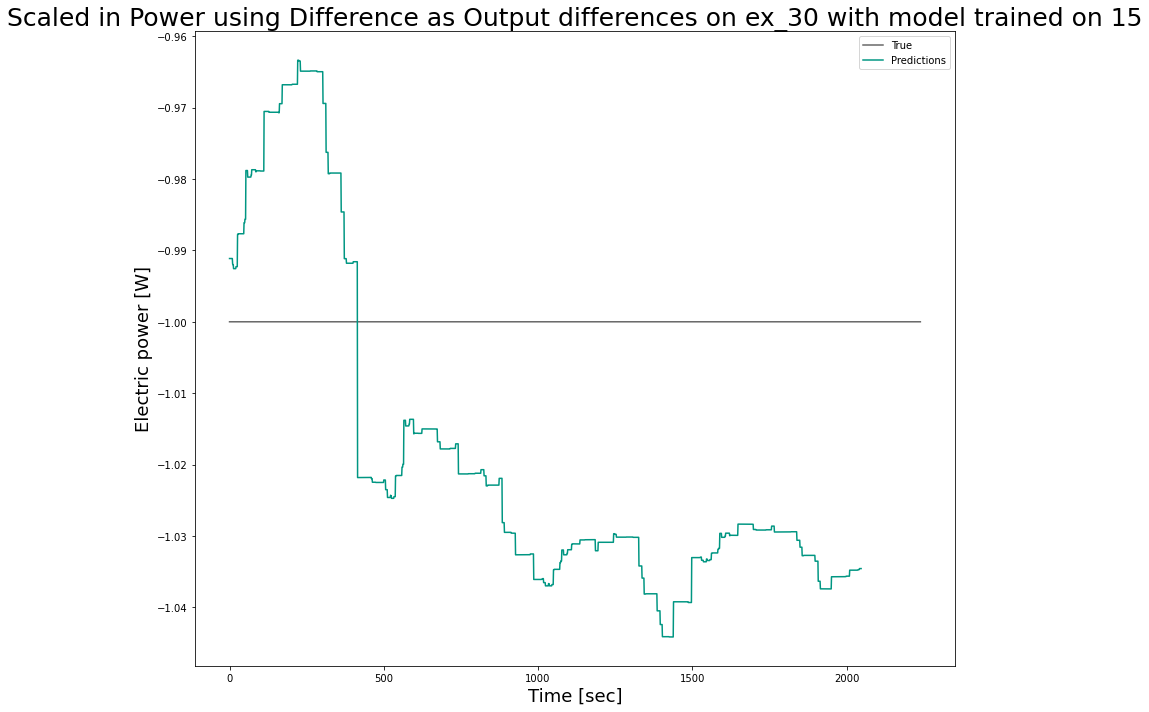

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


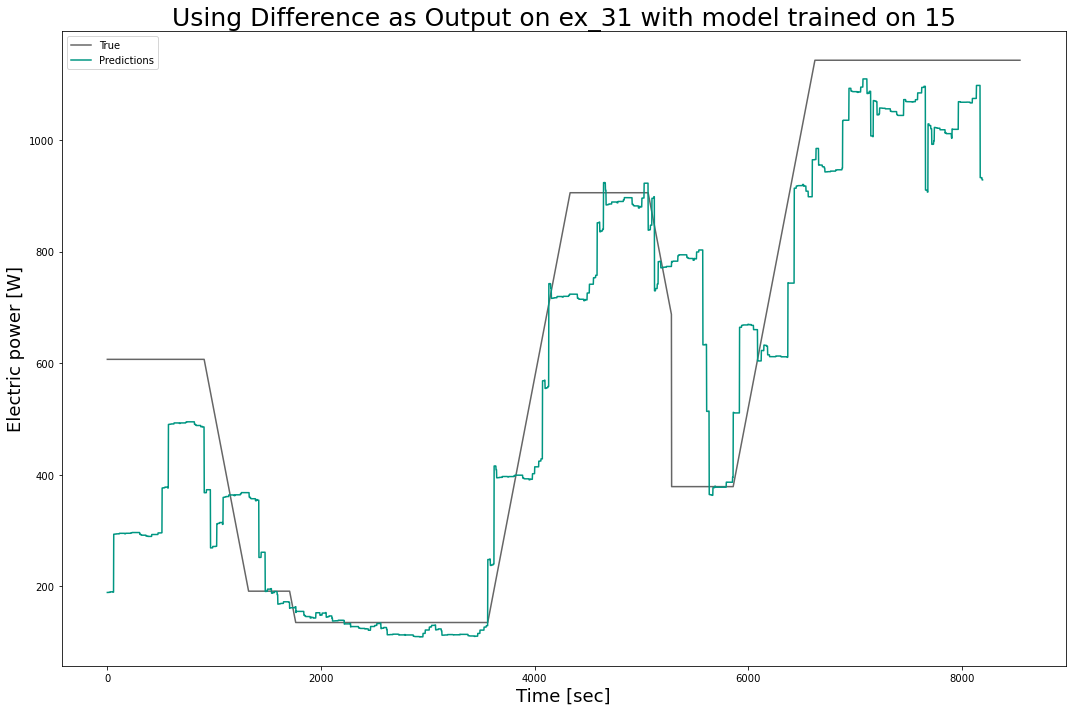

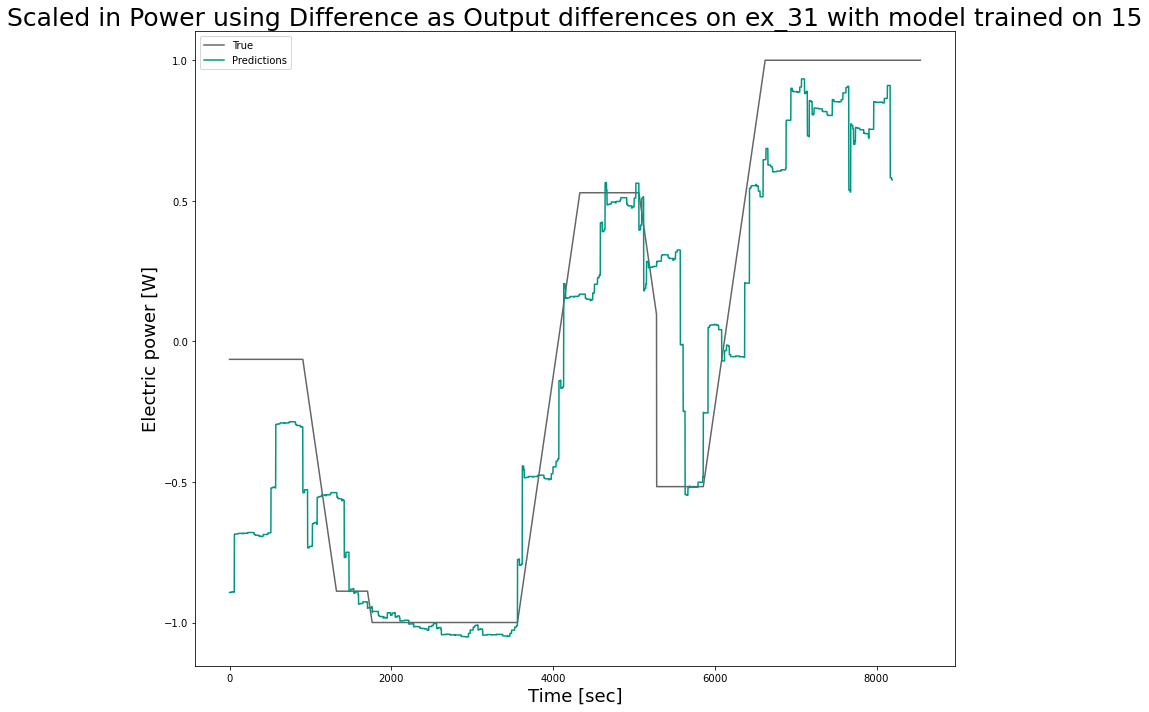

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


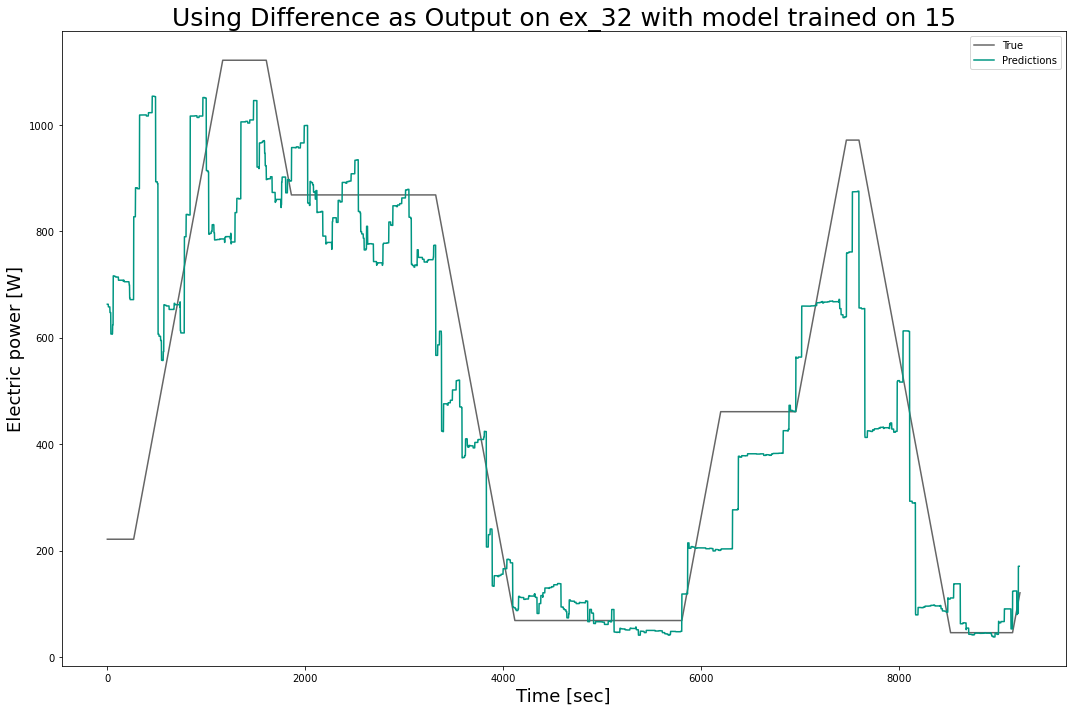

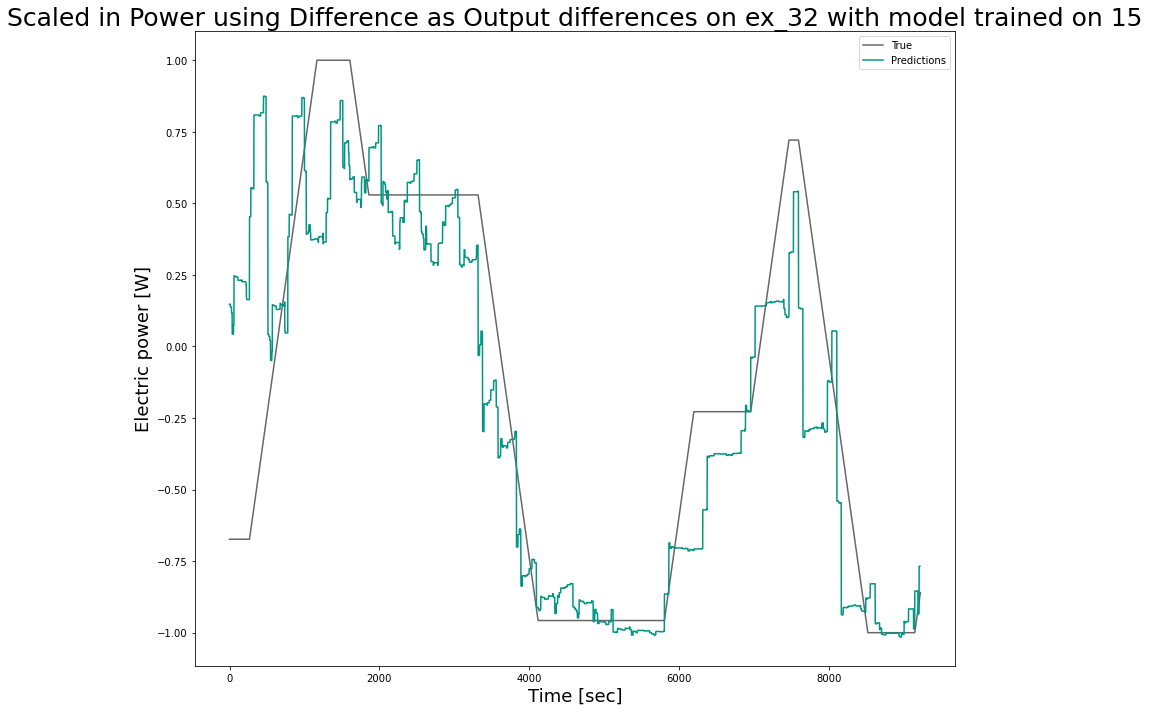

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


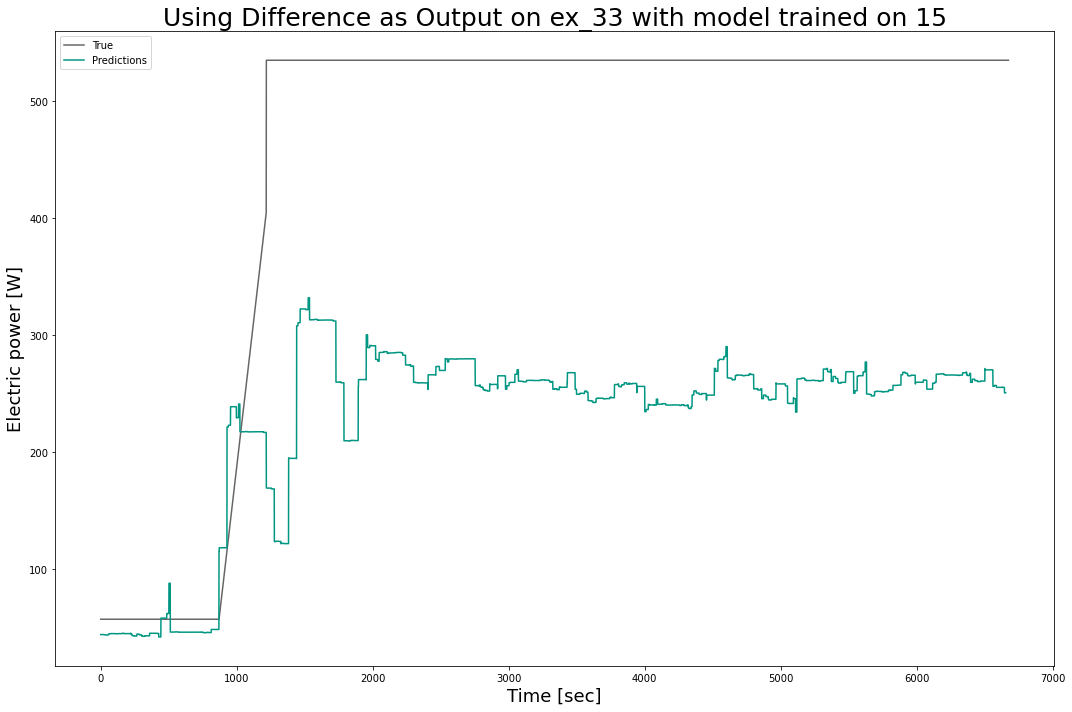

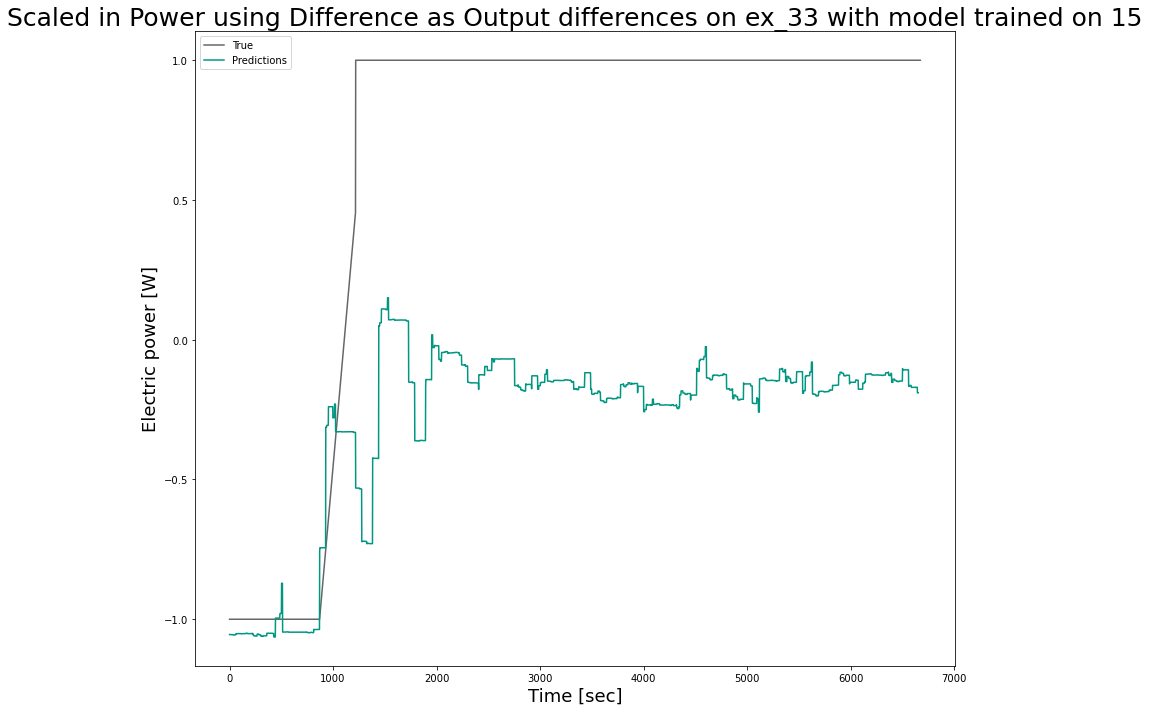

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


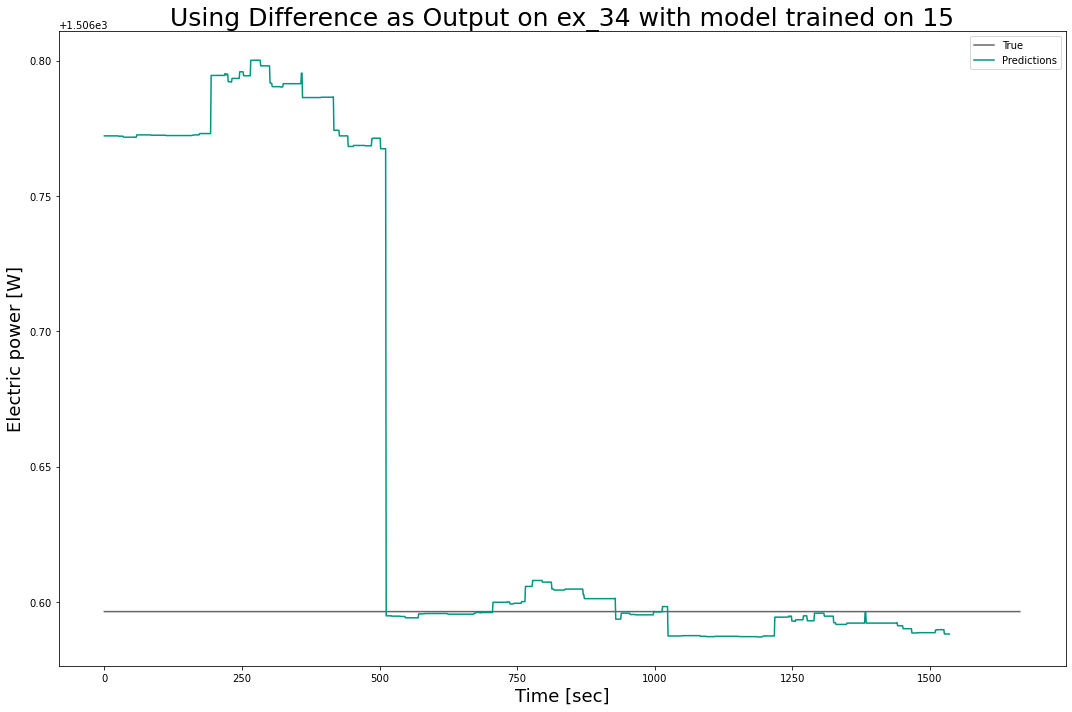

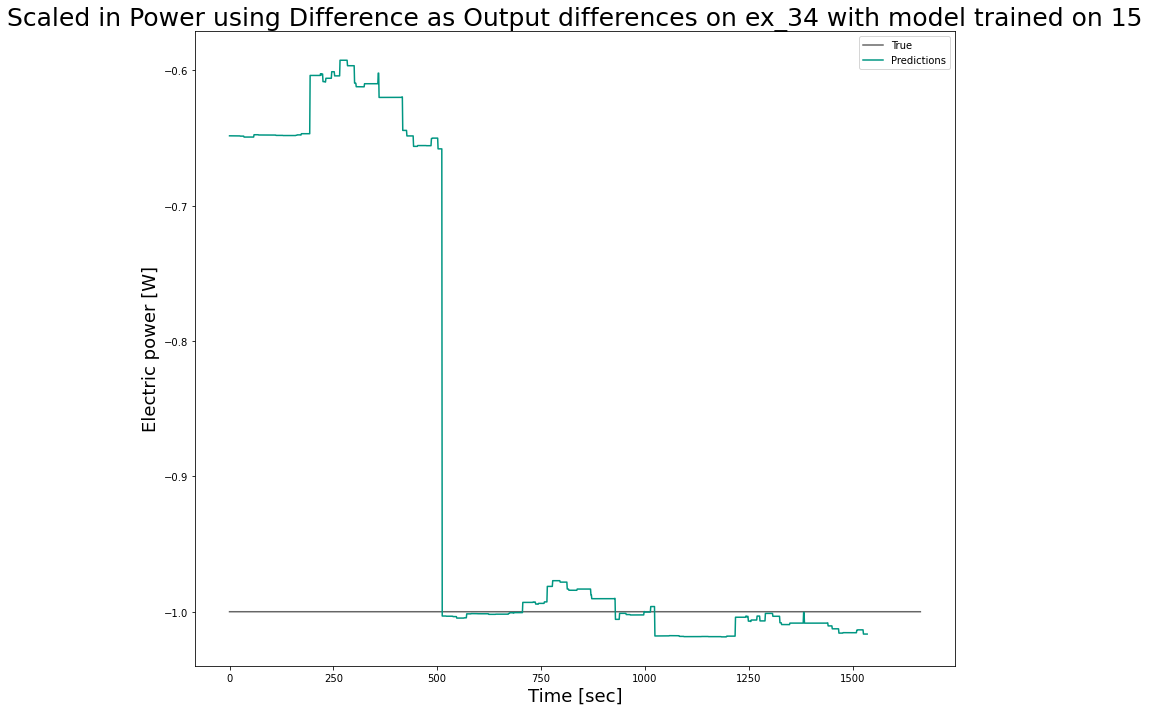

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


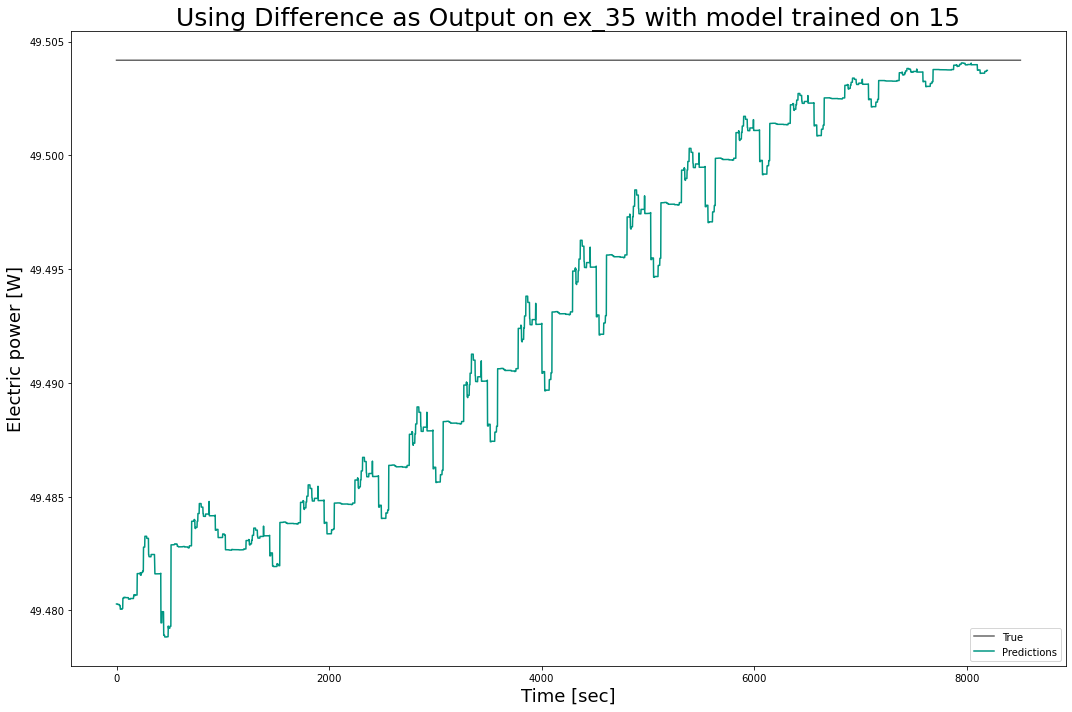

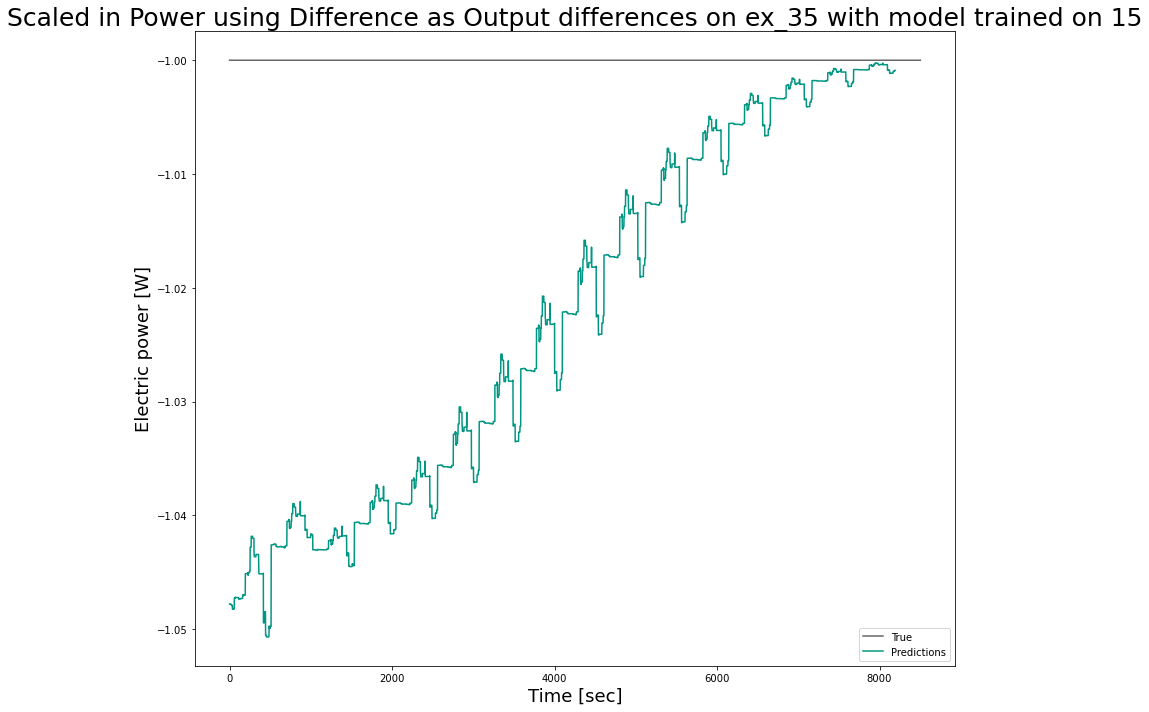

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


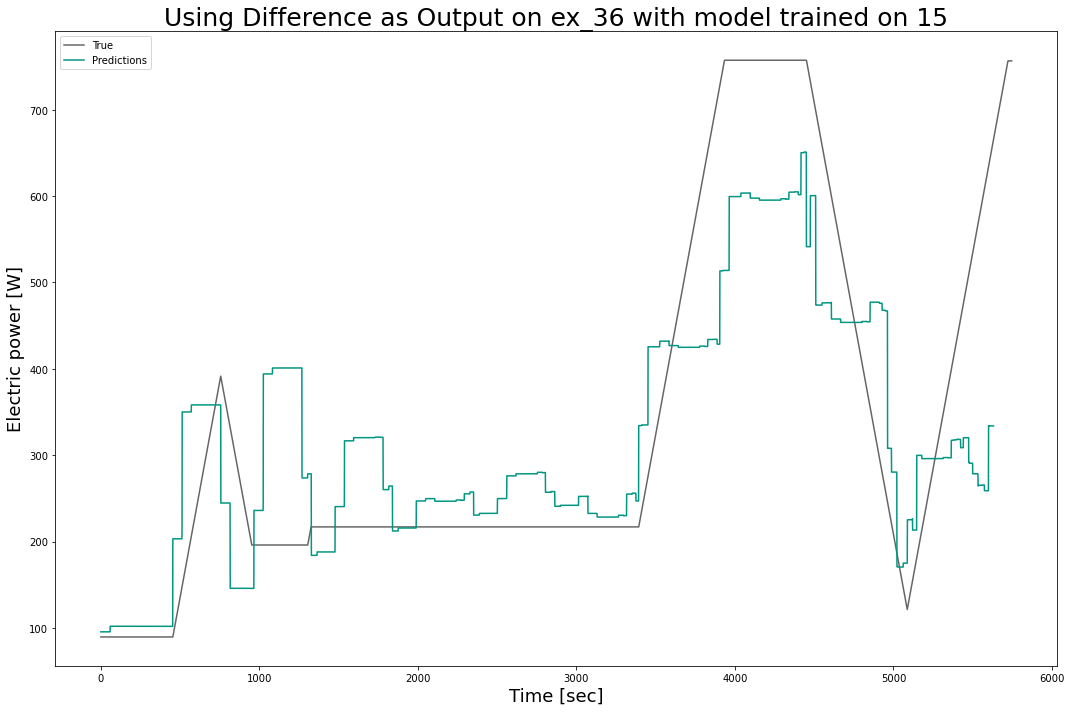

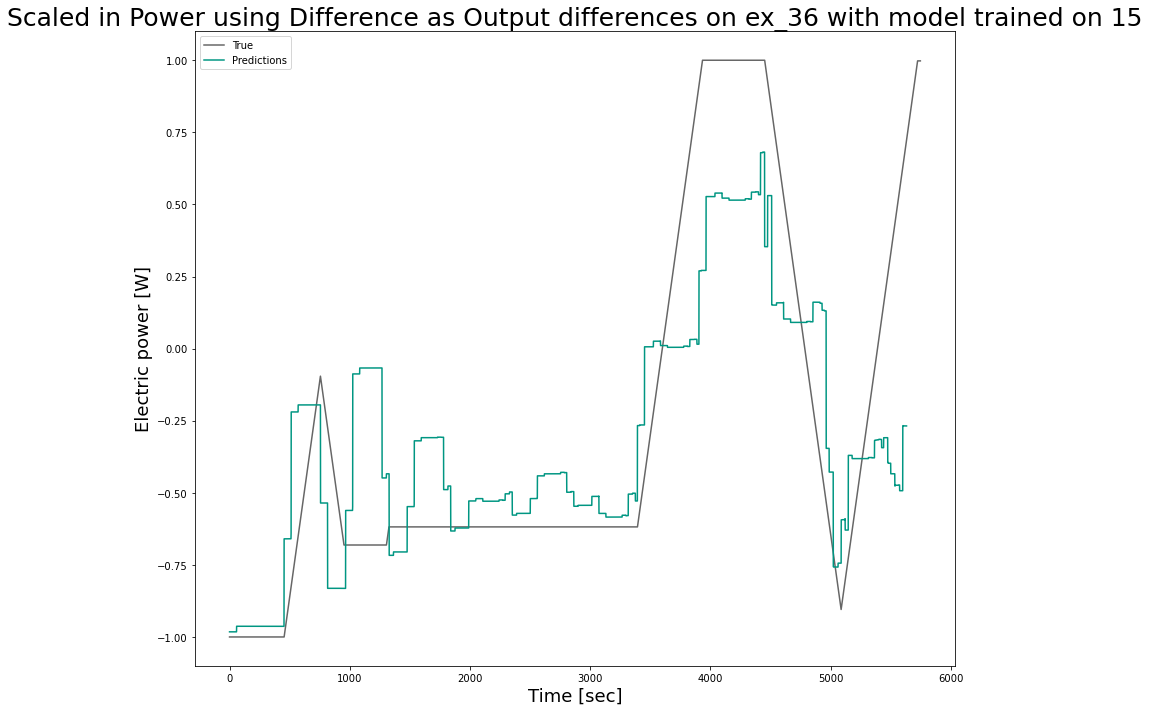

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


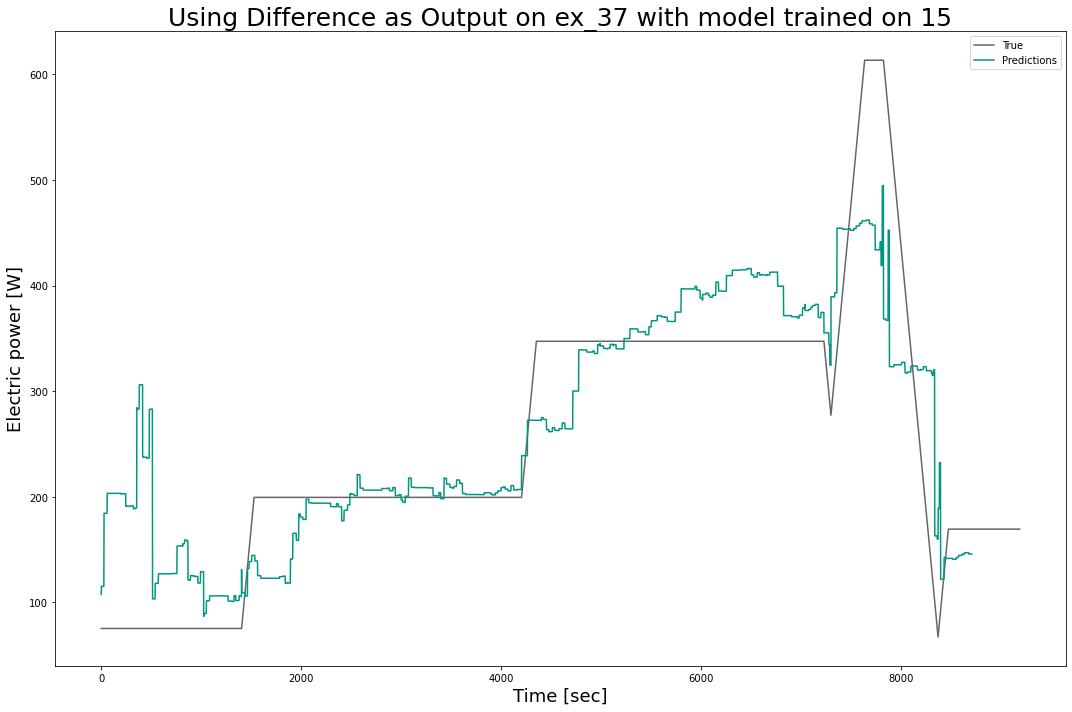

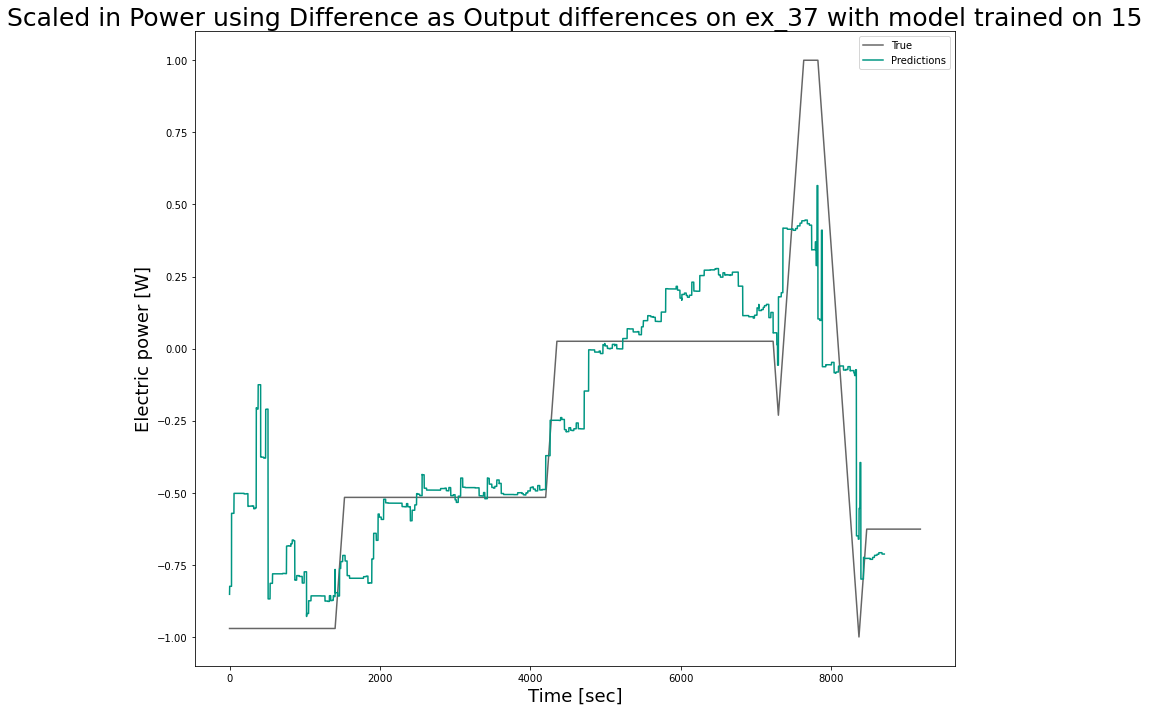

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


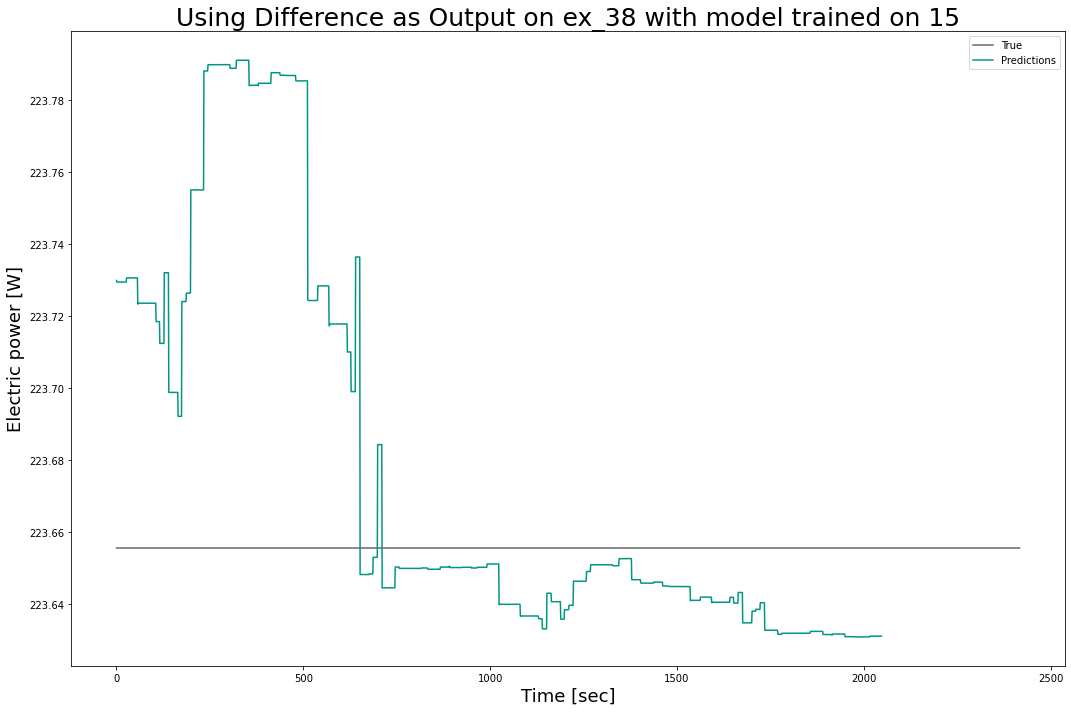

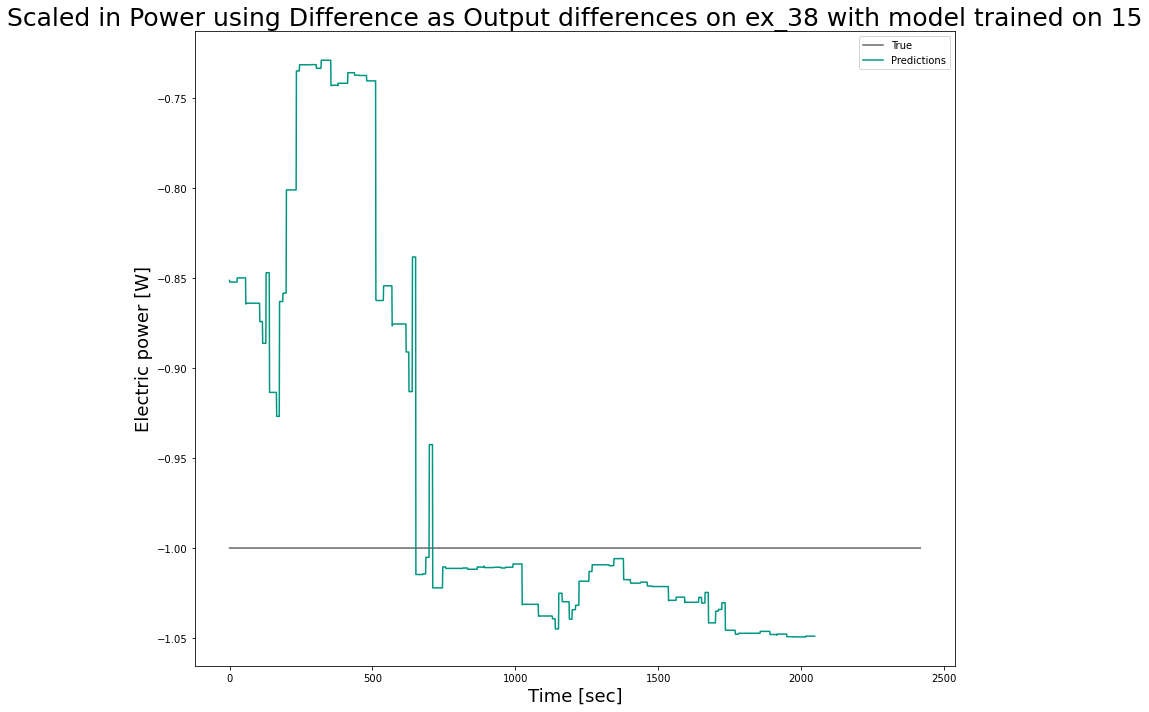

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


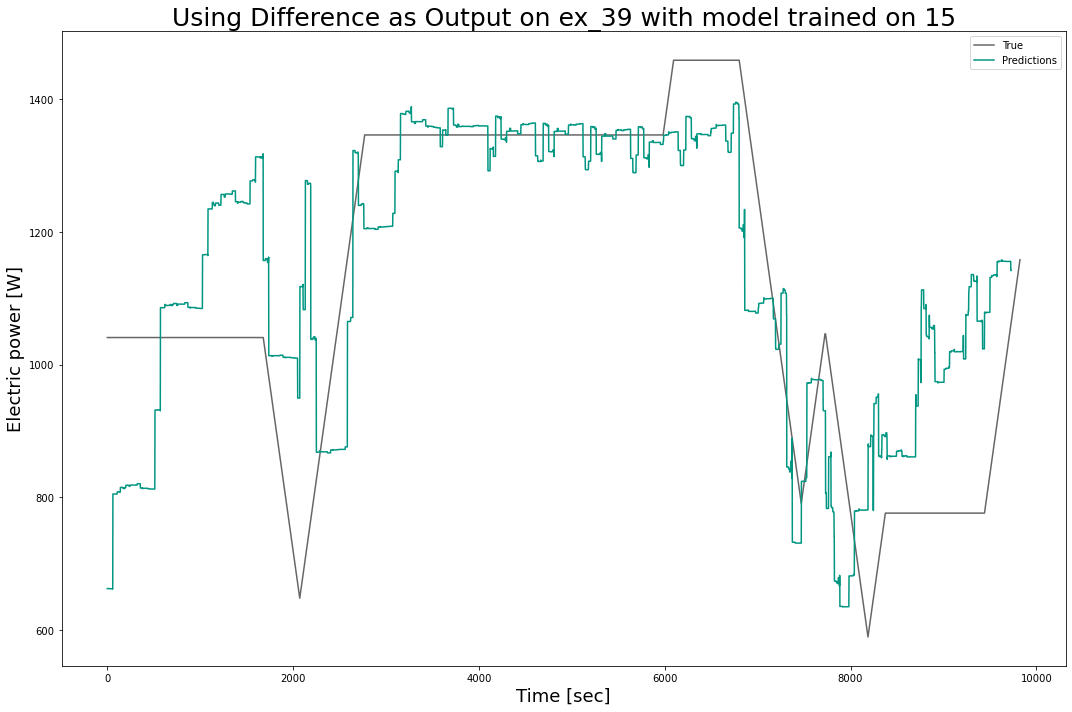

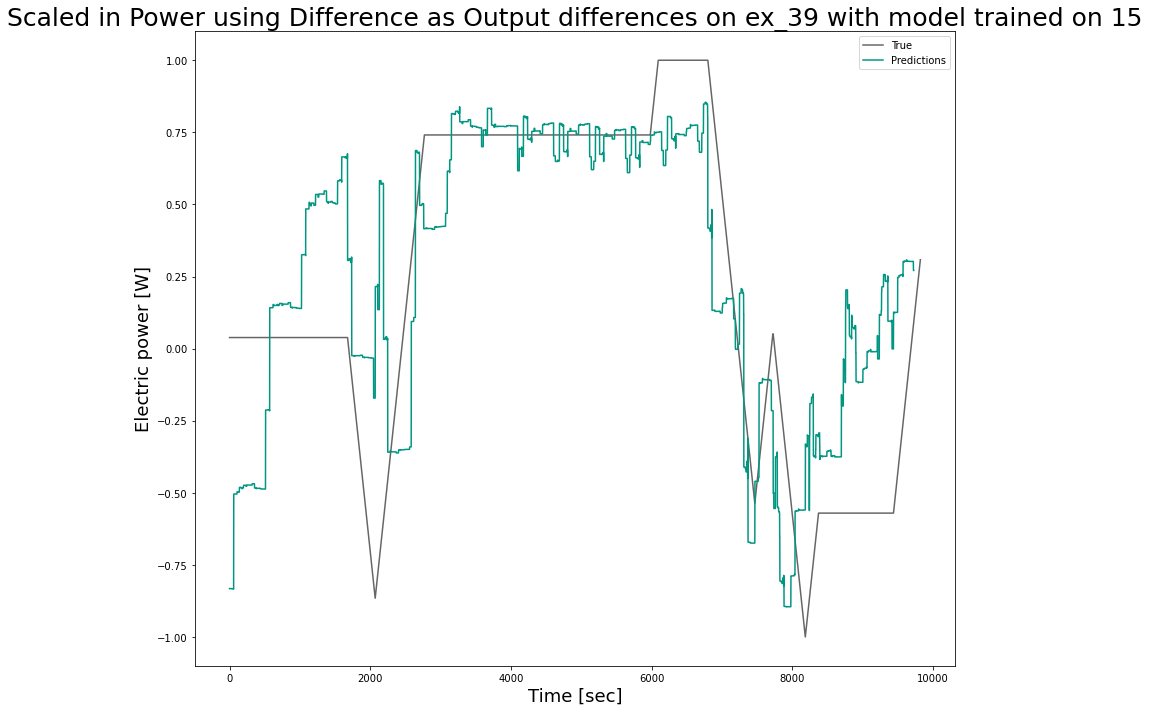

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


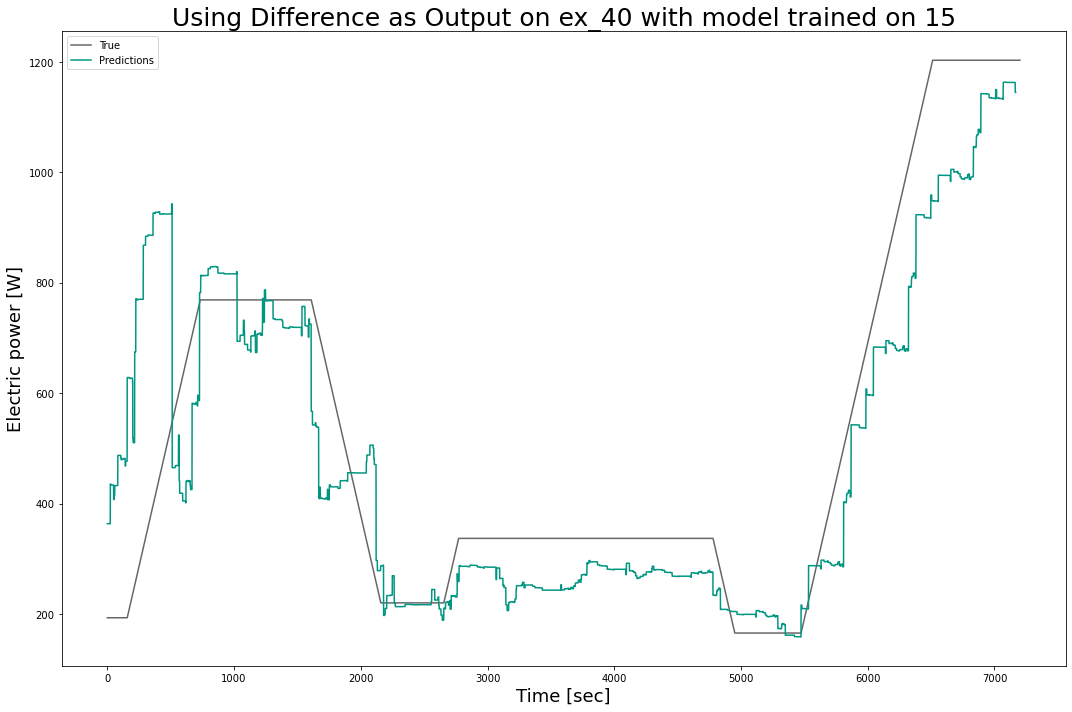

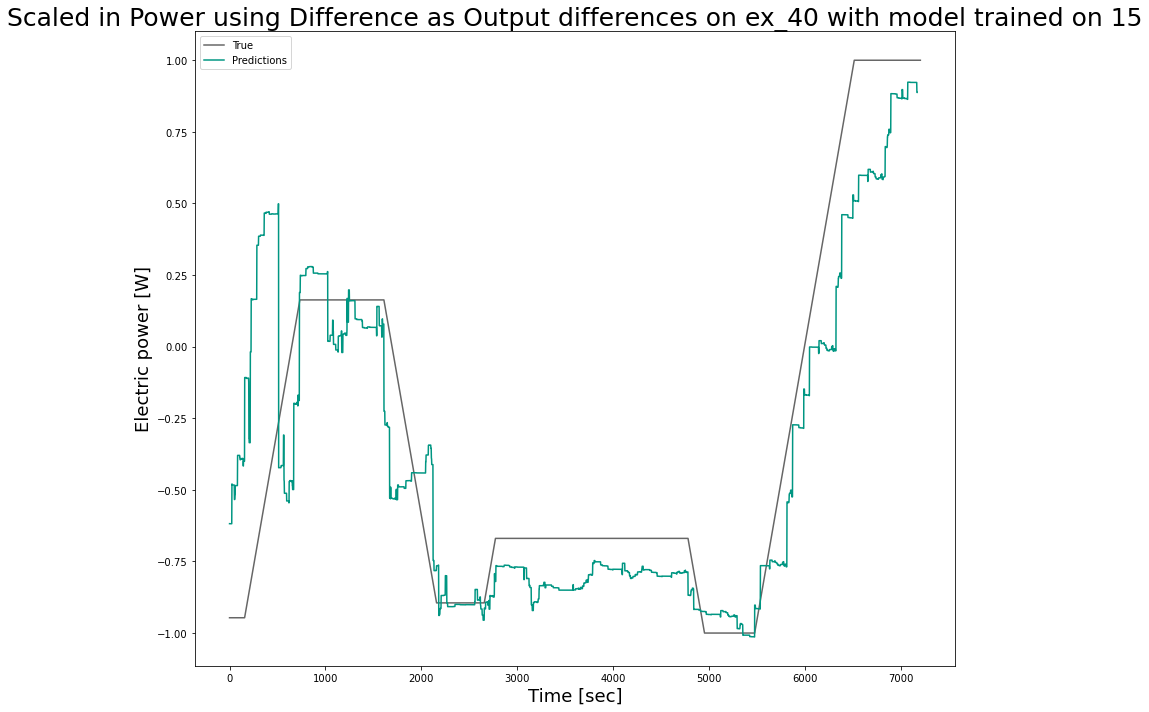

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


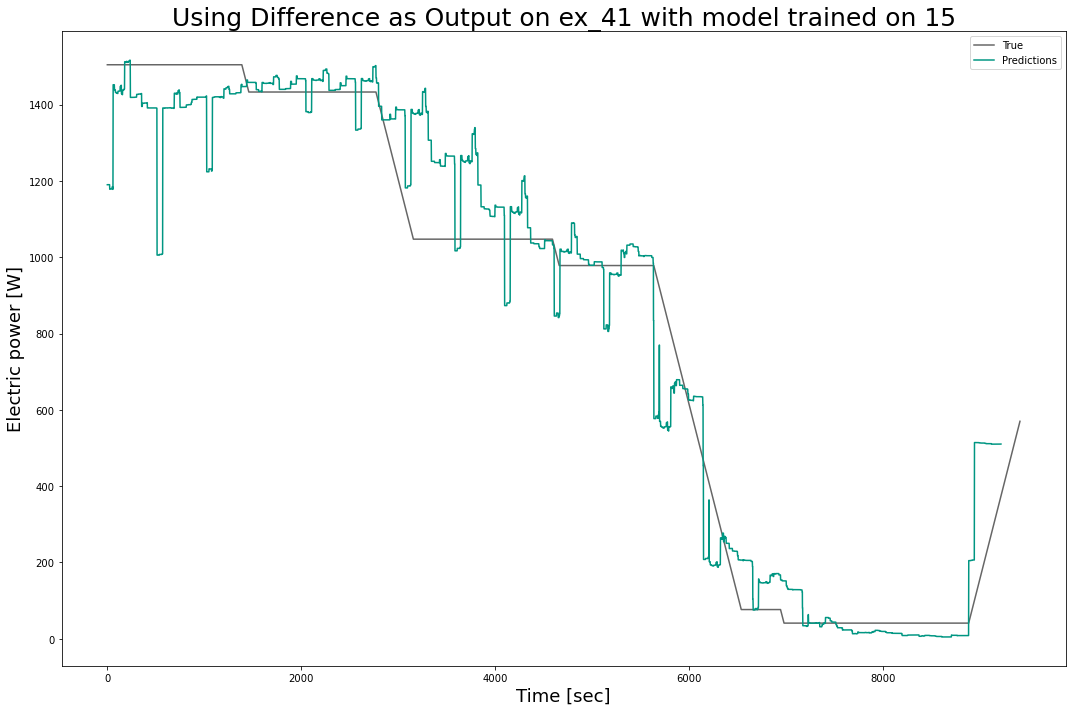

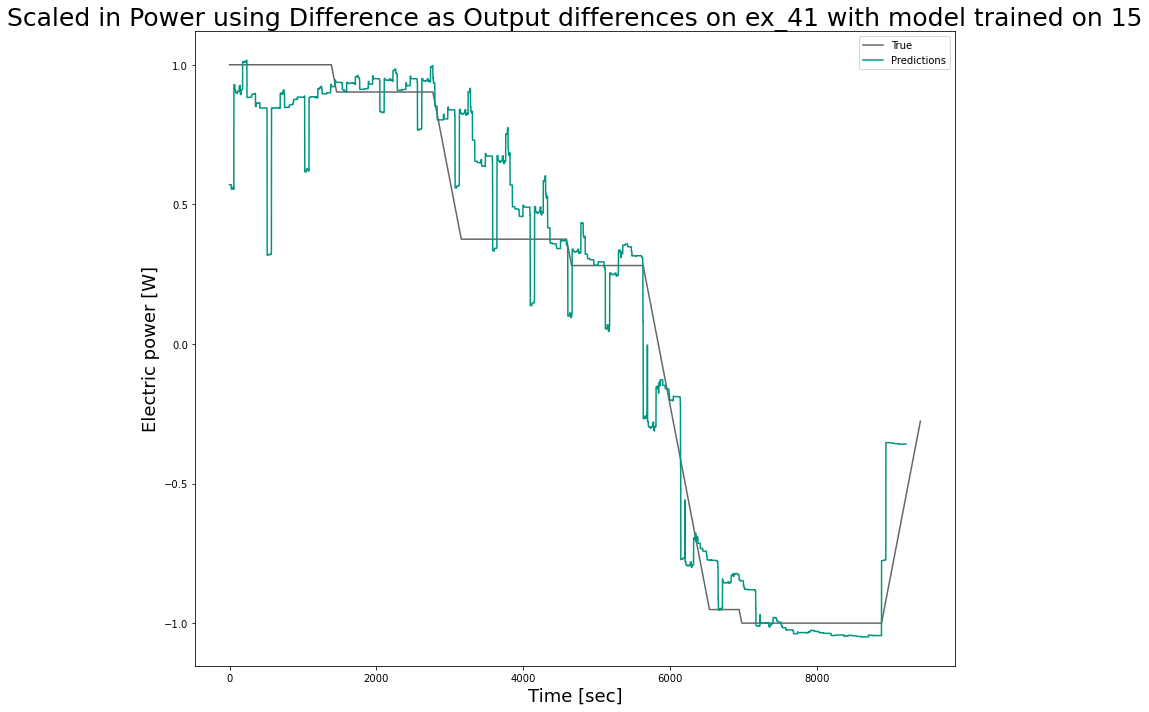

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


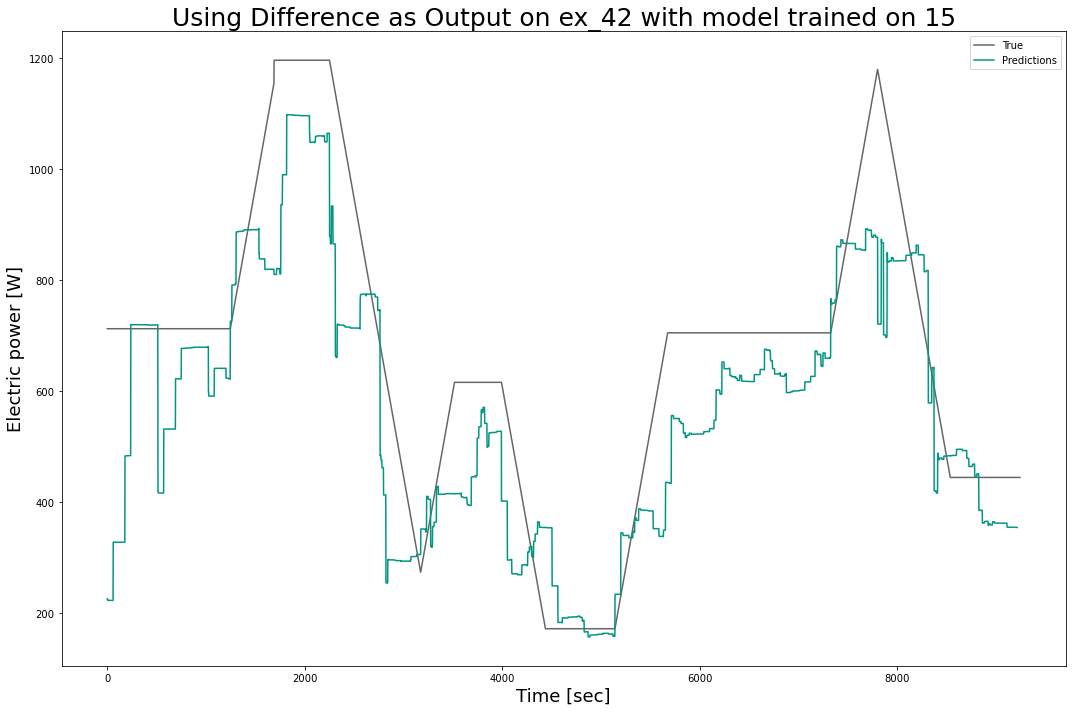

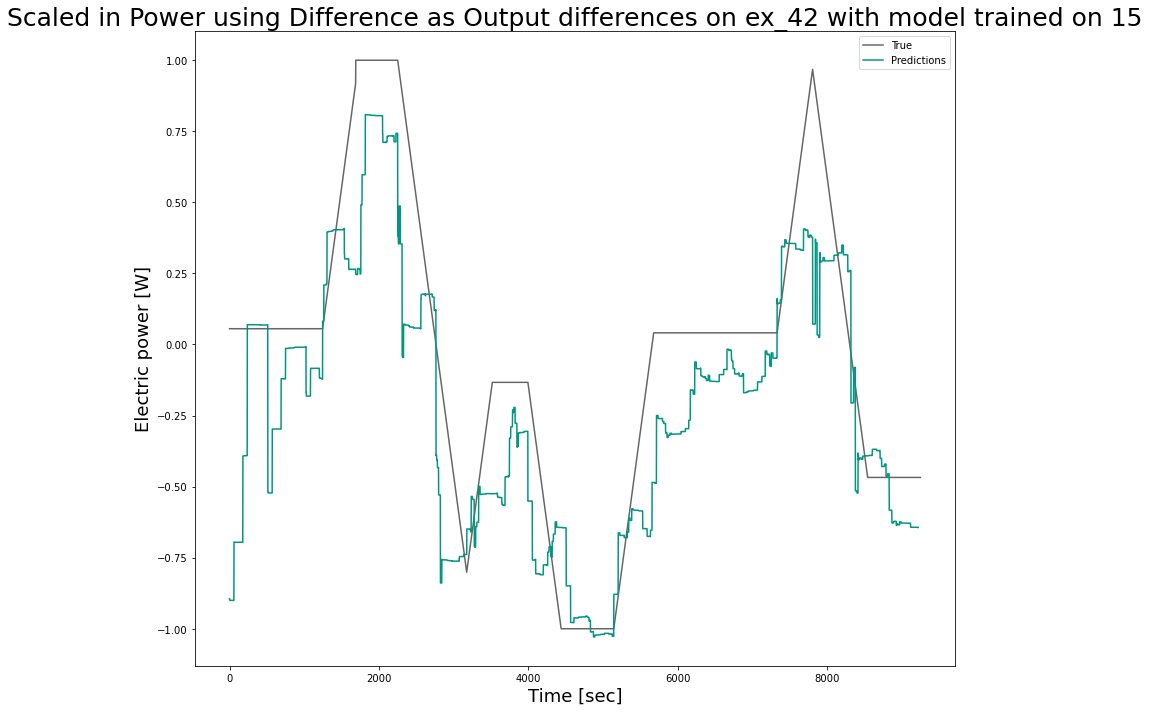

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


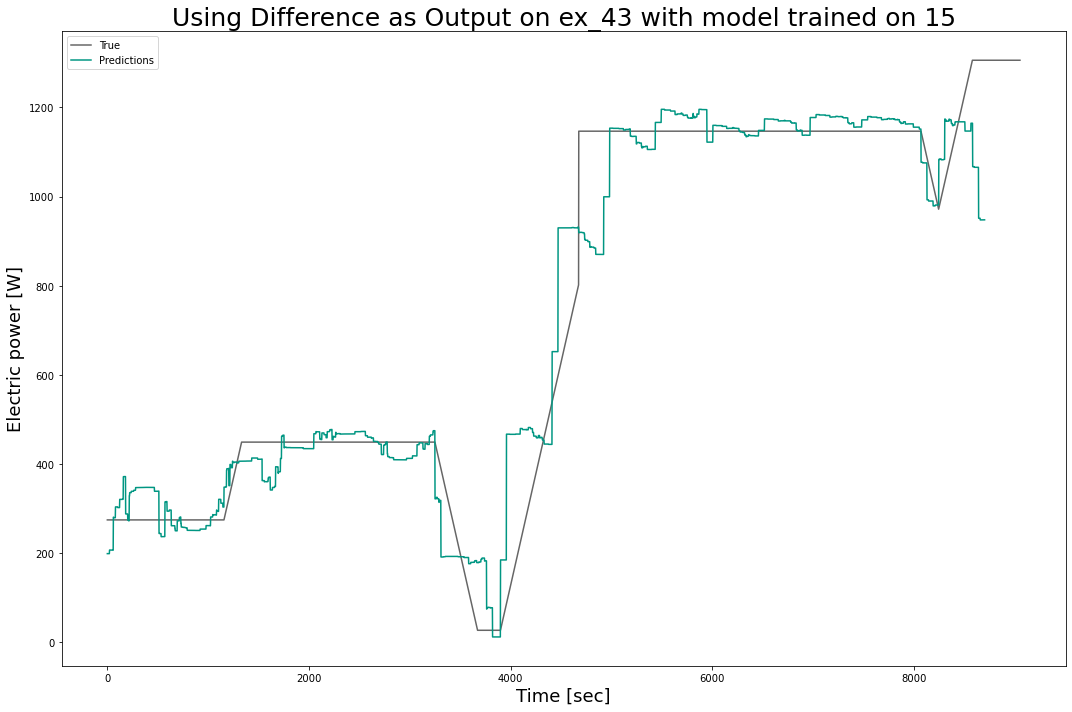

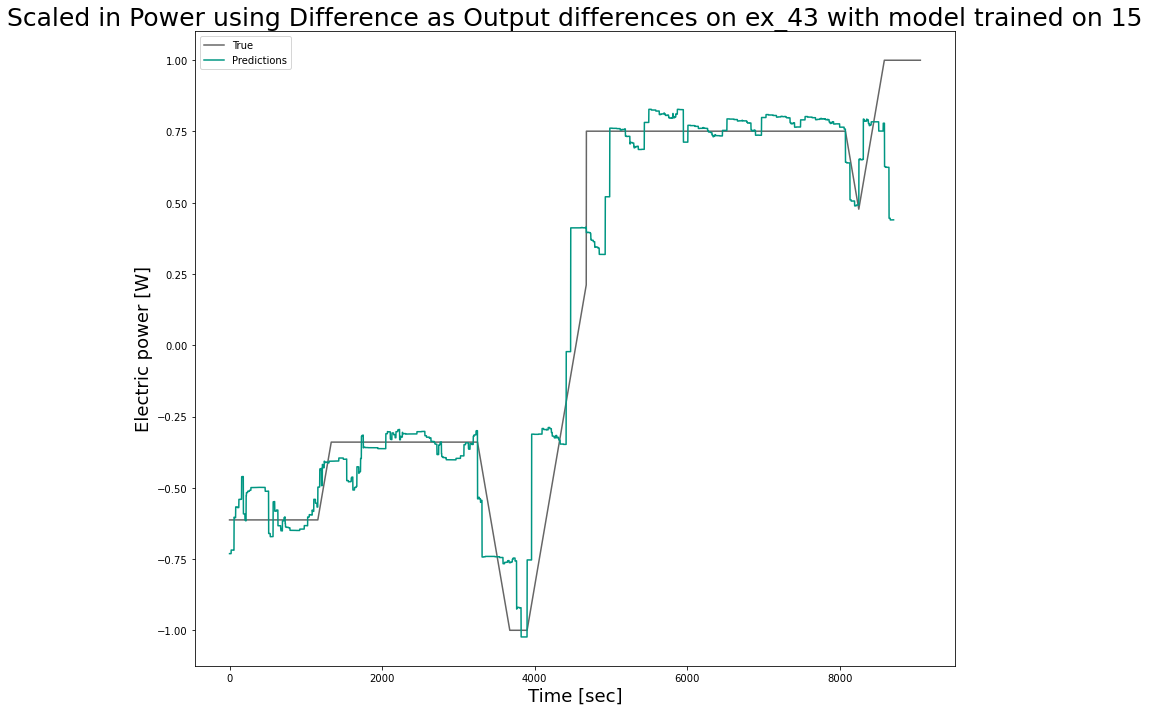

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


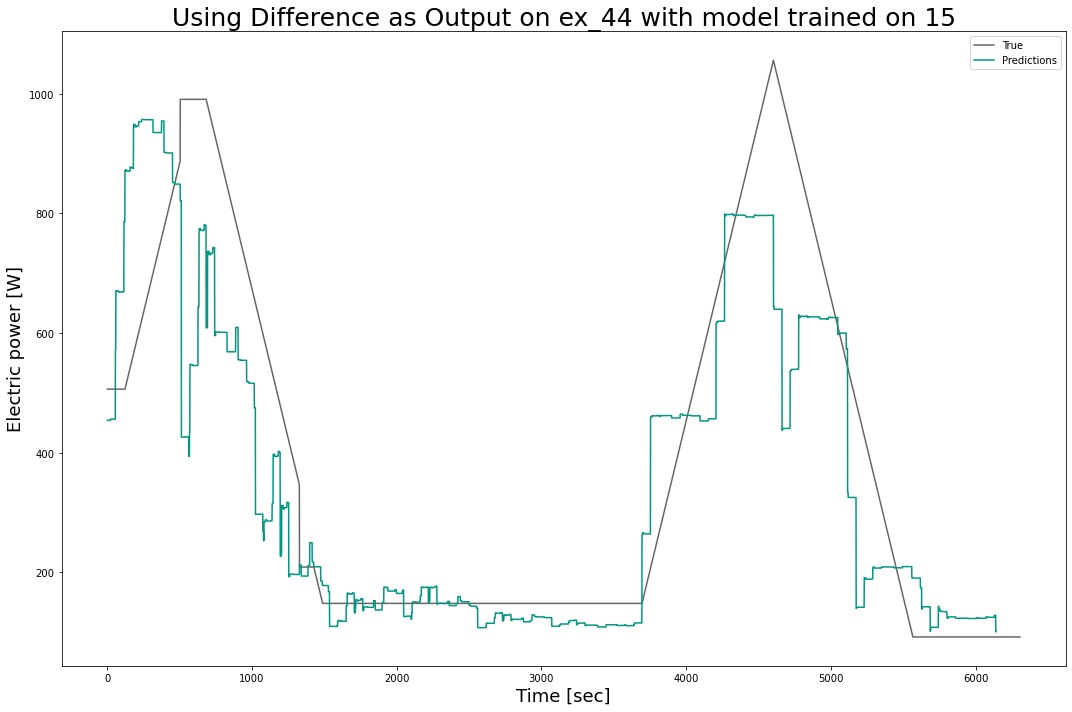

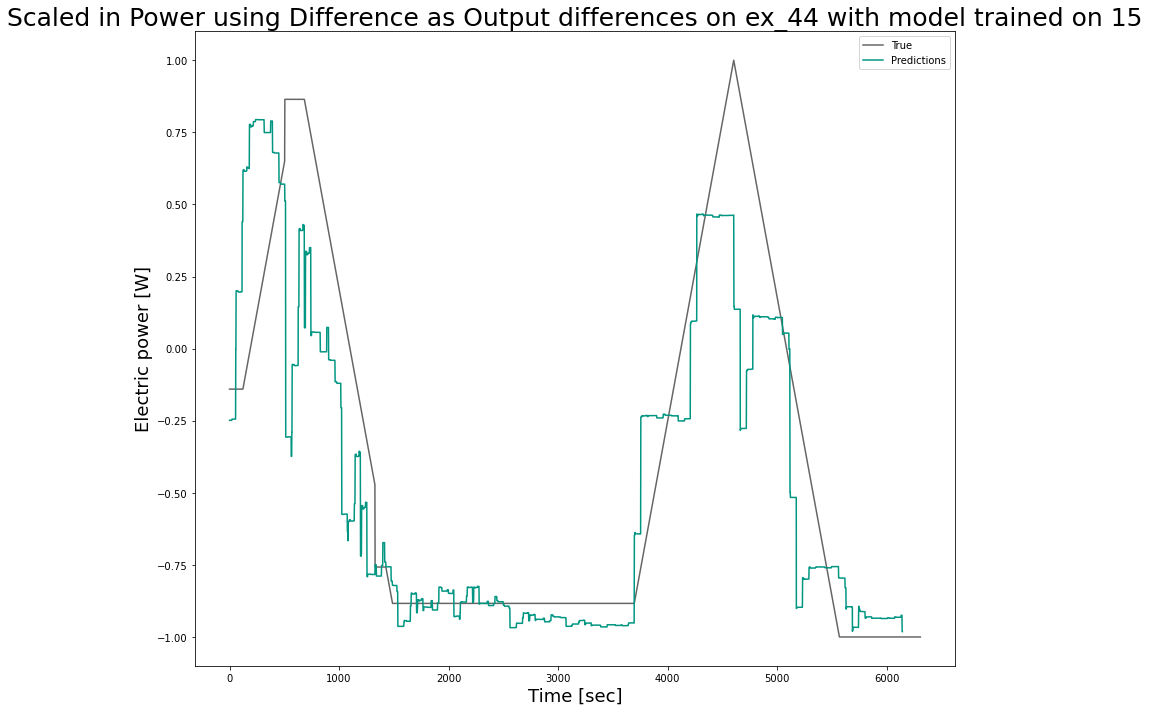

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


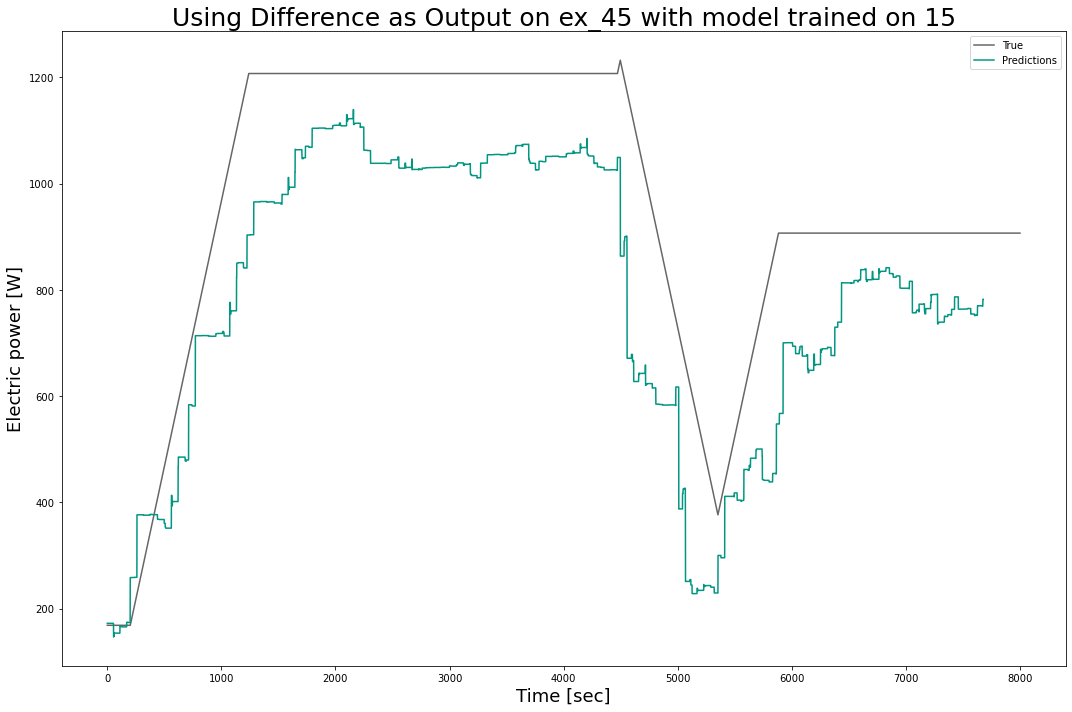

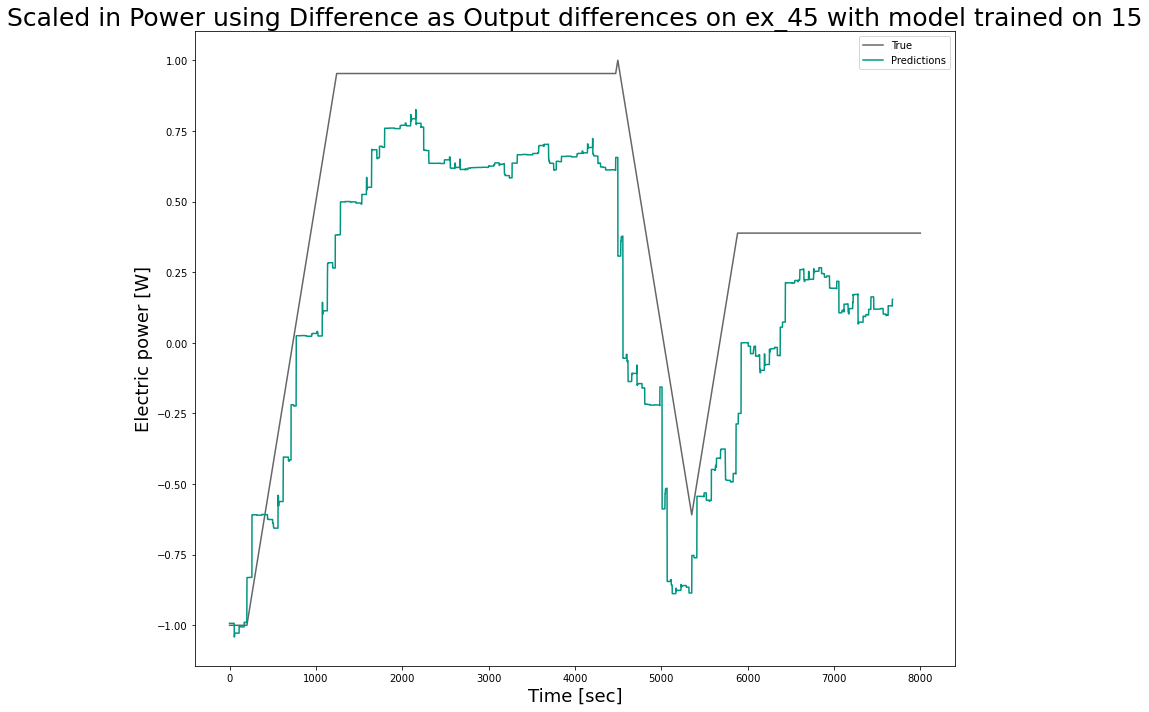

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


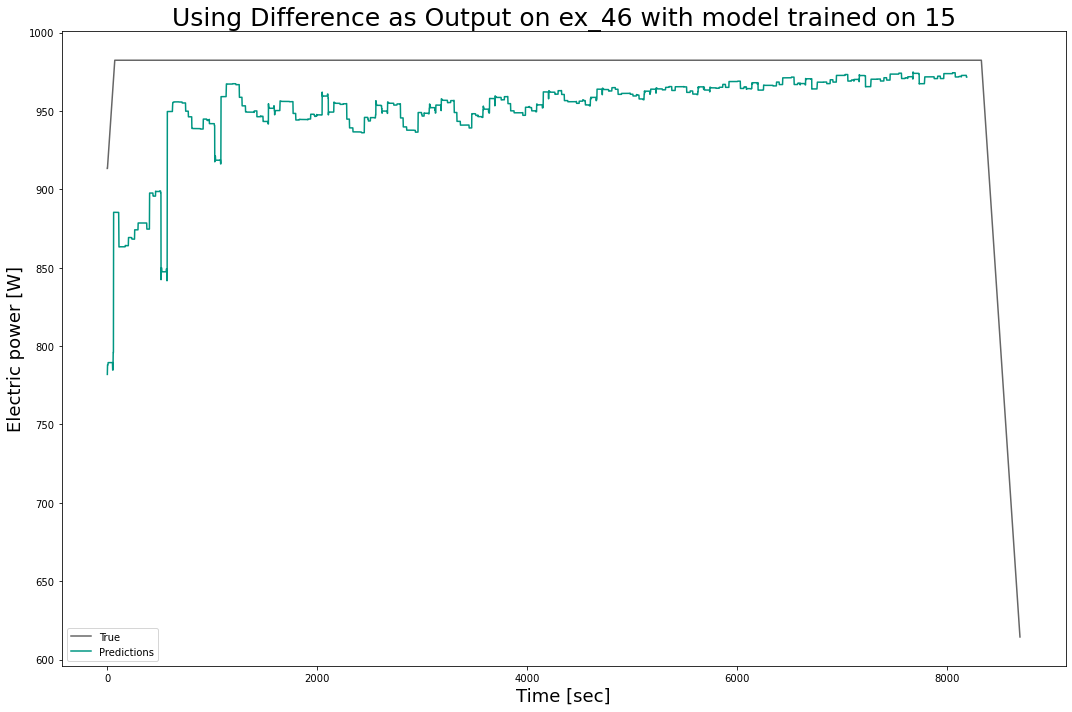

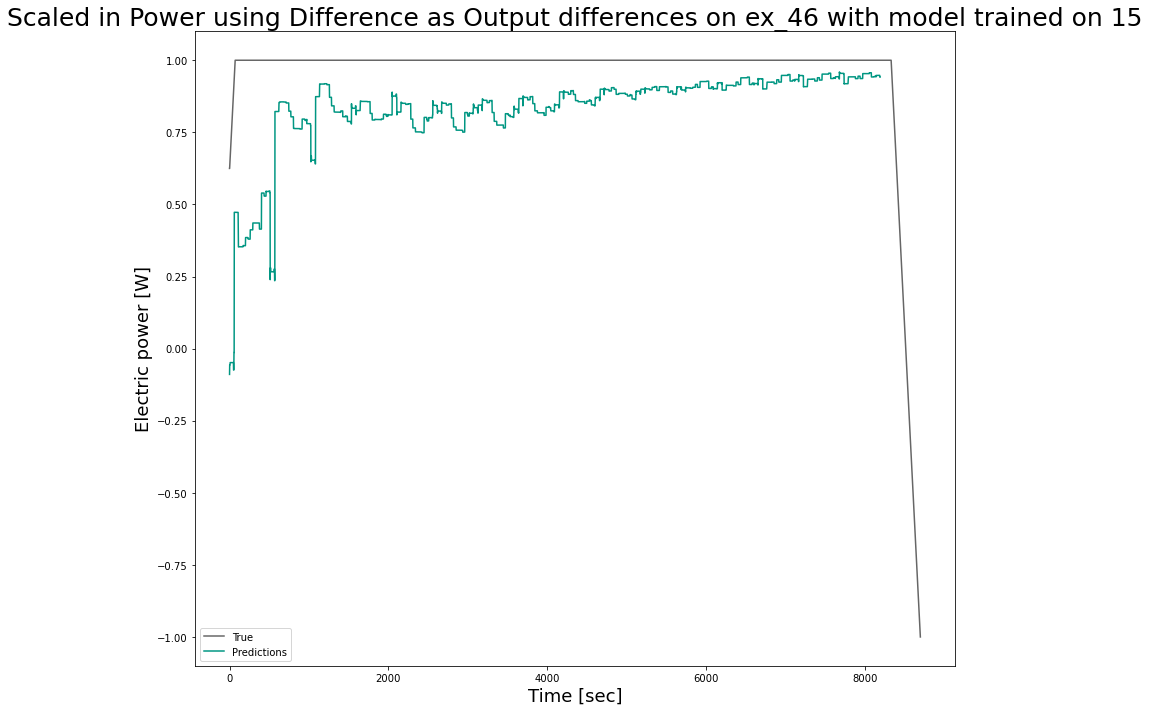

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


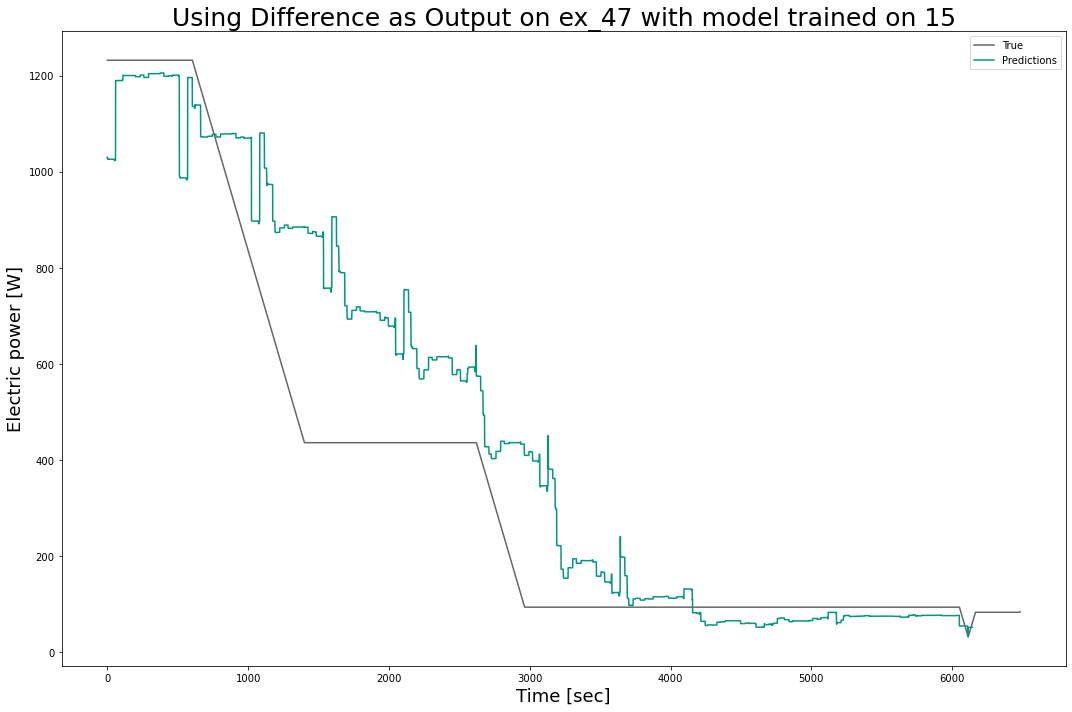

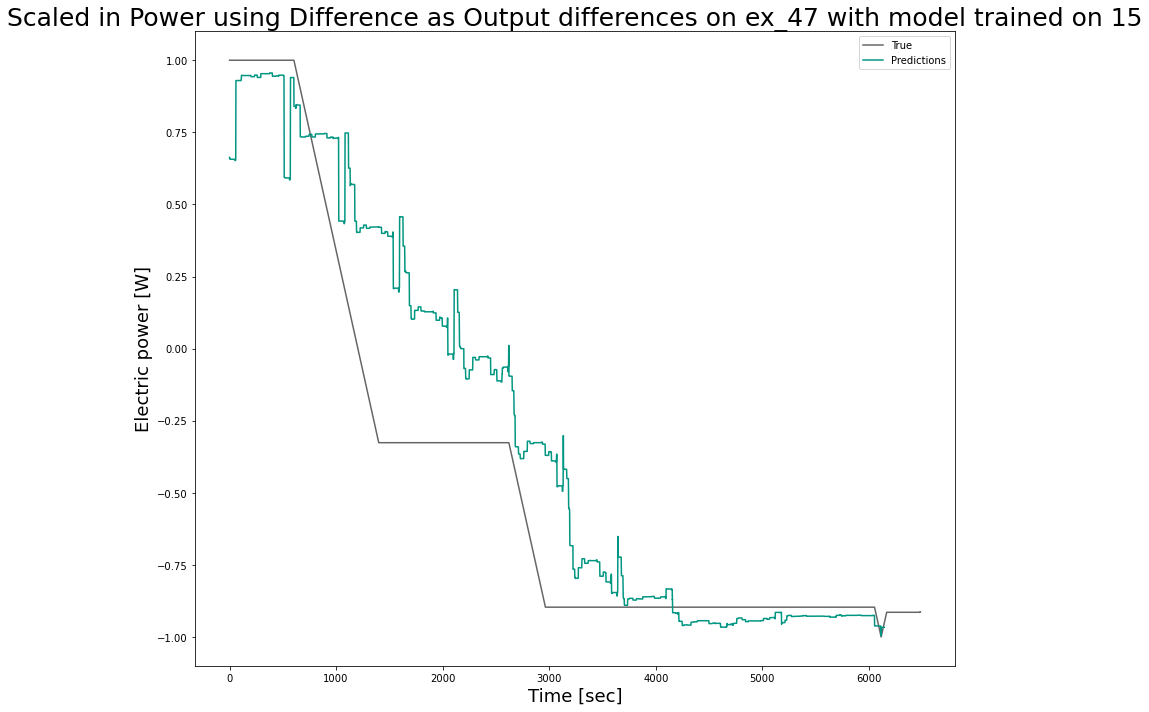

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


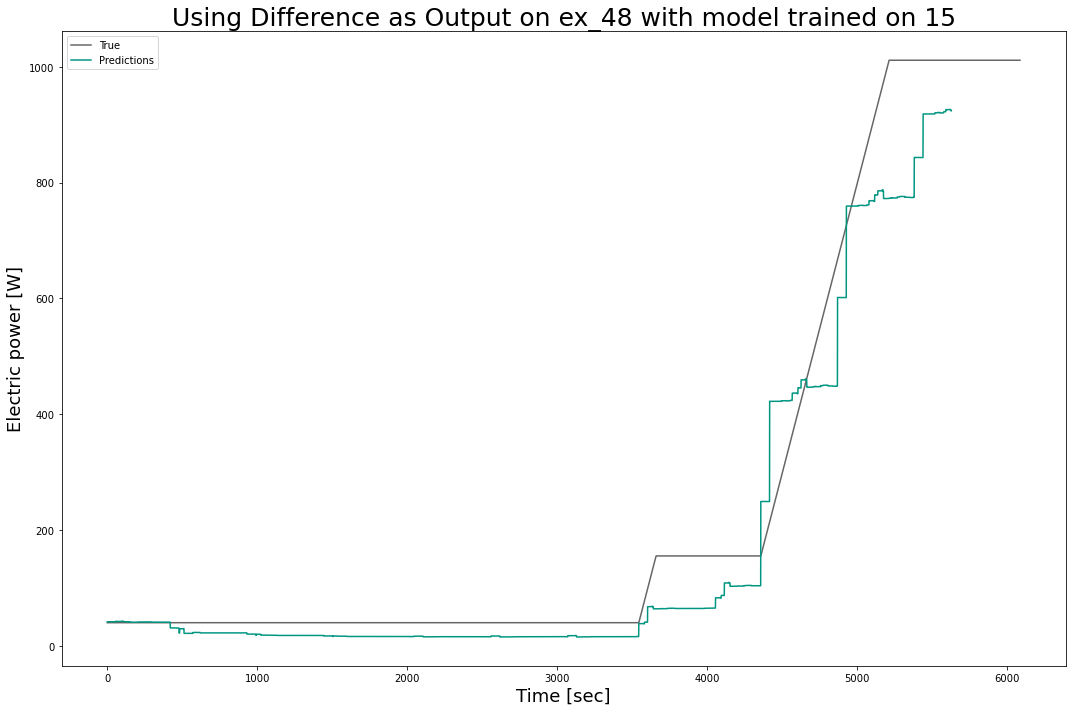

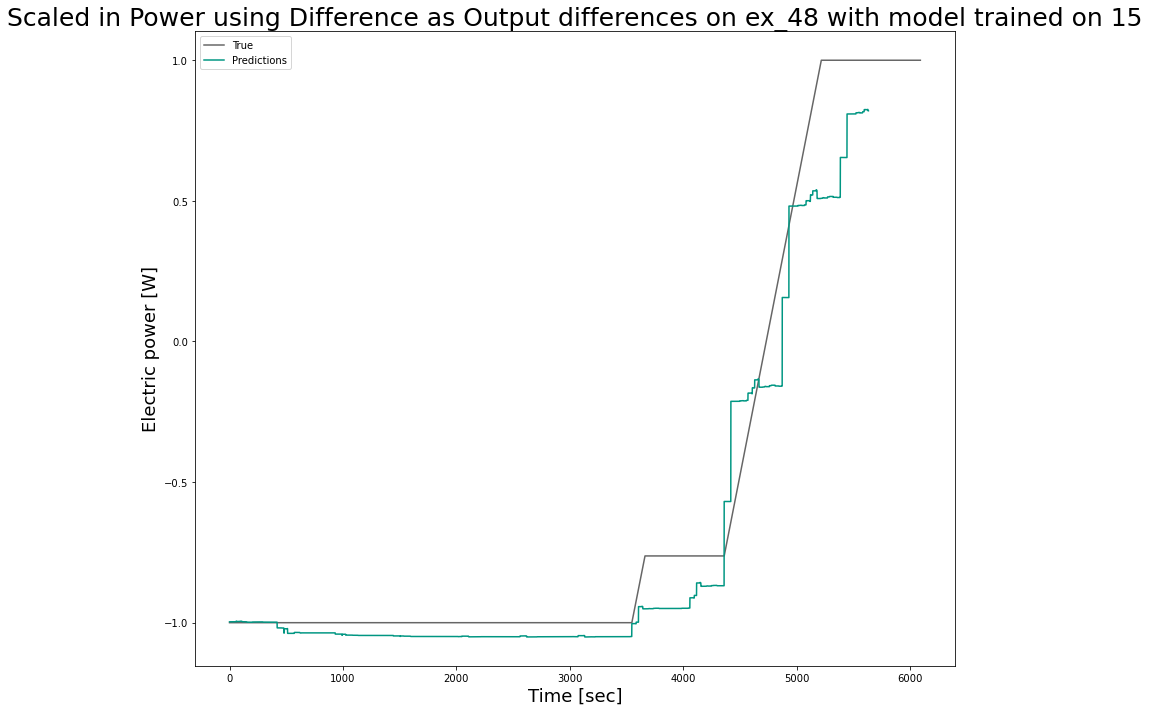

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


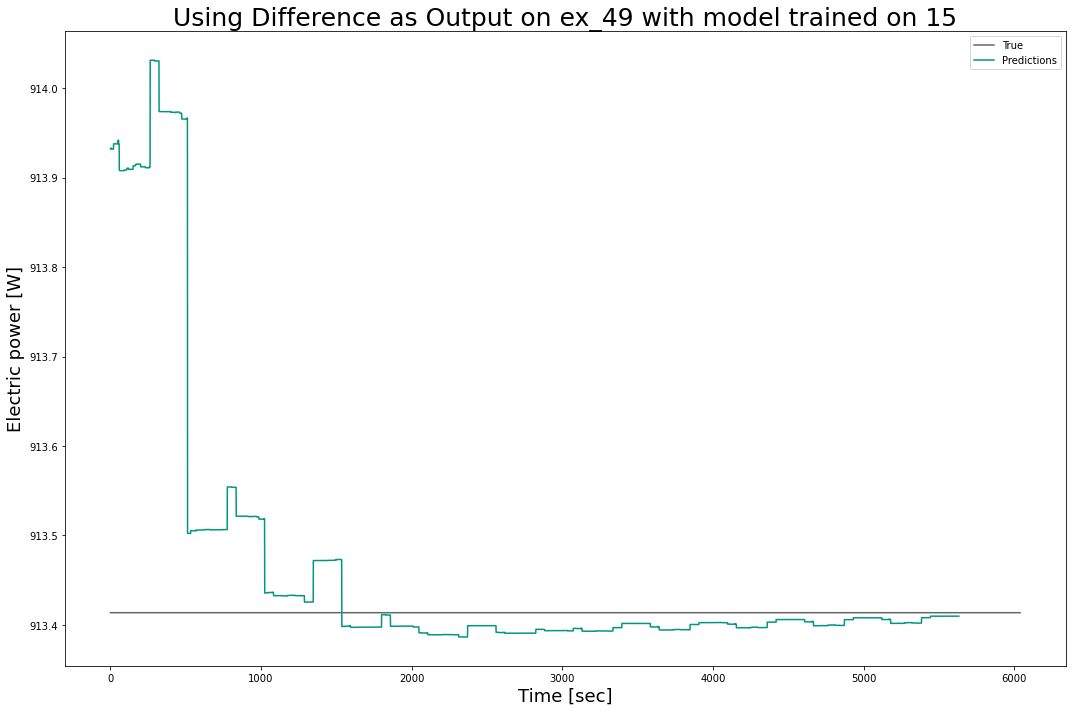

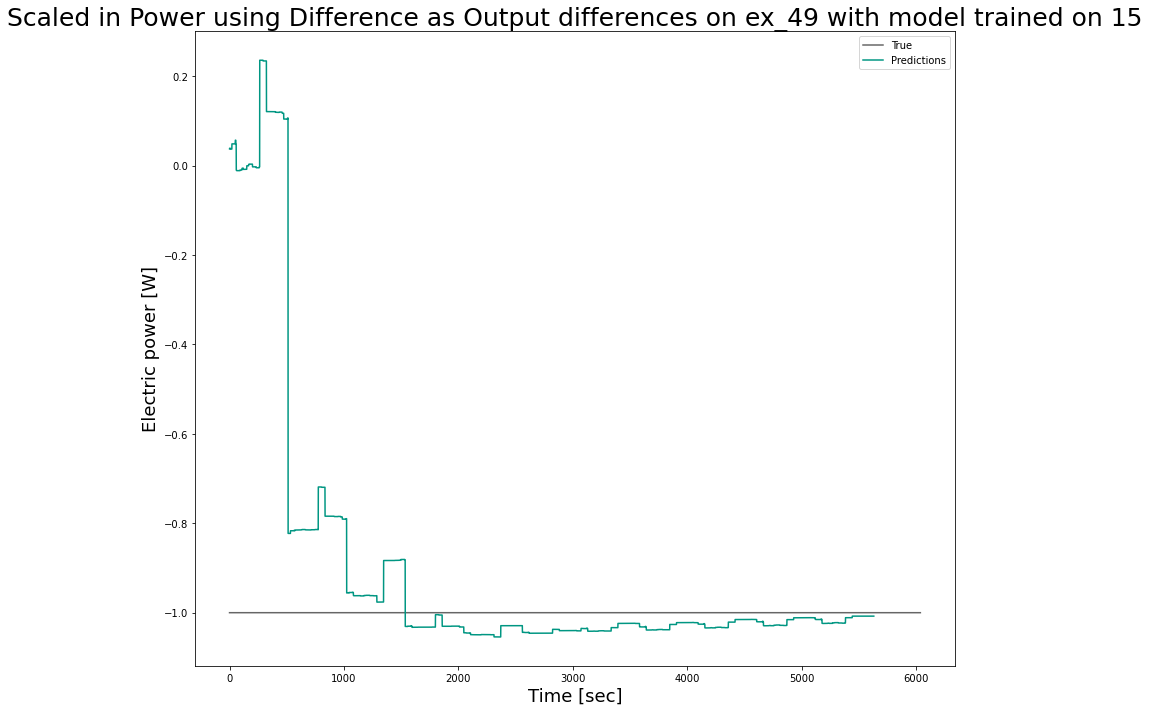

C:\Users\FlorianLeiser\Documents\Masterarbeit\Code\Data_Processing.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff'] = diffs


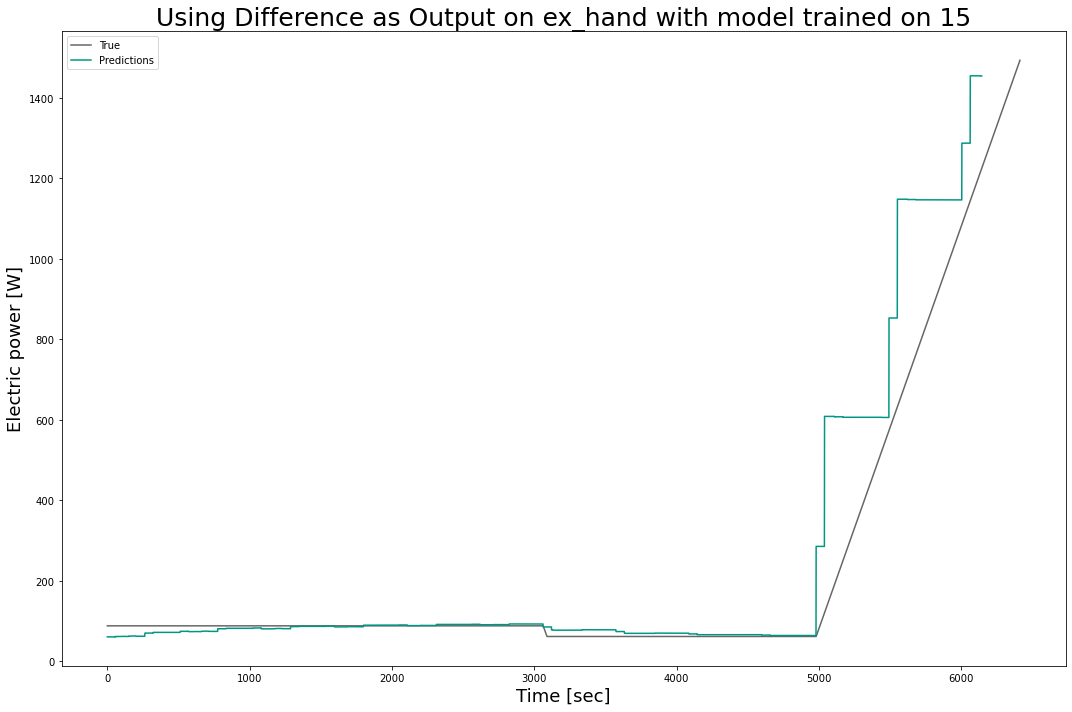

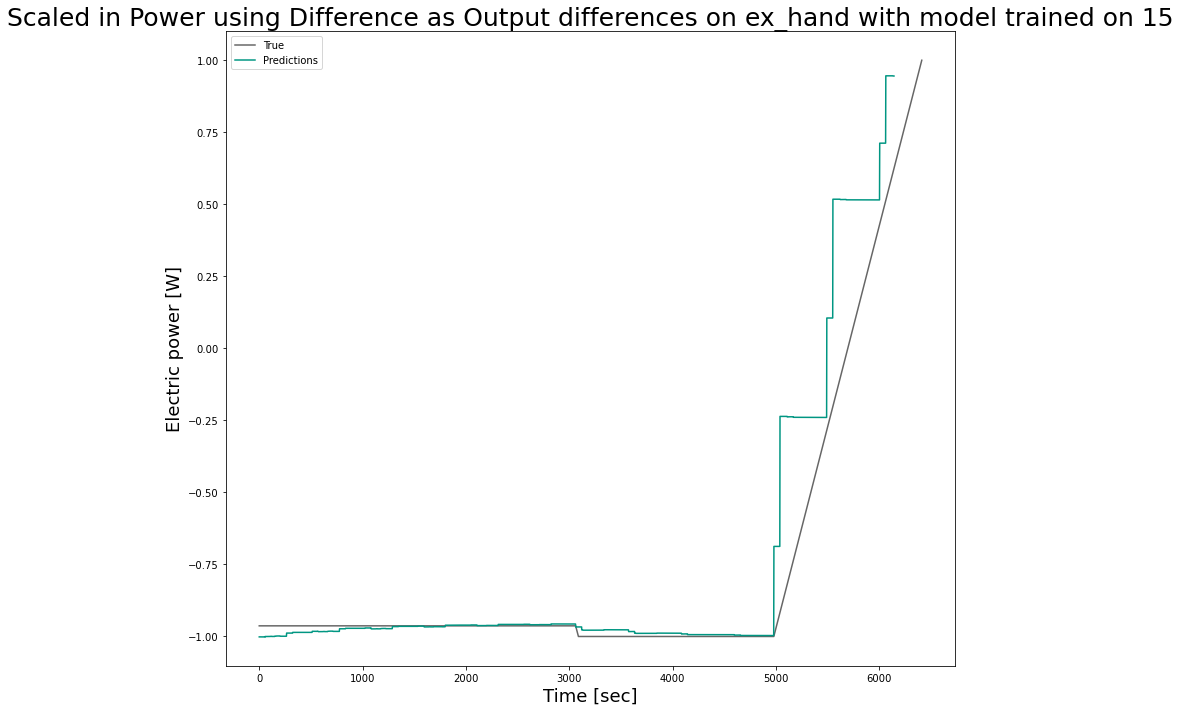

In [13]:
all_scaler = list()
all_X_values = list()
all_y_values = list()
all_predictions = list()
all_scaled_predictions = list()

for i in range(len(experiments)):
    scaler, X, y, preds_scaled, preds = nn.predictions(experiments[i], model,
                                                       difference_chosen = DIFFERENCE,
                                                       lag_chosen = LAG,
                                                      batch_size = BATCH_SIZE)
    all_scaler.append(scaler)
    all_X_values.append(X)
    all_y_values.append(y)
    all_predictions.append(preds)
    all_scaled_predictions.append(preds_scaled)
    
    gf.create_prediction_plot(experiments[i]['el_power'], preds, image_folder,
                              title = 'Using Difference as Output ',
                             specs = 'on ex_{0} with model trained on {1}'.format(names[i], train))
    results = gf.measure_difference(experiments[i]['el_power'], preds, should_print = False)
    results.to_csv(image_folder + "results_ex_{0}.csv".format(names[i]), sep = "|", encoding = 'utf-8')
    results_scaled = gf.measure_difference(y, preds_scaled[:,0], should_print = False)
    results_scaled.to_csv(image_folder + "results_scaled_ex_{0}.csv".format(names[i]), sep = "|", encoding = 'utf-8')
    
    gf.create_prediction_plot(y, preds_scaled[:,0], image_folder,
                              title = 'Scaled in Power using Difference as Output ',
                             specs = 'differences on ex_{0} with model trained on {1}'.format(names[i], train))